# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x10346fe80>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [4]:
vec_rn.update_reaction_net(rn)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')

Matrix([[0.8067573], [0.3098782], [1.471136], [1.099821], [0.4431417], [0.5739231], [0.4271798], [0.1808194], [2.027800], [0.1250416], [1.396119], [1.617986], [0.3038936], [1.183257], [0.3939440]])
Equilibrium expected yield:  8.81306373032947 %


## Using the optimizer with a 1 second simulation runtime ##

In [12]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=.001,
                  device='cpu')
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Using CPU
yield on sim iteration 0 was 8.72%
current params: tensor([1.0010, 0.9990, 0.9990, 0.9990, 1.0010, 1.0010, 1.0010, 0.9990, 0.9990,
        0.9990, 1.0010, 1.0010, 1.0010, 1.0010, 1.0010, 0.9990, 1.0010, 1.0010,
        1.0010, 0.9990, 1.0010, 1.0010], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 8.72%
current params: tensor([1.0020, 0.9980, 0.9980, 0.9980, 1.0020, 1.0020, 1.0020, 0.9980, 0.9980,
        0.9980, 1.0020, 1.0020, 1.0020, 1.0020, 1.0020, 0.9980, 1.0020, 1.0020,
        1.0020, 0.9980, 1.0020, 1.0020], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 8.72%
current params: tensor([1.0030, 0.9970, 0.9970, 0.9970, 1.0029, 1.0030, 1.0030, 0.9970, 0.9970,
        0.9970, 1.0030, 1.0030, 1.0030, 1.0030, 1.0030, 0.9970, 1.0030, 1.0030,
        1.0030, 0.9970, 1.0030, 1.0030], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 8.73%
current params: tensor([1.0040, 0.9960, 0.9960, 0.9960, 1.0039, 1.0040, 1.0040, 0.9960, 0.9960,


yield on sim iteration 35 was 8.79%
current params: tensor([1.0361, 0.9645, 0.9642, 0.9646, 0.9784, 1.0362, 1.0357, 0.9674, 0.9653,
        0.9653, 1.0358, 1.0358, 1.0378, 1.0357, 1.0356, 0.9639, 1.0357, 1.0356,
        1.0382, 0.9645, 1.0357, 1.0358], dtype=torch.float64)
Using CPU
yield on sim iteration 36 was 8.80%
current params: tensor([1.0371, 0.9635, 0.9632, 0.9637, 0.9770, 1.0372, 1.0367, 0.9667, 0.9644,
        0.9644, 1.0368, 1.0368, 1.0389, 1.0367, 1.0366, 0.9629, 1.0367, 1.0366,
        1.0393, 0.9635, 1.0367, 1.0368], dtype=torch.float64)
Using CPU
yield on sim iteration 37 was 8.80%
current params: tensor([1.0381, 0.9626, 0.9622, 0.9627, 0.9756, 1.0382, 1.0376, 0.9660, 0.9635,
        0.9635, 1.0378, 1.0378, 1.0400, 1.0377, 1.0376, 0.9619, 1.0376, 1.0376,
        1.0405, 0.9625, 1.0376, 1.0377], dtype=torch.float64)
Using CPU
yield on sim iteration 38 was 8.80%
current params: tensor([1.0391, 0.9616, 0.9612, 0.9618, 0.9742, 1.0392, 1.0386, 0.9653, 0.9627,
        0.9627, 

current params: tensor([1.0665, 0.9365, 0.9346, 0.9369, 0.9343, 1.0667, 1.0648, 0.9555, 0.9414,
        0.9416, 1.0651, 1.0653, 1.0710, 1.0646, 1.0644, 0.9335, 1.0642, 1.0643,
        1.0745, 0.9356, 1.0646, 1.0647], dtype=torch.float64)
Using CPU
yield on sim iteration 66 was 8.86%
current params: tensor([1.0675, 0.9356, 0.9336, 0.9359, 0.9326, 1.0677, 1.0657, 0.9555, 0.9407,
        0.9409, 1.0661, 1.0663, 1.0720, 1.0655, 1.0653, 0.9325, 1.0651, 1.0652,
        1.0758, 0.9346, 1.0656, 1.0657], dtype=torch.float64)
Using CPU
yield on sim iteration 67 was 8.86%
current params: tensor([1.0685, 0.9347, 0.9325, 0.9350, 0.9310, 1.0687, 1.0667, 0.9556, 0.9400,
        0.9402, 1.0670, 1.0672, 1.0728, 1.0665, 1.0663, 0.9314, 1.0660, 1.0662,
        1.0771, 0.9337, 1.0666, 1.0666], dtype=torch.float64)
Using CPU
yield on sim iteration 68 was 8.86%
current params: tensor([1.0695, 0.9338, 0.9315, 0.9341, 0.9293, 1.0697, 1.0677, 0.9556, 0.9393,
        0.9395, 1.0680, 1.0682, 1.0737, 1.0674, 1.06

yield on sim iteration 97 was 8.92%
current params: tensor([1.0996, 0.9075, 0.9002, 0.9080, 0.8789, 1.0996, 1.0966, 0.9717, 0.9228,
        0.9235, 1.0961, 1.0967, 1.0874, 1.0924, 1.0945, 0.9005, 1.0918, 1.0948,
        1.1163, 0.9058, 1.0957, 1.0939], dtype=torch.float64)
Using CPU
yield on sim iteration 98 was 8.92%
current params: tensor([1.1006, 0.9067, 0.8990, 0.9072, 0.8771, 1.1006, 1.0976, 0.9727, 0.9224,
        0.9231, 1.0971, 1.0977, 1.0876, 1.0932, 1.0955, 0.8994, 1.0926, 1.0957,
        1.1176, 0.9049, 1.0967, 1.0948], dtype=torch.float64)
Using CPU
yield on sim iteration 99 was 8.92%
current params: tensor([1.1017, 0.9058, 0.8979, 0.9063, 0.8754, 1.1017, 1.0985, 0.9737, 0.9220,
        0.9228, 1.0980, 1.0987, 1.0878, 1.0941, 1.0964, 0.8984, 1.0934, 1.0967,
        1.1190, 0.9040, 1.0977, 1.0957], dtype=torch.float64)
Using CPU
yield on sim iteration 100 was 8.93%
current params: tensor([1.1027, 0.9049, 0.8968, 0.9054, 0.8736, 1.1027, 1.0995, 0.9748, 0.9216,
        0.9224,

yield on sim iteration 129 was 8.99%
current params: tensor([1.1328, 0.8811, 0.8640, 0.8812, 0.8225, 1.1338, 1.1282, 1.0141, 0.9170,
        0.9193, 1.1267, 1.1276, 1.0853, 1.1178, 1.1240, 0.8670, 1.1169, 1.1246,
        1.1615, 0.8767, 1.1265, 1.1217], dtype=torch.float64)
Using CPU
yield on sim iteration 130 was 8.99%
current params: tensor([1.1339, 0.8803, 0.8628, 0.8804, 0.8207, 1.1349, 1.1292, 1.0157, 0.9171,
        0.9194, 1.1277, 1.1286, 1.0848, 1.1186, 1.1249, 0.8659, 1.1176, 1.1255,
        1.1630, 0.8758, 1.1274, 1.1226], dtype=torch.float64)
Using CPU
yield on sim iteration 131 was 8.99%
current params: tensor([1.1349, 0.8796, 0.8616, 0.8796, 0.8188, 1.1360, 1.1302, 1.0172, 0.9172,
        0.9196, 1.1286, 1.1296, 1.0842, 1.1193, 1.1258, 0.8648, 1.1184, 1.1264,
        1.1645, 0.8748, 1.1284, 1.1234], dtype=torch.float64)
Using CPU
yield on sim iteration 132 was 8.99%
current params: tensor([1.1360, 0.8788, 0.8605, 0.8788, 0.8170, 1.1371, 1.1312, 1.0188, 0.9173,
        0.91

yield on sim iteration 159 was 9.05%
current params: tensor([1.1637, 0.8603, 0.8290, 0.8589, 0.7694, 1.1674, 1.1572, 1.0641, 0.9282,
        0.9337, 1.1550, 1.1557, 1.0654, 1.1405, 1.1506, 0.8352, 1.1386, 1.1514,
        1.2063, 0.8498, 1.1547, 1.1468], dtype=torch.float64)
Using CPU
yield on sim iteration 160 was 9.05%
current params: tensor([1.1647, 0.8597, 0.8278, 0.8582, 0.7676, 1.1686, 1.1581, 1.0658, 0.9289,
        0.9345, 1.1559, 1.1566, 1.0645, 1.1413, 1.1515, 0.8341, 1.1393, 1.1523,
        1.2079, 0.8489, 1.1557, 1.1477], dtype=torch.float64)
Using CPU
yield on sim iteration 161 was 9.05%
current params: tensor([1.1657, 0.8591, 0.8267, 0.8575, 0.7659, 1.1697, 1.1591, 1.0676, 0.9296,
        0.9354, 1.1569, 1.1575, 1.0636, 1.1421, 1.1523, 0.8331, 1.1400, 1.1531,
        1.2094, 0.8480, 1.1566, 1.1485], dtype=torch.float64)
Using CPU
yield on sim iteration 162 was 9.05%
current params: tensor([1.1667, 0.8585, 0.8255, 0.8569, 0.7641, 1.1709, 1.1600, 1.0693, 0.9303,
        0.93

yield on sim iteration 188 was 9.11%
current params: tensor([1.1933, 0.8445, 0.7930, 0.8399, 0.7158, 1.2016, 1.1849, 1.1155, 0.9552,
        0.9651, 1.1822, 1.1821, 1.0201, 1.1613, 1.1756, 0.8041, 1.1575, 1.1765,
        1.2511, 0.8239, 1.1818, 1.1702], dtype=torch.float64)
Using CPU
yield on sim iteration 189 was 9.11%
current params: tensor([1.1943, 0.8441, 0.7916, 0.8392, 0.7138, 1.2028, 1.1858, 1.1173, 0.9564,
        0.9664, 1.1831, 1.1830, 1.0178, 1.1620, 1.1765, 0.8030, 1.1581, 1.1774,
        1.2527, 0.8230, 1.1827, 1.1709], dtype=torch.float64)
Using CPU
yield on sim iteration 190 was 9.11%
current params: tensor([1.1954, 0.8436, 0.7903, 0.8386, 0.7119, 1.2040, 1.1868, 1.1191, 0.9575,
        0.9677, 1.1841, 1.1839, 1.0156, 1.1626, 1.1773, 0.8020, 1.1587, 1.1782,
        1.2542, 0.8221, 1.1837, 1.1717], dtype=torch.float64)
Using CPU
yield on sim iteration 191 was 9.12%
current params: tensor([1.1964, 0.8431, 0.7889, 0.8379, 0.7099, 1.2053, 1.1878, 1.1209, 0.9587,
        0.96

yield on sim iteration 218 was 9.18%
current params: tensor([1.2246, 0.8328, 0.7493, 0.8207, 0.6542, 1.2394, 1.2148, 1.1707, 0.9963,
        1.0107, 1.2107, 1.2091, 0.9450, 1.1768, 1.2013, 0.7715, 1.1730, 1.2026,
        1.2994, 0.7966, 1.2106, 1.1924], dtype=torch.float64)
Using CPU
yield on sim iteration 219 was 9.18%
current params: tensor([1.2256, 0.8325, 0.7478, 0.8201, 0.6520, 1.2408, 1.2158, 1.1726, 0.9978,
        1.0124, 1.2117, 1.2100, 0.9423, 1.1772, 1.2022, 0.7704, 1.1734, 1.2035,
        1.3010, 0.7956, 1.2115, 1.1931], dtype=torch.float64)
Using CPU
yield on sim iteration 220 was 9.18%
current params: tensor([1.2267, 0.8322, 0.7462, 0.8195, 0.6498, 1.2421, 1.2168, 1.1745, 0.9994,
        1.0141, 1.2127, 1.2109, 0.9397, 1.1775, 1.2030, 0.7693, 1.1739, 1.2043,
        1.3027, 0.7947, 1.2125, 1.1938], dtype=torch.float64)
Using CPU
yield on sim iteration 221 was 9.19%
current params: tensor([1.2278, 0.8319, 0.7446, 0.8188, 0.6477, 1.2434, 1.2179, 1.1764, 1.0010,
        1.01

yield on sim iteration 248 was 9.25%
current params: tensor([1.2564, 0.8291, 0.6995, 0.8024, 0.5892, 1.2801, 1.2457, 1.2280, 1.0470,
        1.0649, 1.2400, 1.2358, 0.8669, 1.1823, 1.2266, 0.7383, 1.1839, 1.2285,
        1.3498, 0.7682, 1.2401, 1.2128], dtype=torch.float64)
Using CPU
yield on sim iteration 249 was 9.25%
current params: tensor([1.2574, 0.8291, 0.6978, 0.8018, 0.5871, 1.2815, 1.2468, 1.2299, 1.0488,
        1.0668, 1.2410, 1.2366, 0.8643, 1.1823, 1.2275, 0.7372, 1.1842, 1.2294,
        1.3515, 0.7672, 1.2411, 1.2134], dtype=torch.float64)
Using CPU
yield on sim iteration 250 was 9.26%
current params: tensor([1.2585, 0.8292, 0.6961, 0.8012, 0.5849, 1.2829, 1.2478, 1.2318, 1.0506,
        1.0687, 1.2420, 1.2375, 0.8617, 1.1823, 1.2283, 0.7361, 1.1845, 1.2302,
        1.3532, 0.7663, 1.2421, 1.2141], dtype=torch.float64)
Using CPU
yield on sim iteration 251 was 9.26%
current params: tensor([1.2595, 0.8293, 0.6943, 0.8006, 0.5827, 1.2843, 1.2488, 1.2338, 1.0524,
        1.07

yield on sim iteration 277 was 9.33%
current params: tensor([1.2874, 0.8368, 0.6457, 0.7843, 0.5242, 1.3220, 1.2765, 1.2848, 1.1012,
        1.1212, 1.2692, 1.2610, 0.7905, 1.1732, 1.2507, 0.7058, 1.1891, 1.2534,
        1.4003, 0.7388, 1.2694, 1.2304], dtype=torch.float64)
Using CPU
yield on sim iteration 278 was 9.34%
current params: tensor([1.2885, 0.8373, 0.6437, 0.7836, 0.5218, 1.3235, 1.2776, 1.2868, 1.1032,
        1.1232, 1.2702, 1.2619, 0.7878, 1.1725, 1.2516, 0.7047, 1.1891, 1.2543,
        1.4021, 0.7377, 1.2704, 1.2310], dtype=torch.float64)
Using CPU
yield on sim iteration 279 was 9.34%
current params: tensor([1.2895, 0.8379, 0.6417, 0.7829, 0.5195, 1.3250, 1.2787, 1.2888, 1.1051,
        1.1252, 1.2712, 1.2628, 0.7851, 1.1717, 1.2524, 0.7036, 1.1892, 1.2551,
        1.4039, 0.7366, 1.2714, 1.2315], dtype=torch.float64)
Using CPU
yield on sim iteration 280 was 9.34%
current params: tensor([1.2906, 0.8384, 0.6397, 0.7822, 0.5172, 1.3265, 1.2798, 1.2908, 1.1070,
        1.12

current params: tensor([1.3253, 0.8657, 0.5727, 0.7576, 0.4418, 1.3764, 1.3156, 1.3557, 1.1706,
        1.1921, 1.3065, 1.2913, 0.6967, 1.1318, 1.2798, 0.6659, 1.1842, 1.2837,
        1.4640, 0.6980, 1.3064, 1.2475], dtype=torch.float64)
Using CPU
yield on sim iteration 313 was 9.45%
current params: tensor([1.3264, 0.8669, 0.5705, 0.7568, 0.4394, 1.3780, 1.3167, 1.3577, 1.1727,
        1.1941, 1.3076, 1.2922, 0.6940, 1.1301, 1.2807, 0.6647, 1.1839, 1.2845,
        1.4659, 0.6967, 1.3075, 1.2479], dtype=torch.float64)
Using CPU
yield on sim iteration 314 was 9.45%
current params: tensor([1.3275, 0.8681, 0.5683, 0.7559, 0.4370, 1.3796, 1.3178, 1.3598, 1.1747,
        1.1962, 1.3087, 1.2930, 0.6914, 1.1284, 1.2815, 0.6636, 1.1836, 1.2854,
        1.4677, 0.6954, 1.3086, 1.2484], dtype=torch.float64)
Using CPU
yield on sim iteration 315 was 9.46%
current params: tensor([1.3286, 0.8694, 0.5661, 0.7551, 0.4346, 1.3812, 1.3189, 1.3619, 1.1767,
        1.1982, 1.3098, 1.2939, 0.6887, 1.1267, 1

yield on sim iteration 347 was 9.60%
current params: tensor([1.3631, 0.9196, 0.4928, 0.7203, 0.3555, 1.4354, 1.3564, 1.4292, 1.2426,
        1.2649, 1.3469, 1.3214, 0.6015, 1.0578, 1.3092, 0.6250, 1.1624, 1.3141,
        1.5307, 0.6464, 1.3455, 1.2581], dtype=torch.float64)
Using CPU
yield on sim iteration 348 was 9.60%
current params: tensor([1.3641, 0.9215, 0.4904, 0.7189, 0.3529, 1.4372, 1.3576, 1.4314, 1.2447,
        1.2670, 1.3481, 1.3223, 0.5987, 1.0553, 1.3101, 0.6238, 1.1614, 1.3149,
        1.5327, 0.6446, 1.3467, 1.2582], dtype=torch.float64)
Using CPU
yield on sim iteration 349 was 9.61%
current params: tensor([1.3652, 0.9234, 0.4880, 0.7175, 0.3503, 1.4390, 1.3588, 1.4336, 1.2467,
        1.2691, 1.3493, 1.3232, 0.5959, 1.0528, 1.3109, 0.6226, 1.1604, 1.3158,
        1.5346, 0.6429, 1.3478, 1.2583], dtype=torch.float64)
Using CPU
yield on sim iteration 350 was 9.61%
current params: tensor([1.3663, 0.9253, 0.4856, 0.7161, 0.3478, 1.4408, 1.3600, 1.4357, 1.2488,
        1.27

yield on sim iteration 382 was 9.79%
current params: tensor([1.3993, 0.9939, 0.4076, 0.6600, 0.2644, 1.5000, 1.3988, 1.5060, 1.3160,
        1.3394, 1.3917, 1.3516, 0.5049, 0.9655, 1.3396, 0.5830, 1.1163, 1.3442,
        1.6011, 0.5767, 1.3870, 1.2575], dtype=torch.float64)
Using CPU
yield on sim iteration 383 was 9.80%
current params: tensor([1.4002, 0.9962, 0.4051, 0.6578, 0.2617, 1.5019, 1.4000, 1.5082, 1.3181,
        1.3415, 1.3930, 1.3525, 0.5022, 0.9628, 1.3405, 0.5817, 1.1146, 1.3450,
        1.6032, 0.5744, 1.3882, 1.2573], dtype=torch.float64)
Using CPU
yield on sim iteration 384 was 9.81%
current params: tensor([1.4012, 0.9986, 0.4026, 0.6556, 0.2590, 1.5039, 1.4012, 1.5105, 1.3202,
        1.3437, 1.3944, 1.3534, 0.4994, 0.9601, 1.3414, 0.5805, 1.1129, 1.3459,
        1.6053, 0.5720, 1.3895, 1.2570], dtype=torch.float64)
Using CPU
yield on sim iteration 385 was 9.82%
current params: tensor([1.4022, 1.0009, 0.4001, 0.6533, 0.2564, 1.5058, 1.4025, 1.5127, 1.3223,
        1.34

current params: tensor([1.4312, 1.0801, 0.3186, 0.5639, 0.1668, 1.5716, 1.4423, 1.5867, 1.3901,
        1.4153, 1.4426, 1.3826, 0.4073, 0.8685, 1.3723, 0.5393, 1.0413, 1.3722,
        1.6767, 0.4837, 1.4312, 1.2359], dtype=torch.float64)
Using CPU
yield on sim iteration 418 was 10.1%
current params: tensor([1.4320, 1.0827, 0.3160, 0.5606, 0.1639, 1.5738, 1.4436, 1.5891, 1.3922,
        1.4175, 1.4442, 1.3835, 0.4045, 0.8657, 1.3733, 0.5380, 1.0388, 1.3729,
        1.6790, 0.4807, 1.4325, 1.2348], dtype=torch.float64)
Using CPU
yield on sim iteration 419 was 10.1%
current params: tensor([1.4328, 1.0853, 0.3134, 0.5573, 0.1610, 1.5759, 1.4448, 1.5915, 1.3943,
        1.4197, 1.4458, 1.3844, 0.4017, 0.8630, 1.3743, 0.5367, 1.0362, 1.3736,
        1.6812, 0.4777, 1.4339, 1.2336], dtype=torch.float64)
Using CPU
yield on sim iteration 420 was 10.1%
current params: tensor([1.4336, 1.0879, 0.3108, 0.5540, 0.1580, 1.5781, 1.4461, 1.5939, 1.3964,
        1.4219, 1.4474, 1.3853, 0.3989, 0.8602, 1

yield on sim iteration 451 was 10.6%
current params: tensor([1.4524, 1.1703, 0.2307, 0.4442, 0.0632, 1.6508, 1.4849, 1.6706, 1.4618,
        1.4904, 1.5007, 1.4145, 0.3132, 0.7748, 1.4090, 0.4945, 0.9439, 1.3927,
        1.7569, 0.3739, 1.4772, 1.1769], dtype=torch.float64)
Using CPU
yield on sim iteration 452 was 10.6%
current params: tensor([1.4528, 1.1730, 0.2281, 0.4405, 0.0600, 1.6533, 1.4861, 1.6732, 1.4639,
        1.4926, 1.5026, 1.4155, 0.3105, 0.7721, 1.4102, 0.4931, 0.9407, 1.3931,
        1.7594, 0.3705, 1.4786, 1.1745], dtype=torch.float64)
Using CPU
yield on sim iteration 453 was 10.6%
current params: tensor([1.4531, 1.1758, 0.2255, 0.4368, 0.0568, 1.6558, 1.4873, 1.6757, 1.4660,
        1.4948, 1.5044, 1.4165, 0.3078, 0.7693, 1.4114, 0.4917, 0.9376, 1.3935,
        1.7619, 0.3670, 1.4800, 1.1720], dtype=torch.float64)
Using CPU
yield on sim iteration 454 was 10.6%
current params: tensor([1.4535, 1.1785, 0.2230, 0.4330, 0.0585, 1.6583, 1.4886, 1.6783, 1.4681,
        1.49

current params: tensor([1.4598, 1.2487, 0.1567, 0.3404, 0.0796, 1.7255, 1.5183, 1.7448, 1.5205,
        1.5542, 1.5564, 1.4439, 0.2354, 0.7006, 1.4454, 0.4537, 0.8544, 1.3971,
        1.8277, 0.2768, 1.5156, 1.0991], dtype=torch.float64)
Using CPU
yield on sim iteration 481 was 11.0%
current params: tensor([1.4600, 1.2514, 0.1541, 0.3370, 0.0796, 1.7281, 1.5193, 1.7473, 1.5224,
        1.5564, 1.5583, 1.4449, 0.2327, 0.6983, 1.4467, 0.4522, 0.8515, 1.3969,
        1.8300, 0.2736, 1.5167, 1.0964], dtype=torch.float64)
Using CPU
yield on sim iteration 482 was 11.0%
current params: tensor([1.4602, 1.2540, 0.1516, 0.3337, 0.0796, 1.7306, 1.5203, 1.7498, 1.5243,
        1.5586, 1.5603, 1.4459, 0.2300, 0.6960, 1.4480, 0.4508, 0.8486, 1.3967,
        1.8324, 0.2704, 1.5179, 1.0937], dtype=torch.float64)
Using CPU
yield on sim iteration 483 was 11.0%
current params: tensor([1.4604, 1.2566, 0.1490, 0.3303, 0.0796, 1.7332, 1.5213, 1.7523, 1.5262,
        1.5607, 1.5622, 1.4470, 0.2273, 0.6938, 1

current params: tensor([1.4649, 1.3393, 0.0669, 0.2240, 0.0747, 1.8162, 1.5463, 1.8309, 1.5820,
        1.6289, 1.6247, 1.4812, 0.1418, 0.6336, 1.4920, 0.4009, 0.7542, 1.3710,
        1.9047, 0.1680, 1.5489, 1.0007], dtype=torch.float64)
Using CPU
yield on sim iteration 516 was 11.8%
current params: tensor([1.4650, 1.3418, 0.0643, 0.2206, 0.0745, 1.8189, 1.5468, 1.8333, 1.5836,
        1.6310, 1.6267, 1.4824, 0.1391, 0.6322, 1.4934, 0.3993, 0.7513, 1.3696,
        1.9067, 0.1649, 1.5496, 0.9978], dtype=torch.float64)
Using CPU
yield on sim iteration 517 was 11.8%
current params: tensor([1.4651, 1.3444, 0.0617, 0.2173, 0.0742, 1.8216, 1.5473, 1.8357, 1.5852,
        1.6330, 1.6287, 1.4835, 0.1365, 0.6308, 1.4949, 0.3977, 0.7484, 1.3681,
        1.9087, 0.1618, 1.5503, 0.9948], dtype=torch.float64)
Using CPU
yield on sim iteration 518 was 11.8%
current params: tensor([1.4652, 1.3469, 0.0592, 0.2139, 0.0740, 1.8243, 1.5478, 1.8382, 1.5867,
        1.6351, 1.6306, 1.4846, 0.1338, 0.6295, 1

current params: tensor([1.4706, 1.4273, 0.0286, 0.1024, 0.0643, 1.9154, 1.5506, 1.9162, 1.6290,
        1.7005, 1.6956, 1.5239, 0.0506, 0.6109, 1.5470, 0.3433, 0.6513, 1.2985,
        1.9580, 0.0579, 1.5589, 0.8942], dtype=torch.float64)
Using CPU
yield on sim iteration 551 was 12.7%
current params: tensor([1.4709, 1.4299, 0.0294, 0.0988, 0.0639, 1.9182, 1.5505, 1.9186, 1.6301,
        1.7025, 1.6976, 1.5252, 0.0481, 0.6109, 1.5487, 0.3416, 0.6483, 1.2959,
        1.9586, 0.0547, 1.5588, 0.8910], dtype=torch.float64)
Using CPU
yield on sim iteration 552 was 12.7%
current params: tensor([1.4713, 1.4324, 0.0302, 0.0951, 0.0635, 1.9211, 1.5503, 1.9211, 1.6312,
        1.7046, 1.6997, 1.5265, 0.0457, 0.6109, 1.5504, 0.3399, 0.6453, 1.2934,
        1.9591, 0.0514, 1.5586, 0.8878], dtype=torch.float64)
Using CPU
yield on sim iteration 553 was 12.8%
current params: tensor([1.4718, 1.4350, 0.0309, 0.0915, 0.0631, 1.9239, 1.5501, 1.9236, 1.6323,
        1.7066, 1.7018, 1.5279, 0.0432, 0.6110, 1

current params: tensor([1.5054, 1.5181, 0.0362, 0.0214, 0.0602, 2.0157, 1.5458, 2.0046, 1.6645,
        1.7727, 1.7715, 1.5743, 0.0258, 0.6313, 1.6092, 0.2804, 0.5409, 1.2037,
        1.8980, 0.0264, 1.5488, 0.7764], dtype=torch.float64)
Using CPU
yield on sim iteration 586 was 13.8%
current params: tensor([1.5070, 1.5206, 0.0362, 0.0220, 0.0608, 2.0186, 1.5458, 2.0072, 1.6655,
        1.7748, 1.7737, 1.5758, 0.0261, 0.6323, 1.6110, 0.2785, 0.5377, 1.2010,
        1.8945, 0.0267, 1.5486, 0.7730], dtype=torch.float64)
Using CPU
yield on sim iteration 587 was 13.8%
current params: tensor([1.5086, 1.5231, 0.0362, 0.0226, 0.0612, 2.0214, 1.5457, 2.0097, 1.6666,
        1.7769, 1.7759, 1.5773, 0.0264, 0.6333, 1.6128, 0.2766, 0.5345, 1.1982,
        1.8911, 0.0269, 1.5483, 0.7697], dtype=torch.float64)
Using CPU
yield on sim iteration 588 was 13.8%
current params: tensor([1.5102, 1.5257, 0.0362, 0.0231, 0.0616, 2.0242, 1.5457, 2.0122, 1.6677,
        1.7790, 1.7781, 1.5789, 0.0266, 0.6342, 1

yield on sim iteration 620 was 14.8%
current params: tensor([1.5796, 1.6022, 0.0357, 0.0252, 0.0599, 2.1123, 1.5458, 2.0905, 1.7066,
        1.8451, 1.8481, 1.6286, 0.0283, 0.6547, 1.6710, 0.2134, 0.4309, 1.1106,
        1.7817, 0.0283, 1.5393, 0.6617], dtype=torch.float64)
Using CPU
yield on sim iteration 621 was 14.8%
current params: tensor([1.5822, 1.6045, 0.0357, 0.0251, 0.0603, 2.1150, 1.5459, 2.0929, 1.7079,
        1.8471, 1.8503, 1.6302, 0.0283, 0.6551, 1.6727, 0.2114, 0.4278, 1.1080,
        1.7784, 0.0283, 1.5390, 0.6585], dtype=torch.float64)
Using CPU
yield on sim iteration 622 was 14.8%
current params: tensor([1.5848, 1.6067, 0.0356, 0.0250, 0.0606, 2.1177, 1.5459, 2.0953, 1.7092,
        1.8492, 1.8525, 1.6318, 0.0283, 0.6554, 1.6744, 0.2095, 0.4247, 1.1054,
        1.7752, 0.0283, 1.5387, 0.6552], dtype=torch.float64)
Using CPU
yield on sim iteration 623 was 14.9%
current params: tensor([1.5875, 1.6090, 0.0356, 0.0249, 0.0608, 2.1204, 1.5459, 2.0976, 1.7106,
        1.85

yield on sim iteration 654 was 16.1%
current params: tensor([1.6761, 1.6765, 0.0351, 0.0206, 0.0599, 2.2030, 1.5469, 2.1687, 1.7544,
        1.9131, 1.9213, 1.6830, 0.0277, 0.6572, 1.7300, 0.1445, 0.3255, 1.0225,
        1.6709, 0.0275, 1.5289, 0.5529], dtype=torch.float64)
Using CPU
yield on sim iteration 655 was 16.1%
current params: tensor([1.6791, 1.6786, 0.0351, 0.0204, 0.0597, 2.2056, 1.5469, 2.1710, 1.7559,
        1.9151, 1.9234, 1.6846, 0.0277, 0.6571, 1.7317, 0.1424, 0.3224, 1.0199,
        1.6676, 0.0274, 1.5286, 0.5497], dtype=torch.float64)
Using CPU
yield on sim iteration 656 was 16.2%
current params: tensor([1.6822, 1.6806, 0.0350, 0.0202, 0.0594, 2.2083, 1.5470, 2.1732, 1.7574,
        1.9170, 1.9256, 1.6862, 0.0277, 0.6569, 1.7335, 0.1403, 0.3193, 1.0173,
        1.6643, 0.0274, 1.5283, 0.5464], dtype=torch.float64)
Using CPU
yield on sim iteration 657 was 16.2%
current params: tensor([1.6852, 1.6827, 0.0350, 0.0201, 0.0599, 2.2109, 1.5470, 2.1754, 1.7589,
        1.91

current params: tensor([1.7778, 1.7417, 0.0346, 0.0139, 0.0599, 2.2893, 1.5486, 2.2400, 1.8051,
        1.9754, 1.9913, 1.7375, 0.0273, 0.6461, 1.7887, 0.0727, 0.2220, 0.9351,
        1.5630, 0.0261, 1.5165, 0.4464], dtype=torch.float64)
Using CPU
yield on sim iteration 688 was 18.1%
current params: tensor([1.7809, 1.7435, 0.0346, 0.0137, 0.0601, 2.2919, 1.5487, 2.2421, 1.8067,
        1.9772, 1.9934, 1.7392, 0.0273, 0.6456, 1.7906, 0.0704, 0.2189, 0.9324,
        1.5597, 0.0261, 1.5161, 0.4432], dtype=torch.float64)
Using CPU
yield on sim iteration 689 was 18.2%
current params: tensor([1.7840, 1.7453, 0.0346, 0.0134, 0.0601, 2.2944, 1.5488, 2.2442, 1.8083,
        1.9791, 1.9955, 1.7408, 0.0272, 0.6451, 1.7924, 0.0682, 0.2157, 0.9297,
        1.5564, 0.0260, 1.5156, 0.4399], dtype=torch.float64)
Using CPU
yield on sim iteration 690 was 18.3%
current params: tensor([1.7871, 1.7472, 0.0346, 0.0132, 0.0600, 2.2970, 1.5488, 2.2462, 1.8099,
        1.9808, 1.9976, 1.7425, 0.0272, 0.6445, 1

yield on sim iteration 719 was 20.6%
current params: tensor([1.8776, 1.7958, 0.0344, 0.0202, 0.0597, 2.3711, 1.5504, 2.3030, 1.8550,
        2.0295, 2.0565, 1.7915, 0.0271, 0.6234, 1.8483, 0.0181, 0.1198, 0.8467,
        1.4589, 0.0242, 1.4999, 0.3415], dtype=torch.float64)
Using CPU
yield on sim iteration 720 was 20.6%
current params: tensor([1.8806, 1.7973, 0.0344, 0.0202, 0.0595, 2.3736, 1.5504, 2.3048, 1.8565,
        2.0310, 2.0585, 1.7932, 0.0271, 0.6221, 1.8502, 0.0193, 0.1166, 0.8439,
        1.4558, 0.0241, 1.4992, 0.3382], dtype=torch.float64)
Using CPU
yield on sim iteration 721 was 20.7%
current params: tensor([1.8837, 1.7988, 0.0344, 0.0202, 0.0592, 2.3761, 1.5504, 2.3067, 1.8580,
        2.0326, 2.0604, 1.7949, 0.0271, 0.6208, 1.8520, 0.0204, 0.1134, 0.8411,
        1.4527, 0.0240, 1.4986, 0.3349], dtype=torch.float64)
Using CPU
yield on sim iteration 722 was 20.8%
current params: tensor([1.8868, 1.8003, 0.0344, 0.0202, 0.0594, 2.3786, 1.5504, 2.3085, 1.8595,
        2.03

yield on sim iteration 749 was 23.5%
current params: tensor([1.9680, 1.8358, 0.0344, 0.0151, 0.0606, 2.4432, 1.5491, 2.3540, 1.8983,
        2.0718, 2.1123, 1.8423, 0.0272, 0.5785, 1.9046, 0.0255, 0.0247, 0.7625,
        1.3665, 0.0217, 1.4765, 0.2442], dtype=torch.float64)
Using CPU
yield on sim iteration 750 was 23.6%
current params: tensor([1.9709, 1.8369, 0.0344, 0.0148, 0.0607, 2.4455, 1.5490, 2.3555, 1.8996,
        2.0730, 2.1140, 1.8440, 0.0272, 0.5770, 1.9065, 0.0254, 0.0215, 0.7596,
        1.3634, 0.0216, 1.4756, 0.2409], dtype=torch.float64)
Using CPU
yield on sim iteration 751 was 23.7%
current params: tensor([1.9738, 1.8379, 0.0344, 0.0145, 0.0607, 2.4477, 1.5489, 2.3570, 1.9009,
        2.0742, 2.1157, 1.8457, 0.0272, 0.5755, 1.9083, 0.0252, 0.0184, 0.7568,
        1.3604, 0.0215, 1.4747, 0.2377], dtype=torch.float64)
Using CPU
yield on sim iteration 752 was 23.8%
current params: tensor([1.9767, 1.8390, 0.0344, 0.0142, 0.0606, 2.4500, 1.5488, 2.3585, 1.9022,
        2.07

yield on sim iteration 779 was 25.3%
current params: tensor([2.0509, 1.8637, 0.0346, 0.0165, 0.0602, 2.5076, 1.5448, 2.3951, 1.9342,
        2.1032, 2.1598, 1.8919, 0.0275, 0.5428, 1.9594, 0.0191, 0.0201, 0.6780,
        1.2763, 0.0184, 1.4461, 0.1501], dtype=torch.float64)
Using CPU
yield on sim iteration 780 was 25.4%
current params: tensor([2.0535, 1.8645, 0.0346, 0.0166, 0.0603, 2.5096, 1.5446, 2.3963, 1.9353,
        2.1041, 2.1613, 1.8935, 0.0275, 0.5418, 1.9612, 0.0189, 0.0198, 0.6752,
        1.2735, 0.0183, 1.4450, 0.1471], dtype=torch.float64)
Using CPU
yield on sim iteration 781 was 25.5%
current params: tensor([2.0560, 1.8653, 0.0346, 0.0166, 0.0602, 2.5116, 1.5444, 2.3976, 1.9364,
        2.1050, 2.1628, 1.8951, 0.0275, 0.5408, 1.9629, 0.0186, 0.0195, 0.6725,
        1.2706, 0.0182, 1.4438, 0.1441], dtype=torch.float64)
Using CPU
yield on sim iteration 782 was 25.5%
current params: tensor([2.0586, 1.8662, 0.0346, 0.0166, 0.0600, 2.5136, 1.5441, 2.3988, 1.9374,
        2.10

yield on sim iteration 809 was 27.5%
current params: tensor([2.1233, 1.8856, 0.0347, 0.0106, 0.0600, 2.5648, 1.5338, 2.4282, 1.9633,
        2.1262, 2.1994, 1.9375, 0.0277, 0.5222, 2.0097, 0.0111, 0.0147, 0.5975,
        1.1934, 0.0146, 1.4066, 0.0636], dtype=torch.float64)
Using CPU
yield on sim iteration 810 was 27.6%
current params: tensor([2.1255, 1.8862, 0.0347, 0.0103, 0.0597, 2.5665, 1.5333, 2.4291, 1.9641,
        2.1268, 2.2006, 1.9389, 0.0277, 0.5220, 2.0113, 0.0108, 0.0153, 0.5949,
        1.1907, 0.0145, 1.4051, 0.0608], dtype=torch.float64)
Using CPU
yield on sim iteration 811 was 27.7%
current params: tensor([2.1278, 1.8868, 0.0347, 0.0099, 0.0594, 2.5683, 1.5328, 2.4301, 1.9649,
        2.1274, 2.2017, 1.9403, 0.0277, 0.5219, 2.0129, 0.0105, 0.0159, 0.5923,
        1.1880, 0.0144, 1.4036, 0.0580], dtype=torch.float64)
Using CPU
yield on sim iteration 812 was 27.8%
current params: tensor([2.1300, 1.8874, 0.0347, 0.0109, 0.0594, 2.5701, 1.5323, 2.4310, 1.9657,
        2.12

yield on sim iteration 838 was 28.6%
current params: tensor([2.1847, 1.9015, 0.0348, 0.0136, 0.0596, 2.6139, 1.5153, 2.4524, 1.9840,
        2.1403, 2.2293, 1.9773, 0.0279, 0.5284, 2.0538, 0.0207, 0.0129, 0.5230,
        1.1180, 0.0105, 1.3600, 0.0198], dtype=torch.float64)
Using CPU
yield on sim iteration 839 was 28.6%
current params: tensor([2.1867, 1.9020, 0.0348, 0.0133, 0.0595, 2.6155, 1.5145, 2.4532, 1.9846,
        2.1407, 2.2303, 1.9786, 0.0279, 0.5290, 2.0552, 0.0206, 0.0125, 0.5205,
        1.1155, 0.0103, 1.3583, 0.0202], dtype=torch.float64)
Using CPU
yield on sim iteration 840 was 28.6%
current params: tensor([2.1887, 1.9025, 0.0348, 0.0131, 0.0597, 2.6171, 1.5137, 2.4539, 1.9853,
        2.1411, 2.2312, 1.9799, 0.0279, 0.5296, 2.0567, 0.0205, 0.0122, 0.5181,
        1.1130, 0.0102, 1.3566, 0.0206], dtype=torch.float64)
Using CPU
yield on sim iteration 841 was 28.6%
current params: tensor([2.1906, 1.9030, 0.0348, 0.0128, 0.0598, 2.6187, 1.5129, 2.4547, 1.9859,
        2.14

yield on sim iteration 871 was 29.0%
current params: tensor([2.2463, 1.9177, 0.0348, 0.0142, 0.0594, 2.6644, 1.4853, 2.4768, 2.0047,
        2.1530, 2.2598, 2.0189, 0.0279, 0.5614, 2.0992, 0.0144, 0.0147, 0.4443,
        1.0394, 0.0167, 1.3013, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 872 was 29.0%
current params: tensor([2.2481, 1.9181, 0.0348, 0.0140, 0.0598, 2.6659, 1.4843, 2.4775, 2.0054,
        2.1534, 2.2607, 2.0202, 0.0279, 0.5626, 2.1005, 0.0142, 0.0144, 0.4420,
        1.0371, 0.0166, 1.2995, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 873 was 29.0%
current params: tensor([2.2499, 1.9186, 0.0348, 0.0138, 0.0601, 2.6674, 1.4832, 2.4783, 2.0060,
        2.1537, 2.2616, 2.0214, 0.0279, 0.5639, 2.1018, 0.0139, 0.0141, 0.4397,
        1.0349, 0.0165, 1.2976, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 874 was 29.0%
current params: tensor([2.2517, 1.9191, 0.0348, 0.0137, 0.0602, 2.6689, 1.4821, 2.4790, 2.0066,
        2.15

yield on sim iteration 905 was 29.1%
current params: tensor([2.3038, 1.9338, 0.0347, 0.0142, 0.0593, 2.7129, 1.4435, 2.5009, 2.0253,
        2.1651, 2.2900, 2.0585, 0.0278, 0.6098, 2.1420, 0.0188, 0.0151, 0.3691,
        0.9653, 0.0124, 1.2353, 0.0169], dtype=torch.float64)
Using CPU
yield on sim iteration 906 was 29.2%
current params: tensor([2.3054, 1.9343, 0.0347, 0.0141, 0.0597, 2.7143, 1.4421, 2.5016, 2.0259,
        2.1655, 2.2909, 2.0597, 0.0278, 0.6114, 2.1432, 0.0189, 0.0150, 0.3670,
        0.9632, 0.0123, 1.2333, 0.0167], dtype=torch.float64)
Using CPU
yield on sim iteration 907 was 29.2%
current params: tensor([2.3070, 1.9348, 0.0347, 0.0140, 0.0599, 2.7157, 1.4407, 2.5024, 2.0265,
        2.1659, 2.2918, 2.0608, 0.0278, 0.6129, 2.1444, 0.0190, 0.0149, 0.3649,
        0.9611, 0.0121, 1.2313, 0.0164], dtype=torch.float64)
Using CPU
yield on sim iteration 908 was 29.2%
current params: tensor([2.3086, 1.9352, 0.0347, 0.0139, 0.0600, 2.7171, 1.4393, 2.5031, 2.0271,
        2.16

yield on sim iteration 934 was 29.4%
current params: tensor([2.3491, 1.9476, 0.0345, 0.0136, 0.0599, 2.7521, 1.3990, 2.5212, 2.0424,
        2.1751, 2.3155, 2.0906, 0.0275, 0.6557, 2.1761, 0.0160, 0.0140, 0.3089,
        0.9063, 0.0161, 1.1758, 0.0155], dtype=torch.float64)
Using CPU
yield on sim iteration 935 was 29.4%
current params: tensor([2.3506, 1.9481, 0.0345, 0.0138, 0.0599, 2.7534, 1.3974, 2.5219, 2.0430,
        2.1755, 2.3163, 2.0917, 0.0275, 0.6573, 2.1773, 0.0158, 0.0143, 0.3069,
        0.9043, 0.0163, 1.1737, 0.0159], dtype=torch.float64)
Using CPU
yield on sim iteration 936 was 29.4%
current params: tensor([2.3521, 1.9485, 0.0345, 0.0139, 0.0598, 2.7547, 1.3957, 2.5226, 2.0436,
        2.1758, 2.3172, 2.0928, 0.0275, 0.6589, 2.1784, 0.0156, 0.0145, 0.3048,
        0.9024, 0.0164, 1.1715, 0.0163], dtype=torch.float64)
Using CPU
yield on sim iteration 937 was 29.4%
current params: tensor([2.3536, 1.9490, 0.0345, 0.0140, 0.0596, 2.7560, 1.3940, 2.5233, 2.0441,
        2.17

yield on sim iteration 968 was 30.0%
current params: tensor([2.3989, 1.9640, 0.0341, 0.0125, 0.0598, 2.7961, 1.3371, 2.5449, 2.0625,
        2.1868, 2.3452, 2.1262, 0.0269, 0.7091, 2.2138, 0.0138, 0.0107, 0.2414,
        0.8409, 0.0145, 1.1022, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 969 was 29.9%
current params: tensor([2.4003, 1.9644, 0.0340, 0.0128, 0.0598, 2.7973, 1.3352, 2.5456, 2.0631,
        2.1871, 2.3461, 2.1272, 0.0269, 0.7106, 2.2149, 0.0145, 0.0114, 0.2394,
        0.8390, 0.0144, 1.1000, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 970 was 29.9%
current params: tensor([2.4017, 1.9649, 0.0340, 0.0131, 0.0598, 2.7986, 1.3332, 2.5463, 2.0636,
        2.1874, 2.3469, 2.1282, 0.0269, 0.7121, 2.2160, 0.0151, 0.0121, 0.2375,
        0.8371, 0.0142, 1.0977, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 971 was 29.9%
current params: tensor([2.4031, 1.9654, 0.0340, 0.0133, 0.0596, 2.7998, 1.3312, 2.5469, 2.0642,
        2.18

current params: tensor([2.4443, 1.9798, 0.0334, 0.0111, 0.0600, 2.8368, 1.2677, 2.5674, 2.0813,
        2.1974, 2.3734, 2.1591, 0.0261, 0.7585, 2.2483, 0.0164, 0.0113, 0.1783,
        0.7805, 0.0100, 1.0274, 0.0152], dtype=torch.float64)
Using CPU
yield on sim iteration 1002 was 30.1%
current params: tensor([2.4456, 1.9803, 0.0334, 0.0116, 0.0602, 2.8380, 1.2655, 2.5681, 2.0819,
        2.1977, 2.3743, 2.1601, 0.0261, 0.7600, 2.2493, 0.0162, 0.0111, 0.1764,
        0.7787, 0.0109, 1.0251, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 1003 was 30.1%
current params: tensor([2.4470, 1.9807, 0.0334, 0.0120, 0.0602, 2.8392, 1.2633, 2.5688, 2.0824,
        2.1981, 2.3751, 2.1611, 0.0260, 0.7614, 2.2503, 0.0161, 0.0108, 0.1745,
        0.7769, 0.0117, 1.0228, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 1004 was 30.1%
current params: tensor([2.4483, 1.9812, 0.0333, 0.0124, 0.0601, 2.8404, 1.2611, 2.5694, 2.0830,
        2.1984, 2.3760, 2.1620, 0.0260, 0.7628

current params: tensor([2.4825, 1.9936, 0.0326, 0.0109, 0.0597, 2.8715, 1.2004, 2.5869, 2.0974,
        2.2064, 2.3978, 2.1868, 0.0251, 0.7991, 2.2772, 0.0112, 0.0133, 0.1244,
        0.7296, 0.0162, 0.9589, 0.0145], dtype=torch.float64)
Using CPU
yield on sim iteration 1031 was 30.4%
current params: tensor([2.4837, 1.9941, 0.0326, 0.0107, 0.0597, 2.8727, 1.1979, 2.5875, 2.0979,
        2.2067, 2.3986, 2.1878, 0.0250, 0.8004, 2.2781, 0.0110, 0.0131, 0.1226,
        0.7278, 0.0161, 0.9565, 0.0148], dtype=torch.float64)
Using CPU
yield on sim iteration 1032 was 30.4%
current params: tensor([2.4850, 1.9946, 0.0326, 0.0105, 0.0595, 2.8739, 1.1955, 2.5882, 2.0984,
        2.2070, 2.3994, 2.1887, 0.0250, 0.8018, 2.2791, 0.0108, 0.0130, 0.1208,
        0.7261, 0.0160, 0.9541, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 1033 was 30.4%
current params: tensor([2.4863, 1.9951, 0.0325, 0.0102, 0.0593, 2.8751, 1.1931, 2.5889, 2.0990,
        2.2073, 2.4002, 2.1897, 0.0249, 0.8031

current params: tensor([2.5241, 2.0095, 0.0314, 0.0114, 0.0598, 2.9099, 1.1180, 2.6089, 2.1153,
        2.2163, 2.4253, 2.2172, 0.0235, 0.8418, 2.3086, 0.0170, 0.0139, 0.0644,
        0.6736, 0.0122, 0.8783, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 1064 was 30.6%
current params: tensor([2.5254, 2.0100, 0.0314, 0.0112, 0.0599, 2.9111, 1.1154, 2.6095, 2.1158,
        2.2166, 2.4261, 2.2181, 0.0235, 0.8430, 2.3096, 0.0169, 0.0138, 0.0626,
        0.6719, 0.0120, 0.8758, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 1065 was 30.6%
current params: tensor([2.5266, 2.0104, 0.0313, 0.0110, 0.0599, 2.9122, 1.1128, 2.6102, 2.1163,
        2.2169, 2.4269, 2.2190, 0.0234, 0.8443, 2.3105, 0.0168, 0.0137, 0.0608,
        0.6702, 0.0119, 0.8733, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 1066 was 30.7%
current params: tensor([2.5278, 2.0109, 0.0313, 0.0108, 0.0598, 2.9134, 1.1102, 2.6109, 2.1169,
        2.2172, 2.4277, 2.2199, 0.0233, 0.8455

yield on sim iteration 1097 was 30.7%
current params: tensor([2.5654, 2.0258, 0.0298, 0.0117, 0.0597, 2.9484, 1.0293, 2.6311, 2.1327,
        2.2259, 2.4530, 2.2473, 0.0214, 0.8820, 2.3396, 0.0118, 0.0138, 0.0673,
        0.6180, 0.0164, 0.7932, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 1098 was 30.7%
current params: tensor([2.5665, 2.0263, 0.0297, 0.0115, 0.0596, 2.9495, 1.0266, 2.6317, 2.1332,
        2.2262, 2.4538, 2.2482, 0.0213, 0.8832, 2.3405, 0.0116, 0.0138, 0.0671,
        0.6164, 0.0164, 0.7907, 0.0140], dtype=torch.float64)
Using CPU
yield on sim iteration 1099 was 30.7%
current params: tensor([2.5677, 2.0268, 0.0297, 0.0113, 0.0594, 2.9506, 1.0240, 2.6324, 2.1337,
        2.2265, 2.4546, 2.2490, 0.0213, 0.8843, 2.3414, 0.0114, 0.0138, 0.0670,
        0.6148, 0.0164, 0.7882, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 1100 was 30.8%
current params: tensor([2.5689, 2.0273, 0.0296, 0.0111, 0.0595, 2.9518, 1.0214, 2.6331, 2.1342,
        

yield on sim iteration 1129 was 30.9%
current params: tensor([2.6027, 2.0419, 0.0278, 0.0122, 0.0600, 2.9838, 0.9457, 2.6524, 2.1485,
        2.2351, 2.4795, 2.2746, 0.0189, 0.9177, 2.3675, 0.0169, 0.0129, 0.0600,
        0.5674, 0.0136, 0.7128, 0.0149], dtype=torch.float64)
Using CPU
yield on sim iteration 1130 was 30.9%
current params: tensor([2.6039, 2.0424, 0.0277, 0.0121, 0.0601, 2.9849, 0.9430, 2.6531, 2.1489,
        2.2354, 2.4803, 2.2754, 0.0188, 0.9188, 2.3684, 0.0168, 0.0132, 0.0597,
        0.5659, 0.0135, 0.7103, 0.0150], dtype=torch.float64)
Using CPU
yield on sim iteration 1131 was 30.9%
current params: tensor([2.6050, 2.0429, 0.0276, 0.0119, 0.0602, 2.9859, 0.9404, 2.6537, 2.1494,
        2.2357, 2.4812, 2.2763, 0.0187, 0.9199, 2.3692, 0.0168, 0.0134, 0.0594,
        0.5643, 0.0134, 0.7077, 0.0151], dtype=torch.float64)
Using CPU
yield on sim iteration 1132 was 30.9%
current params: tensor([2.6062, 2.0434, 0.0276, 0.0117, 0.0602, 2.9870, 0.9378, 2.6544, 2.1499,
        

current params: tensor([2.6379, 2.0579, 0.0253, 0.0129, 0.0599, 3.0174, 0.8637, 2.6732, 2.1626,
        2.2439, 2.5053, 2.3004, 0.0159, 0.9502, 2.3937, 0.0128, 0.0104, 0.0509,
        0.5200, 0.0123, 0.6341, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 1161 was 31.3%
current params: tensor([2.6390, 2.0584, 0.0253, 0.0128, 0.0598, 3.0185, 0.8610, 2.6738, 2.1631,
        2.2442, 2.5062, 2.3012, 0.0158, 0.9512, 2.3945, 0.0126, 0.0102, 0.0526,
        0.5185, 0.0129, 0.6315, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 1162 was 31.3%
current params: tensor([2.6401, 2.0589, 0.0252, 0.0127, 0.0596, 3.0195, 0.8583, 2.6745, 2.1635,
        2.2444, 2.5070, 2.3020, 0.0156, 0.9522, 2.3953, 0.0125, 0.0100, 0.0541,
        0.5170, 0.0134, 0.6289, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 1163 was 31.3%
current params: tensor([2.6412, 2.0595, 0.0251, 0.0125, 0.0594, 3.0206, 0.8556, 2.6752, 2.1639,
        2.2447, 2.5078, 2.3028, 0.0155, 0.9533

current params: tensor([2.6719, 2.0743, 0.0223, 0.0132, 0.0596, 3.0504, 0.7804, 2.6940, 2.1754,
        2.2525, 2.5311, 2.3253, 0.0121, 0.9809, 2.4187, 0.0163, 0.0119, 0.0625,
        0.4737, 0.0154, 0.5540, 0.0137], dtype=torch.float64)
Using CPU
yield on sim iteration 1192 was 31.3%
current params: tensor([2.6730, 2.0748, 0.0222, 0.0132, 0.0596, 3.0514, 0.7777, 2.6946, 2.1758,
        2.2528, 2.5320, 2.3261, 0.0120, 0.9819, 2.4195, 0.0163, 0.0117, 0.0624,
        0.4722, 0.0153, 0.5514, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1193 was 31.3%
current params: tensor([2.6741, 2.0754, 0.0221, 0.0131, 0.0596, 3.0525, 0.7750, 2.6953, 2.1762,
        2.2531, 2.5328, 2.3269, 0.0119, 0.9828, 2.4203, 0.0164, 0.0115, 0.0622,
        0.4708, 0.0151, 0.5488, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1194 was 31.3%
current params: tensor([2.6752, 2.0759, 0.0220, 0.0130, 0.0594, 3.0535, 0.7723, 2.6960, 2.1766,
        2.2534, 2.5336, 2.3277, 0.0117, 0.9838

current params: tensor([2.7072, 2.0921, 0.0183, 0.0129, 0.0598, 3.0849, 0.6914, 2.7163, 2.1876,
        2.2616, 2.5588, 2.3512, 0.0263, 1.0119, 2.4447, 0.0134, 0.0127, 0.0556,
        0.4257, 0.0113, 0.4684, 0.0146], dtype=torch.float64)
Using CPU
yield on sim iteration 1225 was 31.5%
current params: tensor([2.7082, 2.0926, 0.0182, 0.0129, 0.0598, 3.0859, 0.6887, 2.7170, 2.1880,
        2.2619, 2.5596, 2.3520, 0.0266, 1.0128, 2.4454, 0.0132, 0.0125, 0.0554,
        0.4242, 0.0112, 0.4659, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 1226 was 31.5%
current params: tensor([2.7093, 2.0931, 0.0180, 0.0130, 0.0597, 3.0870, 0.6861, 2.7176, 2.1883,
        2.2622, 2.5604, 2.3528, 0.0268, 1.0137, 2.4462, 0.0131, 0.0124, 0.0552,
        0.4228, 0.0110, 0.4634, 0.0147], dtype=torch.float64)
Using CPU
yield on sim iteration 1227 was 31.5%
current params: tensor([2.7103, 2.0936, 0.0179, 0.0130, 0.0595, 3.0880, 0.6835, 2.7183, 2.1887,
        2.2624, 2.5613, 2.3536, 0.0270, 1.0146

yield on sim iteration 1256 was 31.8%
current params: tensor([2.7408, 2.1075, 0.0137, 0.0123, 0.0596, 3.1182, 0.6077, 2.7374, 2.1995,
        2.2701, 2.5850, 2.3757, 0.0266, 1.0400, 2.4688, 0.0156, 0.0133, 0.0600,
        0.3802, 0.0161, 0.3889, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 1257 was 31.8%
current params: tensor([2.7419, 2.1080, 0.0135, 0.0125, 0.0596, 3.1192, 0.6050, 2.7381, 2.1999,
        2.2704, 2.5858, 2.3764, 0.0265, 1.0409, 2.4696, 0.0158, 0.0132, 0.0603,
        0.3787, 0.0160, 0.3864, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 1258 was 31.7%
current params: tensor([2.7429, 2.1085, 0.0133, 0.0127, 0.0596, 3.1202, 0.6024, 2.7387, 2.2002,
        2.2706, 2.5866, 2.3772, 0.0264, 1.0417, 2.4703, 0.0159, 0.0131, 0.0605,
        0.3773, 0.0160, 0.3839, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 1259 was 31.7%
current params: tensor([2.7440, 2.1089, 0.0132, 0.0128, 0.0595, 3.1213, 0.5998, 2.7394, 2.2006,
        

current params: tensor([2.7727, 2.1223, 0.0205, 0.0105, 0.0597, 3.1502, 0.5254, 2.7582, 2.2098,
        2.2783, 2.6106, 2.3991, 0.0230, 1.0661, 2.4918, 0.0139, 0.0132, 0.0580,
        0.3369, 0.0130, 0.3108, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1288 was 32.0%
current params: tensor([2.7738, 2.1227, 0.0212, 0.0110, 0.0599, 3.1513, 0.5227, 2.7588, 2.2101,
        2.2786, 2.6114, 2.3998, 0.0229, 1.0669, 2.4925, 0.0138, 0.0133, 0.0578,
        0.3355, 0.0129, 0.3083, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1289 was 32.0%
current params: tensor([2.7748, 2.1232, 0.0217, 0.0115, 0.0600, 3.1523, 0.5202, 2.7595, 2.2104,
        2.2788, 2.6122, 2.4006, 0.0227, 1.0677, 2.4932, 0.0136, 0.0134, 0.0576,
        0.3341, 0.0128, 0.3058, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 1290 was 32.0%
current params: tensor([2.7758, 2.1237, 0.0222, 0.0118, 0.0600, 3.1533, 0.5176, 2.7601, 2.2107,
        2.2791, 2.6131, 2.4013, 0.0226, 1.0685

yield on sim iteration 1317 was 32.2%
current params: tensor([2.8037, 2.1373, 0.0234, 0.0110, 0.0601, 3.1805, 0.4503, 2.7773, 2.2179,
        2.2856, 2.6343, 2.4211, 0.0188, 1.0897, 2.5131, 0.0134, 0.0110, 0.0515,
        0.2957, 0.0137, 0.2371, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 1318 was 32.2%
current params: tensor([2.8048, 2.1378, 0.0233, 0.0109, 0.0602, 3.1815, 0.4478, 2.7779, 2.2181,
        2.2858, 2.6350, 2.4218, 0.0187, 1.0904, 2.5138, 0.0139, 0.0115, 0.0513,
        0.2943, 0.0141, 0.2347, 0.0143], dtype=torch.float64)
Using CPU
yield on sim iteration 1319 was 32.2%
current params: tensor([2.8058, 2.1383, 0.0232, 0.0107, 0.0601, 3.1824, 0.4454, 2.7785, 2.2183,
        2.2861, 2.6358, 2.4225, 0.0185, 1.0912, 2.5145, 0.0143, 0.0119, 0.0511,
        0.2930, 0.0144, 0.2322, 0.0142], dtype=torch.float64)
Using CPU
yield on sim iteration 1320 was 32.2%
current params: tensor([2.8068, 2.1388, 0.0231, 0.0105, 0.0601, 3.1834, 0.4429, 2.7791, 2.2186,
        

yield on sim iteration 1347 was 32.5%
current params: tensor([2.8345, 2.1530, 0.0186, 0.0121, 0.0596, 3.2102, 0.3748, 2.7961, 2.2238,
        2.2927, 2.6576, 2.4428, 0.0139, 1.1118, 2.5341, 0.0147, 0.0110, 0.0591,
        0.2550, 0.0148, 0.1625, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 1348 was 32.5%
current params: tensor([2.8355, 2.1536, 0.0185, 0.0120, 0.0596, 3.2112, 0.3722, 2.7968, 2.2239,
        2.2929, 2.6584, 2.4435, 0.0137, 1.1125, 2.5348, 0.0145, 0.0108, 0.0590,
        0.2536, 0.0147, 0.1599, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 1349 was 32.6%
current params: tensor([2.8365, 2.1541, 0.0183, 0.0118, 0.0596, 3.2122, 0.3696, 2.7974, 2.2240,
        2.2931, 2.6592, 2.4442, 0.0135, 1.1132, 2.5355, 0.0144, 0.0106, 0.0588,
        0.2523, 0.0146, 0.1573, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 1350 was 32.6%
current params: tensor([2.8375, 2.1546, 0.0181, 0.0117, 0.0595, 3.2131, 0.3670, 2.7980, 2.2242,
        

current params: tensor([2.8643, 2.1683, 0.0125, 0.0128, 0.0596, 3.2394, 0.2953, 2.8142, 2.2265,
        2.2990, 2.6799, 2.4639, 0.0196, 1.1322, 2.5545, 0.0101, 0.0121, 0.0535,
        0.2146, 0.0111, 0.0844, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 1378 was 32.9%
current params: tensor([2.8653, 2.1688, 0.0123, 0.0127, 0.0596, 3.2404, 0.2926, 2.8147, 2.2266,
        2.2992, 2.6806, 2.4646, 0.0202, 1.1329, 2.5552, 0.0099, 0.0120, 0.0533,
        0.2133, 0.0110, 0.0818, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 1379 was 32.9%
current params: tensor([2.8663, 2.1692, 0.0121, 0.0126, 0.0596, 3.2413, 0.2899, 2.8153, 2.2266,
        2.2994, 2.6813, 2.4653, 0.0207, 1.1335, 2.5559, 0.0108, 0.0118, 0.0531,
        0.2119, 0.0109, 0.0792, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 1380 was 32.9%
current params: tensor([2.8673, 2.1697, 0.0119, 0.0125, 0.0594, 3.2423, 0.2872, 2.8159, 2.2267,
        2.2996, 2.6820, 2.4660, 0.0211, 1.1342

yield on sim iteration 1409 was 32.7%
current params: tensor([2.8961, 2.1817, 0.0206, 0.0129, 0.0597, 3.2707, 0.2116, 2.8322, 2.2286,
        2.3051, 2.7022, 2.4861, 0.0211, 1.1523, 2.5758, 0.0148, 0.0127, 0.0585,
        0.1720, 0.0157, 0.0589, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 1410 was 32.7%
current params: tensor([2.8971, 2.1821, 0.0206, 0.0129, 0.0598, 3.2717, 0.2091, 2.8328, 2.2287,
        2.3053, 2.7029, 2.4868, 0.0210, 1.1530, 2.5765, 0.0147, 0.0126, 0.0585,
        0.1706, 0.0157, 0.0593, 0.0139], dtype=torch.float64)
Using CPU
yield on sim iteration 1411 was 32.8%
current params: tensor([2.8982, 2.1826, 0.0206, 0.0129, 0.0598, 3.2727, 0.2067, 2.8334, 2.2288,
        2.3055, 2.7036, 2.4876, 0.0208, 1.1536, 2.5772, 0.0146, 0.0125, 0.0584,
        0.1693, 0.0156, 0.0596, 0.0138], dtype=torch.float64)
Using CPU
yield on sim iteration 1412 was 32.8%
current params: tensor([2.8992, 2.1830, 0.0205, 0.0128, 0.0598, 3.2736, 0.2043, 2.8339, 2.2289,
        

current params: tensor([2.9263, 2.1953, 0.0164, 0.0119, 0.0596, 3.2996, 0.1403, 2.8489, 2.2316,
        2.3105, 2.7229, 2.5069, 0.0161, 1.1703, 2.5953, 0.0104, 0.0131, 0.0539,
        0.1325, 0.0127, 0.0576, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 1440 was 33.2%
current params: tensor([2.9273, 2.1957, 0.0162, 0.0121, 0.0596, 3.3005, 0.1379, 2.8494, 2.2317,
        2.3107, 2.7236, 2.5075, 0.0159, 1.1709, 2.5960, 0.0103, 0.0131, 0.0537,
        0.1312, 0.0125, 0.0573, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 1441 was 33.2%
current params: tensor([2.9283, 2.1962, 0.0160, 0.0123, 0.0597, 3.3015, 0.1355, 2.8500, 2.2318,
        2.3108, 2.7242, 2.5082, 0.0157, 1.1714, 2.5966, 0.0101, 0.0131, 0.0535,
        0.1299, 0.0124, 0.0571, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 1442 was 33.2%
current params: tensor([2.9293, 2.1966, 0.0158, 0.0125, 0.0596, 3.3024, 0.1331, 2.8505, 2.2318,
        2.3110, 2.7249, 2.5089, 0.0155, 1.1720

yield on sim iteration 1469 was 33.4%
current params: tensor([2.9550, 2.2087, 0.0113, 0.0101, 0.0594, 3.3273, 0.1219, 2.8648, 2.2343,
        2.3154, 2.7427, 2.5268, 0.0104, 1.1868, 2.6140, 0.0152, 0.0123, 0.0579,
        0.0934, 0.0146, 0.0501, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 1470 was 33.4%
current params: tensor([2.9559, 2.2092, 0.0124, 0.0100, 0.0594, 3.3282, 0.1222, 2.8654, 2.2344,
        2.3156, 2.7434, 2.5274, 0.0102, 1.1873, 2.6146, 0.0151, 0.0125, 0.0579,
        0.0921, 0.0148, 0.0499, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 1471 was 33.3%
current params: tensor([2.9568, 2.2096, 0.0134, 0.0105, 0.0597, 3.3291, 0.1224, 2.8659, 2.2345,
        2.3157, 2.7441, 2.5281, 0.0100, 1.1879, 2.6152, 0.0150, 0.0126, 0.0580,
        0.0908, 0.0150, 0.0496, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 1472 was 33.3%
current params: tensor([2.9577, 2.2101, 0.0143, 0.0110, 0.0599, 3.3299, 0.1225, 2.8664, 2.2345,
        

current params: tensor([2.9831, 2.2225, 0.0183, 0.0113, 0.0593, 3.3545, 0.1184, 2.8810, 2.2372,
        2.3202, 2.7629, 2.5464, 0.0206, 1.2027, 2.6322, 0.0110, 0.0100, 0.0541,
        0.0547, 0.0143, 0.0423, 0.0136], dtype=torch.float64)
Using CPU
yield on sim iteration 1500 was 33.3%
current params: tensor([2.9841, 2.2229, 0.0182, 0.0112, 0.0593, 3.3554, 0.1181, 2.8816, 2.2373,
        2.3204, 2.7635, 2.5470, 0.0206, 1.2032, 2.6328, 0.0109, 0.0105, 0.0539,
        0.0534, 0.0142, 0.0420, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1501 was 33.3%
current params: tensor([2.9850, 2.2234, 0.0180, 0.0110, 0.0596, 3.3563, 0.1178, 2.8821, 2.2374,
        2.3205, 2.7642, 2.5477, 0.0205, 1.2037, 2.6334, 0.0107, 0.0110, 0.0538,
        0.0522, 0.0140, 0.0418, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1502 was 33.3%
current params: tensor([2.9860, 2.2238, 0.0179, 0.0108, 0.0598, 3.3573, 0.1175, 2.8826, 2.2375,
        2.3207, 2.7648, 2.5483, 0.0204, 1.2042

yield on sim iteration 1529 was 33.4%
current params: tensor([3.0111, 2.2356, 0.0129, 0.0122, 0.0593, 3.3816, 0.1095, 2.8971, 2.2408,
        2.3248, 2.7827, 2.5657, 0.0166, 1.2173, 2.6499, 0.0154, 0.0112, 0.0574,
        0.0166, 0.0105, 0.0561, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 1530 was 33.4%
current params: tensor([3.0120, 2.2361, 0.0128, 0.0121, 0.0593, 3.3825, 0.1092, 2.8976, 2.2409,
        2.3249, 2.7834, 2.5663, 0.0164, 1.2178, 2.6505, 0.0153, 0.0110, 0.0575,
        0.0154, 0.0104, 0.0560, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 1531 was 33.4%
current params: tensor([3.0129, 2.2365, 0.0126, 0.0120, 0.0595, 3.3833, 0.1089, 2.8982, 2.2410,
        2.3251, 2.7841, 2.5669, 0.0163, 1.2183, 2.6510, 0.0152, 0.0108, 0.0576,
        0.0141, 0.0103, 0.0559, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 1532 was 33.4%
current params: tensor([3.0138, 2.2369, 0.0124, 0.0119, 0.0597, 3.3842, 0.1086, 2.8987, 2.2411,
        

current params: tensor([3.0373, 2.2491, 0.0181, 0.0127, 0.0598, 3.4076, 0.1185, 2.9134, 2.2439,
        2.3294, 2.8031, 2.5844, 0.0116, 1.2315, 2.6670, 0.0116, 0.0122, 0.0543,
        0.0342, 0.0155, 0.0514, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 1560 was 33.4%
current params: tensor([3.0382, 2.2496, 0.0182, 0.0127, 0.0600, 3.4084, 0.1186, 2.9140, 2.2439,
        2.3296, 2.8038, 2.5851, 0.0115, 1.2320, 2.6676, 0.0115, 0.0120, 0.0541,
        0.0344, 0.0154, 0.0512, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 1561 was 33.4%
current params: tensor([3.0391, 2.2501, 0.0183, 0.0126, 0.0601, 3.4093, 0.1187, 2.9145, 2.2440,
        2.3297, 2.8044, 2.5857, 0.0113, 1.2325, 2.6682, 0.0113, 0.0119, 0.0540,
        0.0345, 0.0153, 0.0510, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 1562 was 33.4%
current params: tensor([3.0400, 2.2506, 0.0184, 0.0126, 0.0602, 3.4101, 0.1187, 2.9151, 2.2441,
        2.3299, 2.8051, 2.5863, 0.0111, 1.2330

current params: tensor([3.0631, 2.2634, 0.0157, 0.0122, 0.0595, 3.4323, 0.1153, 2.9291, 2.2464,
        2.3337, 2.8225, 2.6026, 0.0198, 1.2452, 2.6837, 0.0154, 0.0128, 0.0567,
        0.0354, 0.0124, 0.0458, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 1589 was 33.3%
current params: tensor([3.0640, 2.2638, 0.0155, 0.0124, 0.0598, 3.4332, 0.1150, 2.9297, 2.2465,
        2.3339, 2.8232, 2.6032, 0.0198, 1.2457, 2.6842, 0.0154, 0.0128, 0.0569,
        0.0353, 0.0123, 0.0456, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1590 was 33.2%
current params: tensor([3.0649, 2.2643, 0.0153, 0.0125, 0.0600, 3.4340, 0.1148, 2.9303, 2.2467,
        2.3341, 2.8239, 2.6038, 0.0199, 1.2462, 2.6848, 0.0154, 0.0127, 0.0570,
        0.0353, 0.0122, 0.0454, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 1591 was 33.2%
current params: tensor([3.0657, 2.2648, 0.0152, 0.0126, 0.0601, 3.4349, 0.1146, 2.9308, 2.2468,
        2.3342, 2.8246, 2.6045, 0.0199, 1.2466

current params: tensor([3.0892, 2.2766, 0.0103, 0.0105, 0.0594, 3.4579, 0.1084, 2.9458, 2.2498,
        2.3386, 2.8434, 2.6215, 0.0173, 1.2597, 2.7008, 0.0123, 0.0127, 0.0546,
        0.0344, 0.0150, 0.0509, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1619 was 33.5%
current params: tensor([3.0900, 2.2770, 0.0102, 0.0110, 0.0597, 3.4587, 0.1082, 2.9464, 2.2499,
        2.3388, 2.8440, 2.6221, 0.0171, 1.2602, 2.7014, 0.0121, 0.0128, 0.0545,
        0.0344, 0.0152, 0.0514, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1620 was 33.4%
current params: tensor([3.0909, 2.2774, 0.0100, 0.0114, 0.0599, 3.4596, 0.1080, 2.9469, 2.2500,
        2.3389, 2.8447, 2.6227, 0.0170, 1.2606, 2.7020, 0.0120, 0.0129, 0.0543,
        0.0344, 0.0153, 0.0518, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 1621 was 33.4%
current params: tensor([3.0917, 2.2778, 0.0111, 0.0117, 0.0600, 3.4604, 0.1077, 2.9475, 2.2501,
        2.3391, 2.8454, 2.6233, 0.0168, 1.2611

yield on sim iteration 1647 was 33.5%
current params: tensor([3.1141, 2.2899, 0.0176, 0.0112, 0.0595, 3.4823, 0.1163, 2.9621, 2.2530,
        2.3433, 2.8635, 2.6396, 0.0130, 1.2736, 2.7175, 0.0150, 0.0105, 0.0557,
        0.0334, 0.0142, 0.0526, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 1648 was 33.5%
current params: tensor([3.1149, 2.2904, 0.0175, 0.0110, 0.0593, 3.4832, 0.1165, 2.9626, 2.2531,
        2.3434, 2.8642, 2.6402, 0.0129, 1.2741, 2.7180, 0.0151, 0.0109, 0.0560,
        0.0334, 0.0141, 0.0525, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 1649 was 33.5%
current params: tensor([3.1158, 2.2909, 0.0174, 0.0109, 0.0593, 3.4840, 0.1166, 2.9632, 2.2532,
        2.3436, 2.8649, 2.6409, 0.0127, 1.2745, 2.7186, 0.0152, 0.0113, 0.0562,
        0.0333, 0.0140, 0.0524, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 1650 was 33.5%
current params: tensor([3.1167, 2.2913, 0.0173, 0.0107, 0.0596, 3.4848, 0.1166, 2.9637, 2.2534,
        

yield on sim iteration 1677 was 33.5%
current params: tensor([3.1393, 2.3052, 0.0133, 0.0122, 0.0594, 3.5067, 0.1136, 2.9791, 2.2558,
        2.3482, 2.8848, 2.6582, 0.0175, 1.2879, 2.7344, 0.0129, 0.0109, 0.0549,
        0.0323, 0.0105, 0.0480, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1678 was 33.5%
current params: tensor([3.1402, 2.3057, 0.0131, 0.0120, 0.0594, 3.5075, 0.1134, 2.9797, 2.2559,
        2.3484, 2.8855, 2.6589, 0.0178, 1.2883, 2.7349, 0.0128, 0.0108, 0.0547,
        0.0323, 0.0104, 0.0478, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 1679 was 33.5%
current params: tensor([3.1410, 2.3062, 0.0130, 0.0119, 0.0597, 3.5083, 0.1132, 2.9803, 2.2560,
        2.3486, 2.8862, 2.6595, 0.0181, 1.2888, 2.7355, 0.0126, 0.0106, 0.0546,
        0.0323, 0.0103, 0.0477, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 1680 was 33.5%
current params: tensor([3.1418, 2.3067, 0.0128, 0.0118, 0.0599, 3.5091, 0.1130, 2.9808, 2.2561,
        

yield on sim iteration 1706 was 33.4%
current params: tensor([3.1633, 2.3180, 0.0160, 0.0127, 0.0597, 3.5304, 0.1079, 2.9955, 2.2589,
        2.3529, 2.9052, 2.6761, 0.0181, 1.3013, 2.7507, 0.0140, 0.0121, 0.0549,
        0.0313, 0.0155, 0.0431, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 1707 was 33.4%
current params: tensor([3.1641, 2.3184, 0.0163, 0.0126, 0.0595, 3.5312, 0.1077, 2.9960, 2.2590,
        2.3531, 2.9059, 2.6767, 0.0180, 1.3018, 2.7512, 0.0142, 0.0119, 0.0552,
        0.0313, 0.0154, 0.0429, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 1708 was 33.4%
current params: tensor([3.1650, 2.3188, 0.0166, 0.0126, 0.0593, 3.5321, 0.1075, 2.9966, 2.2591,
        2.3532, 2.9066, 2.6774, 0.0178, 1.3023, 2.7518, 0.0144, 0.0118, 0.0556,
        0.0312, 0.0154, 0.0427, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 1709 was 33.4%
current params: tensor([3.1658, 2.3193, 0.0168, 0.0125, 0.0593, 3.5329, 0.1073, 2.9972, 2.2592,
        

current params: tensor([3.1908, 2.3338, 0.0155, 0.0126, 0.0598, 3.5572, 0.1154, 3.0146, 2.2628,
        2.3586, 2.9290, 2.6968, 0.0137, 1.3169, 2.7694, 0.0131, 0.0125, 0.0547,
        0.0301, 0.0120, 0.0526, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 1740 was 33.5%
current params: tensor([3.1917, 2.3343, 0.0153, 0.0126, 0.0600, 3.5580, 0.1154, 3.0152, 2.2629,
        2.3587, 2.9297, 2.6974, 0.0136, 1.3174, 2.7699, 0.0130, 0.0124, 0.0545,
        0.0300, 0.0119, 0.0526, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 1741 was 33.5%
current params: tensor([3.1925, 2.3348, 0.0152, 0.0127, 0.0601, 3.5588, 0.1154, 3.0158, 2.2630,
        2.3589, 2.9305, 2.6980, 0.0135, 1.3178, 2.7705, 0.0128, 0.0123, 0.0544,
        0.0300, 0.0118, 0.0526, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 1742 was 33.5%
current params: tensor([3.1933, 2.3353, 0.0150, 0.0127, 0.0601, 3.5596, 0.1154, 3.0164, 2.2631,
        2.3591, 2.9312, 2.6986, 0.0133, 1.3183

yield on sim iteration 1769 was 33.5%
current params: tensor([3.2149, 2.3487, 0.0108, 0.0112, 0.0596, 3.5806, 0.1119, 3.0318, 2.2655,
        2.3636, 2.9505, 2.7150, 0.0130, 1.3309, 2.7859, 0.0140, 0.0127, 0.0550,
        0.0290, 0.0151, 0.0492, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 1770 was 33.5%
current params: tensor([3.2157, 2.3491, 0.0107, 0.0115, 0.0596, 3.5814, 0.1117, 3.0324, 2.2656,
        2.3637, 2.9512, 2.7156, 0.0139, 1.3313, 2.7864, 0.0143, 0.0127, 0.0553,
        0.0289, 0.0152, 0.0491, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 1771 was 33.5%
current params: tensor([3.2165, 2.3496, 0.0105, 0.0118, 0.0595, 3.5821, 0.1115, 3.0330, 2.2657,
        2.3639, 2.9519, 2.7162, 0.0146, 1.3317, 2.7870, 0.0145, 0.0127, 0.0556,
        0.0289, 0.0153, 0.0489, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1772 was 33.5%
current params: tensor([3.2173, 2.3501, 0.0103, 0.0120, 0.0596, 3.5829, 0.1113, 3.0335, 2.2658,
        

yield on sim iteration 1798 was 33.4%
current params: tensor([3.2381, 2.3625, 0.0171, 0.0108, 0.0602, 3.6035, 0.1067, 3.0489, 2.2686,
        2.3686, 2.9717, 2.7329, 0.0183, 1.3445, 2.8021, 0.0137, 0.0115, 0.0549,
        0.0279, 0.0138, 0.0448, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1799 was 33.4%
current params: tensor([3.2389, 2.3629, 0.0171, 0.0106, 0.0604, 3.6042, 0.1065, 3.0495, 2.2687,
        2.3688, 2.9725, 2.7335, 0.0183, 1.3450, 2.8026, 0.0135, 0.0118, 0.0547,
        0.0278, 0.0137, 0.0447, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 1800 was 33.4%
current params: tensor([3.2397, 2.3634, 0.0170, 0.0104, 0.0606, 3.6050, 0.1063, 3.0501, 2.2689,
        2.3690, 2.9732, 2.7341, 0.0182, 1.3454, 2.8032, 0.0134, 0.0120, 0.0546,
        0.0278, 0.0136, 0.0445, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1801 was 33.4%
current params: tensor([3.2405, 2.3639, 0.0170, 0.0103, 0.0607, 3.6058, 0.1061, 3.0507, 2.2690,
        

yield on sim iteration 1827 was 33.7%
current params: tensor([3.2616, 2.3765, 0.0138, 0.0120, 0.0598, 3.6262, 0.1147, 3.0661, 2.2722,
        2.3738, 2.9932, 2.7508, 0.0150, 1.3580, 2.8182, 0.0114, 0.0105, 0.0536,
        0.0268, 0.0103, 0.0494, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 1828 was 33.7%
current params: tensor([3.2624, 2.3770, 0.0136, 0.0118, 0.0599, 3.6270, 0.1147, 3.0666, 2.2723,
        2.3740, 2.9939, 2.7514, 0.0149, 1.3584, 2.8188, 0.0119, 0.0103, 0.0541,
        0.0267, 0.0102, 0.0499, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 1829 was 33.7%
current params: tensor([3.2632, 2.3775, 0.0135, 0.0117, 0.0599, 3.6278, 0.1146, 3.0672, 2.2724,
        2.3741, 2.9946, 2.7520, 0.0148, 1.3589, 2.8193, 0.0125, 0.0102, 0.0545,
        0.0267, 0.0100, 0.0502, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 1830 was 33.7%
current params: tensor([3.2639, 2.3779, 0.0134, 0.0116, 0.0598, 3.6286, 0.1146, 3.0678, 2.2725,
        

yield on sim iteration 1859 was 33.5%
current params: tensor([3.2863, 2.3921, 0.0143, 0.0124, 0.0596, 3.6507, 0.1107, 3.0851, 2.2753,
        2.3794, 3.0168, 2.7702, 0.0108, 1.3727, 2.8358, 0.0139, 0.0113, 0.0548,
        0.0255, 0.0151, 0.0504, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 1860 was 33.5%
current params: tensor([3.2871, 2.3926, 0.0148, 0.0124, 0.0596, 3.6514, 0.1105, 3.0857, 2.2754,
        2.3796, 3.0176, 2.7708, 0.0106, 1.3731, 2.8363, 0.0138, 0.0112, 0.0546,
        0.0255, 0.0150, 0.0503, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 1861 was 33.5%
current params: tensor([3.2879, 2.3931, 0.0152, 0.0123, 0.0596, 3.6522, 0.1104, 3.0863, 2.2755,
        2.3798, 3.0184, 2.7714, 0.0105, 1.3736, 2.8369, 0.0137, 0.0110, 0.0545,
        0.0254, 0.0149, 0.0502, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 1862 was 33.5%
current params: tensor([3.2886, 2.3936, 0.0155, 0.0122, 0.0595, 3.6529, 0.1102, 3.0869, 2.2756,
        

yield on sim iteration 1892 was 33.5%
current params: tensor([3.3120, 2.4090, 0.0155, 0.0127, 0.0603, 3.6756, 0.1065, 3.1049, 2.2788,
        2.3853, 3.0415, 2.7903, 0.0184, 1.3878, 2.8538, 0.0119, 0.0119, 0.0555,
        0.0242, 0.0114, 0.0460, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1893 was 33.5%
current params: tensor([3.3128, 2.4095, 0.0154, 0.0127, 0.0601, 3.6764, 0.1076, 3.1055, 2.2790,
        2.3855, 3.0423, 2.7909, 0.0184, 1.3883, 2.8543, 0.0124, 0.0117, 0.0558,
        0.0242, 0.0113, 0.0458, 0.0135], dtype=torch.float64)
Using CPU
yield on sim iteration 1894 was 33.5%
current params: tensor([3.3136, 2.4099, 0.0152, 0.0126, 0.0599, 3.6771, 0.1085, 3.1061, 2.2791,
        2.3857, 3.0430, 2.7915, 0.0183, 1.3887, 2.8549, 0.0128, 0.0116, 0.0559,
        0.0241, 0.0112, 0.0457, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 1895 was 33.5%
current params: tensor([3.3144, 2.4104, 0.0151, 0.0126, 0.0596, 3.6779, 0.1093, 3.1067, 2.2792,
        

yield on sim iteration 1921 was 33.6%
current params: tensor([3.3346, 2.4229, 0.0115, 0.0121, 0.0597, 3.6977, 0.1135, 3.1223, 2.2823,
        2.3907, 3.0633, 2.8080, 0.0155, 1.4012, 2.8697, 0.0141, 0.0126, 0.0545,
        0.0230, 0.0155, 0.0419, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 1922 was 33.6%
current params: tensor([3.3354, 2.4234, 0.0113, 0.0123, 0.0599, 3.6985, 0.1134, 3.1229, 2.2824,
        2.3908, 3.0641, 2.8086, 0.0154, 1.4016, 2.8703, 0.0139, 0.0126, 0.0544,
        0.0230, 0.0155, 0.0417, 0.0098], dtype=torch.float64)
Using CPU
yield on sim iteration 1923 was 33.6%
current params: tensor([3.3361, 2.4238, 0.0112, 0.0124, 0.0601, 3.6992, 0.1133, 3.1235, 2.2825,
        2.3910, 3.0648, 2.8092, 0.0153, 1.4021, 2.8708, 0.0138, 0.0125, 0.0542,
        0.0230, 0.0155, 0.0429, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 1924 was 33.6%
current params: tensor([3.3369, 2.4243, 0.0111, 0.0126, 0.0602, 3.7000, 0.1132, 3.1241, 2.2826,
        

yield on sim iteration 1951 was 33.6%
current params: tensor([3.3573, 2.4377, 0.0168, 0.0102, 0.0601, 3.7201, 0.1093, 3.1407, 2.2854,
        2.3963, 3.0862, 2.8262, 0.0118, 1.4151, 2.8861, 0.0101, 0.0125, 0.0548,
        0.0218, 0.0133, 0.0509, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 1952 was 33.6%
current params: tensor([3.3581, 2.4382, 0.0168, 0.0101, 0.0603, 3.7209, 0.1091, 3.1413, 2.2855,
        2.3965, 3.0870, 2.8268, 0.0116, 1.4156, 2.8866, 0.0100, 0.0126, 0.0551,
        0.0218, 0.0132, 0.0508, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 1953 was 33.6%
current params: tensor([3.3589, 2.4387, 0.0168, 0.0099, 0.0604, 3.7216, 0.1090, 3.1419, 2.2856,
        2.3967, 3.0877, 2.8274, 0.0115, 1.4160, 2.8872, 0.0107, 0.0126, 0.0554,
        0.0217, 0.0130, 0.0507, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 1954 was 33.6%
current params: tensor([3.3596, 2.4392, 0.0168, 0.0104, 0.0605, 3.7224, 0.1088, 3.1425, 2.2857,
        

yield on sim iteration 1983 was 33.6%
current params: tensor([3.3816, 2.4548, 0.0138, 0.0111, 0.0593, 3.7436, 0.1109, 3.1601, 2.2887,
        2.4022, 3.1104, 2.8455, 0.0181, 1.4298, 2.9034, 0.0142, 0.0116, 0.0543,
        0.0205, 0.0125, 0.0473, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 1984 was 33.6%
current params: tensor([3.3824, 2.4553, 0.0137, 0.0110, 0.0595, 3.7443, 0.1113, 3.1608, 2.2888,
        2.4024, 3.1112, 2.8461, 0.0182, 1.4302, 2.9039, 0.0141, 0.0118, 0.0541,
        0.0204, 0.0130, 0.0471, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 1985 was 33.5%
current params: tensor([3.3831, 2.4558, 0.0136, 0.0108, 0.0597, 3.7451, 0.1117, 3.1614, 2.2890,
        2.4026, 3.1119, 2.8467, 0.0182, 1.4307, 2.9044, 0.0140, 0.0121, 0.0540,
        0.0204, 0.0134, 0.0470, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 1986 was 33.5%
current params: tensor([3.3839, 2.4563, 0.0134, 0.0107, 0.0598, 3.7458, 0.1121, 3.1620, 2.2891,
        

yield on sim iteration 2013 was 33.7%
current params: tensor([3.4041, 2.4692, 0.0118, 0.0121, 0.0594, 3.7659, 0.1122, 3.1788, 2.2924,
        2.4079, 3.1336, 2.8637, 0.0163, 1.4434, 2.9197, 0.0103, 0.0105, 0.0550,
        0.0192, 0.0146, 0.0433, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2014 was 33.7%
current params: tensor([3.4049, 2.4697, 0.0125, 0.0120, 0.0596, 3.7666, 0.1121, 3.1794, 2.2926,
        2.4081, 3.1344, 2.8643, 0.0162, 1.4438, 2.9203, 0.0102, 0.0103, 0.0553,
        0.0192, 0.0145, 0.0431, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2015 was 33.7%
current params: tensor([3.4056, 2.4701, 0.0131, 0.0119, 0.0598, 3.7674, 0.1120, 3.1800, 2.2927,
        2.4083, 3.1351, 2.8649, 0.0161, 1.4443, 2.9208, 0.0100, 0.0101, 0.0555,
        0.0191, 0.0144, 0.0430, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 2016 was 33.7%
current params: tensor([3.4063, 2.4706, 0.0137, 0.0117, 0.0599, 3.7681, 0.1119, 3.1806, 2.2928,
        

yield on sim iteration 2042 was 33.6%
current params: tensor([3.4258, 2.4838, 0.0162, 0.0127, 0.0594, 3.7872, 0.1081, 3.1967, 2.2956,
        2.4134, 3.1559, 2.8812, 0.0129, 1.4565, 2.9354, 0.0146, 0.0117, 0.0544,
        0.0180, 0.0113, 0.0506, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2043 was 33.6%
current params: tensor([3.4266, 2.4843, 0.0161, 0.0127, 0.0595, 3.7879, 0.1080, 3.1973, 2.2958,
        2.4136, 3.1567, 2.8818, 0.0128, 1.4569, 2.9360, 0.0145, 0.0116, 0.0543,
        0.0179, 0.0112, 0.0506, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 2044 was 33.6%
current params: tensor([3.4273, 2.4848, 0.0160, 0.0127, 0.0598, 3.7886, 0.1078, 3.1980, 2.2959,
        2.4138, 3.1575, 2.8825, 0.0127, 1.4574, 2.9365, 0.0144, 0.0114, 0.0541,
        0.0179, 0.0111, 0.0507, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 2045 was 33.6%
current params: tensor([3.4281, 2.4854, 0.0160, 0.0126, 0.0600, 3.7893, 0.1077, 3.1986, 2.2960,
        

yield on sim iteration 2072 was 33.6%
current params: tensor([3.4479, 2.5000, 0.0126, 0.0120, 0.0597, 3.8085, 0.1123, 3.2153, 2.2988,
        2.4192, 3.1791, 2.8992, 0.0148, 1.4701, 2.9514, 0.0110, 0.0124, 0.0547,
        0.0167, 0.0154, 0.0486, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 2073 was 33.6%
current params: tensor([3.4486, 2.5006, 0.0125, 0.0122, 0.0595, 3.8092, 0.1125, 3.2159, 2.2989,
        2.4194, 3.1799, 2.8998, 0.0153, 1.4705, 2.9519, 0.0108, 0.0124, 0.0550,
        0.0166, 0.0154, 0.0485, 0.0134], dtype=torch.float64)
Using CPU
yield on sim iteration 2074 was 33.6%
current params: tensor([3.4493, 2.5011, 0.0123, 0.0124, 0.0593, 3.8099, 0.1127, 3.2166, 2.2990,
        2.4196, 3.1806, 2.9004, 0.0157, 1.4709, 2.9525, 0.0107, 0.0123, 0.0553,
        0.0166, 0.0154, 0.0484, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 2075 was 33.6%
current params: tensor([3.4501, 2.5016, 0.0122, 0.0125, 0.0593, 3.8106, 0.1128, 3.2172, 2.2991,
        

yield on sim iteration 2103 was 33.6%
current params: tensor([3.4705, 2.5153, 0.0157, 0.0101, 0.0595, 3.8310, 0.1112, 3.2348, 2.3023,
        2.4253, 3.2033, 2.9178, 0.0173, 1.4842, 2.9681, 0.0148, 0.0127, 0.0543,
        0.0153, 0.0129, 0.0447, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 2104 was 33.6%
current params: tensor([3.4712, 2.5158, 0.0159, 0.0099, 0.0596, 3.8317, 0.1110, 3.2355, 2.3024,
        2.4254, 3.2041, 2.9184, 0.0172, 1.4847, 2.9687, 0.0147, 0.0127, 0.0542,
        0.0153, 0.0128, 0.0446, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 2105 was 33.6%
current params: tensor([3.4720, 2.5163, 0.0161, 0.0104, 0.0596, 3.8324, 0.1109, 3.2361, 2.3026,
        2.4256, 3.2049, 2.9190, 0.0171, 1.4851, 2.9692, 0.0146, 0.0127, 0.0540,
        0.0152, 0.0127, 0.0445, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 2106 was 33.6%
current params: tensor([3.4727, 2.5168, 0.0162, 0.0108, 0.0596, 3.8331, 0.1108, 3.2367, 2.3027,
        

yield on sim iteration 2134 was 33.7%
current params: tensor([3.4933, 2.5313, 0.0149, 0.0111, 0.0595, 3.8532, 0.1068, 3.2544, 2.3062,
        2.4315, 3.2277, 2.9366, 0.0139, 1.4982, 2.9848, 0.0112, 0.0121, 0.0549,
        0.0139, 0.0134, 0.0479, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 2135 was 33.7%
current params: tensor([3.4941, 2.5319, 0.0148, 0.0110, 0.0596, 3.8539, 0.1066, 3.2550, 2.3063,
        2.4317, 3.2284, 2.9371, 0.0138, 1.4987, 2.9853, 0.0110, 0.0123, 0.0551,
        0.0139, 0.0137, 0.0483, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 2136 was 33.7%
current params: tensor([3.4948, 2.5324, 0.0147, 0.0108, 0.0596, 3.8546, 0.1065, 3.2556, 2.3064,
        2.4319, 3.2292, 2.9377, 0.0137, 1.4991, 2.9858, 0.0109, 0.0124, 0.0553,
        0.0139, 0.0140, 0.0487, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 2137 was 33.7%
current params: tensor([3.4955, 2.5329, 0.0146, 0.0107, 0.0596, 3.8553, 0.1063, 3.2563, 2.3066,
        

current params: tensor([3.5156, 2.5478, 0.0110, 0.0120, 0.0595, 3.8750, 0.1129, 3.2740, 2.3095,
        2.4375, 3.2519, 2.9550, 0.0103, 1.5121, 3.0013, 0.0148, 0.0101, 0.0540,
        0.0125, 0.0143, 0.0493, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2166 was 33.7%
current params: tensor([3.5163, 2.5484, 0.0109, 0.0119, 0.0596, 3.8757, 0.1129, 3.2746, 2.3096,
        2.4377, 3.2527, 2.9556, 0.0101, 1.5125, 3.0018, 0.0147, 0.0099, 0.0539,
        0.0125, 0.0142, 0.0492, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2167 was 33.7%
current params: tensor([3.5170, 2.5489, 0.0107, 0.0117, 0.0596, 3.8764, 0.1129, 3.2753, 2.3097,
        2.4379, 3.2535, 2.9562, 0.0100, 1.5130, 3.0023, 0.0147, 0.0104, 0.0537,
        0.0124, 0.0141, 0.0491, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2168 was 33.7%
current params: tensor([3.5177, 2.5495, 0.0106, 0.0116, 0.0596, 3.8771, 0.1128, 3.2759, 2.3098,
        2.4381, 3.2543, 2.9568, 0.0099, 1.5135

yield on sim iteration 2197 was 33.7%
current params: tensor([3.5383, 2.5646, 0.0165, 0.0126, 0.0598, 3.8974, 0.1095, 3.2945, 2.3130,
        2.4440, 3.2774, 2.9741, 0.0176, 1.5264, 3.0183, 0.0112, 0.0109, 0.0554,
        0.0111, 0.0106, 0.0455, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 2198 was 33.7%
current params: tensor([3.5390, 2.5651, 0.0164, 0.0125, 0.0598, 3.8981, 0.1093, 3.2951, 2.3131,
        2.4442, 3.2782, 2.9747, 0.0176, 1.5269, 3.0188, 0.0111, 0.0108, 0.0556,
        0.0110, 0.0105, 0.0454, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2199 was 33.7%
current params: tensor([3.5397, 2.5656, 0.0164, 0.0124, 0.0598, 3.8988, 0.1092, 3.2958, 2.3133,
        2.4444, 3.2790, 2.9753, 0.0175, 1.5273, 3.0193, 0.0110, 0.0106, 0.0557,
        0.0110, 0.0103, 0.0452, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2200 was 33.7%
current params: tensor([3.5405, 2.5661, 0.0163, 0.0123, 0.0597, 3.8995, 0.1091, 3.2964, 2.3134,
        

current params: tensor([3.5601, 2.5801, 0.0135, 0.0124, 0.0597, 3.9187, 0.1064, 3.3136, 2.3169,
        2.4501, 3.3011, 2.9921, 0.0148, 1.5399, 3.0343, 0.0148, 0.0120, 0.0537,
        0.0225, 0.0153, 0.0418, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 2228 was 33.6%
current params: tensor([3.5609, 2.5807, 0.0134, 0.0125, 0.0598, 3.9194, 0.1073, 3.3143, 2.3170,
        2.4503, 3.3019, 2.9927, 0.0147, 1.5403, 3.0348, 0.0147, 0.0119, 0.0536,
        0.0237, 0.0153, 0.0428, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2229 was 33.6%
current params: tensor([3.5616, 2.5812, 0.0133, 0.0125, 0.0598, 3.9201, 0.1081, 3.3149, 2.3172,
        2.4505, 3.3027, 2.9933, 0.0146, 1.5408, 3.0354, 0.0147, 0.0117, 0.0534,
        0.0247, 0.0152, 0.0438, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 2230 was 33.6%
current params: tensor([3.5623, 2.5817, 0.0131, 0.0126, 0.0598, 3.9208, 0.1088, 3.3156, 2.3173,
        2.4507, 3.3035, 2.9939, 0.0145, 1.5412

yield on sim iteration 2258 was 33.7%
current params: tensor([3.5820, 2.5964, 0.0124, 0.0113, 0.0601, 3.9402, 0.1120, 3.3338, 2.3204,
        2.4567, 3.3261, 3.0108, 0.0113, 1.5541, 3.0509, 0.0116, 0.0125, 0.0555,
        0.0330, 0.0122, 0.0497, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 2259 was 33.7%
current params: tensor([3.5827, 2.5969, 0.0130, 0.0116, 0.0601, 3.9409, 0.1119, 3.3344, 2.3205,
        2.4569, 3.3269, 3.0114, 0.0112, 1.5545, 3.0515, 0.0114, 0.0125, 0.0556,
        0.0330, 0.0121, 0.0497, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2260 was 33.7%
current params: tensor([3.5833, 2.5975, 0.0135, 0.0119, 0.0601, 3.9416, 0.1118, 3.3351, 2.3206,
        2.4571, 3.3277, 3.0120, 0.0111, 1.5550, 3.0520, 0.0113, 0.0124, 0.0557,
        0.0330, 0.0120, 0.0496, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 2261 was 33.7%
current params: tensor([3.5840, 2.5980, 0.0140, 0.0121, 0.0601, 3.9423, 0.1117, 3.3357, 2.3207,
        

yield on sim iteration 2288 was 33.6%
current params: tensor([3.6031, 2.6128, 0.0158, 0.0108, 0.0596, 3.9608, 0.1082, 3.3530, 2.3234,
        2.4630, 3.3499, 3.0287, 0.0176, 1.5680, 3.0669, 0.0148, 0.0126, 0.0535,
        0.0326, 0.0148, 0.0466, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2289 was 33.6%
current params: tensor([3.6038, 2.6134, 0.0157, 0.0107, 0.0596, 3.9615, 0.1081, 3.3536, 2.3236,
        2.4632, 3.3507, 3.0293, 0.0176, 1.5685, 3.0674, 0.0148, 0.0127, 0.0534,
        0.0326, 0.0149, 0.0464, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 2290 was 33.6%
current params: tensor([3.6046, 2.6139, 0.0157, 0.0105, 0.0594, 3.9622, 0.1079, 3.3543, 2.3237,
        2.4634, 3.3515, 3.0299, 0.0177, 1.5690, 3.0680, 0.0148, 0.0127, 0.0533,
        0.0325, 0.0151, 0.0463, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2291 was 33.6%
current params: tensor([3.6053, 2.6144, 0.0156, 0.0103, 0.0595, 3.9629, 0.1078, 3.3549, 2.3238,
        

current params: tensor([3.6247, 2.6287, 0.0125, 0.0119, 0.0600, 3.9818, 0.1113, 3.3728, 2.3278,
        2.4697, 3.3744, 3.0471, 0.0160, 1.5819, 3.0833, 0.0120, 0.0109, 0.0555,
        0.0318, 0.0139, 0.0429, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2319 was 33.7%
current params: tensor([3.6254, 2.6292, 0.0123, 0.0118, 0.0600, 3.9825, 0.1116, 3.3735, 2.3279,
        2.4699, 3.3752, 3.0477, 0.0158, 1.5824, 3.0838, 0.0119, 0.0112, 0.0556,
        0.0317, 0.0138, 0.0428, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 2320 was 33.7%
current params: tensor([3.6261, 2.6297, 0.0122, 0.0116, 0.0599, 3.9832, 0.1118, 3.3741, 2.3280,
        2.4701, 3.3761, 3.0483, 0.0157, 1.5829, 3.0844, 0.0118, 0.0116, 0.0557,
        0.0317, 0.0137, 0.0427, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 2321 was 33.8%
current params: tensor([3.6268, 2.6302, 0.0121, 0.0115, 0.0597, 3.9839, 0.1120, 3.3748, 2.3282,
        2.4703, 3.3769, 3.0489, 0.0156, 1.5833

yield on sim iteration 2348 was 33.7%
current params: tensor([3.6455, 2.6440, 0.0153, 0.0126, 0.0595, 4.0025, 0.1110, 3.3923, 2.3311,
        2.4761, 3.3985, 3.0650, 0.0127, 1.5956, 3.0994, 0.0146, 0.0108, 0.0535,
        0.0309, 0.0104, 0.0499, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 2349 was 33.7%
current params: tensor([3.6462, 2.6445, 0.0156, 0.0125, 0.0596, 4.0032, 0.1109, 3.3930, 2.3312,
        2.4763, 3.3993, 3.0656, 0.0126, 1.5961, 3.0999, 0.0147, 0.0107, 0.0534,
        0.0309, 0.0103, 0.0499, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2350 was 33.7%
current params: tensor([3.6469, 2.6450, 0.0158, 0.0125, 0.0596, 4.0039, 0.1108, 3.3936, 2.3314,
        2.4765, 3.4002, 3.0662, 0.0125, 1.5966, 3.1004, 0.0147, 0.0105, 0.0532,
        0.0309, 0.0102, 0.0499, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 2351 was 33.7%
current params: tensor([3.6476, 2.6456, 0.0159, 0.0124, 0.0595, 4.0046, 0.1106, 3.3943, 2.3315,
        

current params: tensor([3.6664, 2.6610, 0.0151, 0.0123, 0.0601, 4.0227, 0.1071, 3.4121, 2.3345,
        2.4827, 3.4230, 3.0830, 0.0139, 1.6094, 3.1153, 0.0125, 0.0119, 0.0554,
        0.0300, 0.0152, 0.0476, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2379 was 33.6%
current params: tensor([3.6671, 2.6616, 0.0150, 0.0124, 0.0601, 4.0234, 0.1069, 3.4127, 2.3346,
        2.4830, 3.4238, 3.0837, 0.0145, 1.6099, 3.1159, 0.0124, 0.0118, 0.0555,
        0.0300, 0.0151, 0.0475, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2380 was 33.6%
current params: tensor([3.6678, 2.6622, 0.0149, 0.0125, 0.0601, 4.0240, 0.1068, 3.4134, 2.3347,
        2.4832, 3.4246, 3.0843, 0.0149, 1.6104, 3.1164, 0.0122, 0.0116, 0.0556,
        0.0300, 0.0151, 0.0474, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2381 was 33.6%
current params: tensor([3.6685, 2.6628, 0.0148, 0.0126, 0.0601, 4.0247, 0.1066, 3.4141, 2.3348,
        2.4834, 3.4254, 3.0849, 0.0154, 1.6108

yield on sim iteration 2408 was 33.8%
current params: tensor([3.6875, 2.6772, 0.0116, 0.0100, 0.0593, 4.0433, 0.1123, 3.4319, 2.3384,
        2.4895, 3.4474, 3.1012, 0.0171, 1.6234, 3.1315, 0.0143, 0.0125, 0.0535,
        0.0292, 0.0122, 0.0441, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 2409 was 33.8%
current params: tensor([3.6882, 2.6777, 0.0115, 0.0105, 0.0595, 4.0440, 0.1123, 3.4326, 2.3385,
        2.4897, 3.4482, 3.1018, 0.0170, 1.6239, 3.1320, 0.0145, 0.0125, 0.0533,
        0.0291, 0.0121, 0.0440, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 2410 was 33.8%
current params: tensor([3.6889, 2.6782, 0.0114, 0.0109, 0.0597, 4.0447, 0.1123, 3.4332, 2.3387,
        2.4899, 3.4491, 3.1024, 0.0169, 1.6243, 3.1326, 0.0146, 0.0124, 0.0532,
        0.0291, 0.0120, 0.0439, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 2411 was 33.7%
current params: tensor([3.6896, 2.6787, 0.0113, 0.0112, 0.0598, 4.0454, 0.1123, 3.4339, 2.3388,
        

yield on sim iteration 2441 was 33.7%
current params: tensor([3.7101, 2.6941, 0.0163, 0.0108, 0.0601, 4.0658, 0.1094, 3.4538, 2.3425,
        2.4970, 3.4744, 3.1211, 0.0138, 1.6387, 3.1491, 0.0126, 0.0127, 0.0556,
        0.0282, 0.0151, 0.0491, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 2442 was 33.7%
current params: tensor([3.7108, 2.6947, 0.0164, 0.0106, 0.0601, 4.0664, 0.1093, 3.4545, 2.3427,
        2.4973, 3.4753, 3.1217, 0.0137, 1.6391, 3.1497, 0.0124, 0.0127, 0.0556,
        0.0281, 0.0152, 0.0493, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 2443 was 33.7%
current params: tensor([3.7115, 2.6953, 0.0164, 0.0105, 0.0601, 4.0671, 0.1092, 3.4552, 2.3428,
        2.4975, 3.4761, 3.1223, 0.0136, 1.6396, 3.1502, 0.0123, 0.0127, 0.0557,
        0.0281, 0.0153, 0.0494, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 2444 was 33.7%
current params: tensor([3.7122, 2.6958, 0.0164, 0.0103, 0.0601, 4.0678, 0.1091, 3.4558, 2.3429,
        

yield on sim iteration 2474 was 33.7%
current params: tensor([3.7331, 2.7129, 0.0138, 0.0115, 0.0598, 4.0880, 0.1071, 3.4758, 2.3465,
        2.5045, 3.5014, 3.1409, 0.0102, 1.6538, 3.1668, 0.0145, 0.0122, 0.0526,
        0.0272, 0.0132, 0.0479, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2475 was 33.7%
current params: tensor([3.7338, 2.7135, 0.0137, 0.0114, 0.0598, 4.0886, 0.1078, 3.4764, 2.3466,
        2.5047, 3.5023, 3.1415, 0.0101, 1.6542, 3.1673, 0.0146, 0.0124, 0.0524,
        0.0271, 0.0131, 0.0478, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 2476 was 33.7%
current params: tensor([3.7344, 2.7141, 0.0136, 0.0113, 0.0598, 4.0893, 0.1085, 3.4771, 2.3467,
        2.5049, 3.5031, 3.1421, 0.0100, 1.6547, 3.1678, 0.0147, 0.0125, 0.0523,
        0.0271, 0.0130, 0.0477, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 2477 was 33.7%
current params: tensor([3.7351, 2.7147, 0.0134, 0.0111, 0.0597, 4.0899, 0.1090, 3.4778, 2.3469,
        

yield on sim iteration 2506 was 33.9%
current params: tensor([3.7548, 2.7304, 0.0100, 0.0123, 0.0598, 4.1094, 0.1112, 3.4972, 2.3504,
        2.5119, 3.5279, 3.1602, 0.0174, 1.6684, 3.1839, 0.0124, 0.0104, 0.0556,
        0.0262, 0.0125, 0.0443, 0.0099], dtype=torch.float64)
Using CPU
yield on sim iteration 2507 was 33.9%
current params: tensor([3.7555, 2.7309, 0.0109, 0.0122, 0.0598, 4.1100, 0.1111, 3.4979, 2.3505,
        2.5122, 3.5287, 3.1608, 0.0173, 1.6688, 3.1844, 0.0122, 0.0109, 0.0556,
        0.0262, 0.0129, 0.0441, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 2508 was 33.8%
current params: tensor([3.7561, 2.7314, 0.0116, 0.0121, 0.0598, 4.1107, 0.1110, 3.4985, 2.3506,
        2.5124, 3.5295, 3.1613, 0.0172, 1.6693, 3.1849, 0.0121, 0.0112, 0.0555,
        0.0261, 0.0133, 0.0440, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2509 was 33.8%
current params: tensor([3.7568, 2.7319, 0.0123, 0.0119, 0.0597, 4.1114, 0.1109, 3.4992, 2.3508,
        

yield on sim iteration 2535 was 33.7%
current params: tensor([3.7748, 2.7456, 0.0161, 0.0127, 0.0595, 4.1291, 0.1077, 3.5166, 2.3542,
        2.5186, 3.5517, 3.1776, 0.0148, 1.6816, 3.1994, 0.0140, 0.0112, 0.0524,
        0.0253, 0.0146, 0.0473, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 2536 was 33.7%
current params: tensor([3.7755, 2.7462, 0.0160, 0.0127, 0.0596, 4.1298, 0.1076, 3.5173, 2.3544,
        2.5189, 3.5525, 3.1783, 0.0147, 1.6821, 3.2000, 0.0142, 0.0110, 0.0522,
        0.0253, 0.0145, 0.0477, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 2537 was 33.7%
current params: tensor([3.7762, 2.7468, 0.0160, 0.0127, 0.0597, 4.1304, 0.1074, 3.5180, 2.3545,
        2.5191, 3.5533, 3.1789, 0.0146, 1.6826, 3.2005, 0.0143, 0.0109, 0.0521,
        0.0252, 0.0145, 0.0481, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2538 was 33.7%
current params: tensor([3.7769, 2.7473, 0.0159, 0.0127, 0.0598, 4.1311, 0.1073, 3.5187, 2.3547,
        

current params: tensor([3.7967, 2.7638, 0.0129, 0.0118, 0.0602, 4.1504, 0.1118, 3.5383, 2.3585,
        2.5262, 3.5782, 3.1970, 0.0114, 1.6964, 3.2165, 0.0127, 0.0119, 0.0555,
        0.0243, 0.0111, 0.0485, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2568 was 33.8%
current params: tensor([3.7974, 2.7644, 0.0127, 0.0120, 0.0602, 4.1510, 0.1119, 3.5389, 2.3586,
        2.5264, 3.5791, 3.1976, 0.0113, 1.6968, 3.2171, 0.0126, 0.0118, 0.0555,
        0.0242, 0.0110, 0.0484, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2569 was 33.8%
current params: tensor([3.7981, 2.7650, 0.0126, 0.0122, 0.0603, 4.1517, 0.1120, 3.5396, 2.3588,
        2.5267, 3.5799, 3.1982, 0.0112, 1.6973, 3.2176, 0.0124, 0.0117, 0.0554,
        0.0242, 0.0109, 0.0483, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2570 was 33.8%
current params: tensor([3.7987, 2.7655, 0.0125, 0.0123, 0.0602, 4.1524, 0.1120, 3.5403, 2.3589,
        2.5269, 3.5807, 3.1988, 0.0111, 1.6977

current params: tensor([3.8173, 2.7810, 0.0138, 0.0103, 0.0597, 4.1707, 0.1099, 3.5591, 2.3617,
        2.5336, 3.6037, 3.2153, 0.0174, 1.7106, 3.2328, 0.0141, 0.0125, 0.0519,
        0.0233, 0.0153, 0.0451, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 2599 was 33.8%
current params: tensor([3.8179, 2.7815, 0.0142, 0.0101, 0.0598, 4.1713, 0.1097, 3.5597, 2.3618,
        2.5338, 3.6045, 3.2159, 0.0174, 1.7111, 3.2334, 0.0143, 0.0125, 0.0517,
        0.0232, 0.0153, 0.0449, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2600 was 33.7%
current params: tensor([3.8186, 2.7821, 0.0146, 0.0100, 0.0599, 4.1720, 0.1096, 3.5604, 2.3620,
        2.5340, 3.6054, 3.2165, 0.0175, 1.7115, 3.2339, 0.0144, 0.0124, 0.0516,
        0.0232, 0.0153, 0.0448, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2601 was 33.7%
current params: tensor([3.8193, 2.7826, 0.0149, 0.0105, 0.0600, 4.1727, 0.1095, 3.5611, 2.3621,
        2.5342, 3.6062, 3.2171, 0.0175, 1.7119

current params: tensor([3.8393, 2.7985, 0.0153, 0.0113, 0.0599, 4.1922, 0.1058, 3.5810, 2.3665,
        2.5414, 3.6305, 3.2349, 0.0157, 1.7254, 3.2501, 0.0127, 0.0126, 0.0552,
        0.0222, 0.0125, 0.0452, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 2631 was 33.8%
current params: tensor([3.8399, 2.7991, 0.0152, 0.0111, 0.0601, 4.1929, 0.1056, 3.5817, 2.3666,
        2.5416, 3.6314, 3.2355, 0.0156, 1.7258, 3.2507, 0.0126, 0.0126, 0.0551,
        0.0222, 0.0124, 0.0458, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 2632 was 33.8%
current params: tensor([3.8406, 2.7996, 0.0151, 0.0110, 0.0601, 4.1936, 0.1055, 3.5823, 2.3667,
        2.5419, 3.6322, 3.2361, 0.0155, 1.7263, 3.2512, 0.0125, 0.0127, 0.0550,
        0.0222, 0.0123, 0.0464, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 2633 was 33.8%
current params: tensor([3.8413, 2.8002, 0.0150, 0.0108, 0.0601, 4.1942, 0.1054, 3.5830, 2.3669,
        2.5421, 3.6330, 3.2367, 0.0154, 1.7268

yield on sim iteration 2661 was 33.8%
current params: tensor([3.8602, 2.8157, 0.0119, 0.0122, 0.0596, 4.2127, 0.1116, 3.6019, 2.3706,
        2.5488, 3.6561, 3.2534, 0.0125, 1.7394, 3.2665, 0.0138, 0.0115, 0.0514,
        0.0212, 0.0143, 0.0488, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2662 was 33.8%
current params: tensor([3.8609, 2.8162, 0.0118, 0.0121, 0.0596, 4.2133, 0.1115, 3.6025, 2.3707,
        2.5490, 3.6569, 3.2540, 0.0124, 1.7399, 3.2671, 0.0140, 0.0118, 0.0512,
        0.0212, 0.0145, 0.0488, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2663 was 33.8%
current params: tensor([3.8615, 2.8168, 0.0117, 0.0120, 0.0595, 4.2140, 0.1114, 3.6032, 2.3709,
        2.5493, 3.6577, 3.2546, 0.0123, 1.7404, 3.2676, 0.0142, 0.0120, 0.0511,
        0.0211, 0.0147, 0.0487, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2664 was 33.8%
current params: tensor([3.8622, 2.8174, 0.0116, 0.0118, 0.0596, 4.2146, 0.1114, 3.6039, 2.3710,
        

current params: tensor([3.8798, 2.8327, 0.0158, 0.0126, 0.0594, 4.2322, 0.1082, 3.6225, 2.3738,
        2.5561, 3.6812, 3.2714, 0.0144, 1.7530, 3.2825, 0.0130, 0.0106, 0.0551,
        0.0202, 0.0141, 0.0457, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2692 was 33.8%
current params: tensor([3.8805, 2.8333, 0.0159, 0.0126, 0.0594, 4.2329, 0.1081, 3.6231, 2.3739,
        2.5564, 3.6820, 3.2720, 0.0149, 1.7535, 3.2830, 0.0129, 0.0105, 0.0550,
        0.0202, 0.0140, 0.0456, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 2693 was 33.8%
current params: tensor([3.8812, 2.8339, 0.0160, 0.0126, 0.0597, 4.2335, 0.1079, 3.6238, 2.3740,
        2.5566, 3.6828, 3.2726, 0.0153, 1.7539, 3.2836, 0.0128, 0.0103, 0.0549,
        0.0201, 0.0139, 0.0455, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 2694 was 33.8%
current params: tensor([3.8818, 2.8345, 0.0161, 0.0125, 0.0599, 4.2342, 0.1078, 3.6245, 2.3742,
        2.5568, 3.6837, 3.2732, 0.0156, 1.7544

current params: tensor([3.9016, 2.8508, 0.0146, 0.0122, 0.0594, 4.2534, 0.1107, 3.6443, 2.3783,
        2.5640, 3.7078, 3.2907, 0.0167, 1.7676, 3.2996, 0.0133, 0.0115, 0.0510,
        0.0191, 0.0105, 0.0421, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 2724 was 33.8%
current params: tensor([3.9023, 2.8513, 0.0145, 0.0124, 0.0595, 4.2541, 0.1110, 3.6450, 2.3785,
        2.5643, 3.7087, 3.2913, 0.0166, 1.7681, 3.3002, 0.0136, 0.0114, 0.0517,
        0.0191, 0.0103, 0.0419, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 2725 was 33.8%
current params: tensor([3.9030, 2.8519, 0.0144, 0.0125, 0.0597, 4.2547, 0.1112, 3.6457, 2.3786,
        2.5645, 3.7095, 3.2919, 0.0166, 1.7685, 3.3007, 0.0138, 0.0112, 0.0523,
        0.0190, 0.0102, 0.0418, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 2726 was 33.8%
current params: tensor([3.9036, 2.8524, 0.0143, 0.0126, 0.0599, 4.2554, 0.1113, 3.6463, 2.3788,
        2.5648, 3.7103, 3.2925, 0.0165, 1.7689

current params: tensor([3.9211, 2.8667, 0.0115, 0.0104, 0.0598, 4.2725, 0.1105, 3.6642, 2.3825,
        2.5713, 3.7321, 3.3082, 0.0140, 1.7810, 3.3151, 0.0133, 0.0124, 0.0549,
        0.0181, 0.0153, 0.0492, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2753 was 33.8%
current params: tensor([3.9217, 2.8673, 0.0113, 0.0102, 0.0597, 4.2732, 0.1104, 3.6649, 2.3826,
        2.5715, 3.7329, 3.3088, 0.0139, 1.7815, 3.3156, 0.0132, 0.0123, 0.0548,
        0.0181, 0.0152, 0.0492, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 2754 was 33.8%
current params: tensor([3.9224, 2.8679, 0.0112, 0.0101, 0.0596, 4.2738, 0.1103, 3.6656, 2.3827,
        2.5718, 3.7338, 3.3095, 0.0138, 1.7819, 3.3162, 0.0131, 0.0123, 0.0547,
        0.0180, 0.0152, 0.0491, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2755 was 33.8%
current params: tensor([3.9230, 2.8684, 0.0111, 0.0099, 0.0594, 4.2745, 0.1101, 3.6663, 2.3829,
        2.5721, 3.7346, 3.3101, 0.0137, 1.7824

yield on sim iteration 2784 was 33.9%
current params: tensor([3.9420, 2.8848, 0.0163, 0.0113, 0.0598, 4.2933, 0.1065, 3.6863, 2.3864,
        2.5794, 3.7589, 3.3274, 0.0106, 1.7956, 3.3321, 0.0127, 0.0126, 0.0516,
        0.0170, 0.0121, 0.0463, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 2785 was 33.8%
current params: tensor([3.9427, 2.8854, 0.0163, 0.0112, 0.0597, 4.2939, 0.1064, 3.6870, 2.3865,
        2.5796, 3.7598, 3.3280, 0.0105, 1.7960, 3.3326, 0.0131, 0.0126, 0.0522,
        0.0169, 0.0120, 0.0462, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2786 was 33.8%
current params: tensor([3.9433, 2.8860, 0.0163, 0.0111, 0.0596, 4.2946, 0.1062, 3.6877, 2.3866,
        2.5799, 3.7606, 3.3286, 0.0104, 1.7965, 3.3331, 0.0134, 0.0126, 0.0527,
        0.0169, 0.0119, 0.0460, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 2787 was 33.8%
current params: tensor([3.9440, 2.8866, 0.0163, 0.0109, 0.0594, 4.2952, 0.1061, 3.6884, 2.3867,
        

yield on sim iteration 2816 was 33.7%
current params: tensor([3.9633, 2.9037, 0.0140, 0.0121, 0.0599, 4.3139, 0.1117, 3.7083, 2.3903,
        2.5875, 3.7856, 3.3466, 0.0174, 1.8100, 3.3490, 0.0133, 0.0120, 0.0544,
        0.0158, 0.0150, 0.0427, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 2817 was 33.7%
current params: tensor([3.9640, 2.9043, 0.0139, 0.0120, 0.0598, 4.3146, 0.1117, 3.7090, 2.3905,
        2.5877, 3.7865, 3.3472, 0.0173, 1.8105, 3.3496, 0.0132, 0.0122, 0.0542,
        0.0158, 0.0151, 0.0426, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 2818 was 33.8%
current params: tensor([3.9647, 2.9048, 0.0138, 0.0119, 0.0596, 4.3153, 0.1116, 3.7097, 2.3906,
        2.5880, 3.7873, 3.3479, 0.0173, 1.8110, 3.3501, 0.0131, 0.0123, 0.0541,
        0.0158, 0.0152, 0.0425, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 2819 was 33.8%
current params: tensor([3.9654, 2.9054, 0.0137, 0.0118, 0.0594, 4.3159, 0.1115, 3.7104, 2.3908,
        

current params: tensor([3.9826, 2.9196, 0.0109, 0.0125, 0.0601, 4.3331, 0.1088, 3.7284, 2.3946,
        2.5949, 3.8101, 3.3642, 0.0152, 1.8231, 3.3646, 0.0112, 0.0105, 0.0527,
        0.0148, 0.0137, 0.0492, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2846 was 33.8%
current params: tensor([3.9833, 2.9201, 0.0108, 0.0126, 0.0602, 4.3337, 0.1087, 3.7291, 2.3947,
        2.5951, 3.8109, 3.3648, 0.0151, 1.8236, 3.3651, 0.0118, 0.0103, 0.0532,
        0.0148, 0.0136, 0.0492, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 2847 was 33.8%
current params: tensor([3.9839, 2.9207, 0.0106, 0.0126, 0.0601, 4.3344, 0.1086, 3.7298, 2.3949,
        2.5954, 3.8117, 3.3654, 0.0150, 1.8240, 3.3657, 0.0122, 0.0102, 0.0536,
        0.0147, 0.0135, 0.0492, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2848 was 33.9%
current params: tensor([3.9846, 2.9212, 0.0105, 0.0125, 0.0600, 4.3350, 0.1084, 3.7305, 2.3950,
        2.5956, 3.8126, 3.3660, 0.0149, 1.8245

yield on sim iteration 2877 was 33.8%
current params: tensor([4.0035, 2.9376, 0.0163, 0.0120, 0.0600, 4.3538, 0.1088, 3.7506, 2.3990,
        2.6031, 3.8369, 3.3835, 0.0120, 1.8377, 3.3816, 0.0136, 0.0114, 0.0541,
        0.0136, 0.0101, 0.0468, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 2878 was 33.8%
current params: tensor([4.0042, 2.9382, 0.0163, 0.0122, 0.0600, 4.3545, 0.1093, 3.7513, 2.3991,
        2.6034, 3.8378, 3.3841, 0.0119, 1.8381, 3.3822, 0.0135, 0.0113, 0.0540,
        0.0136, 0.0100, 0.0467, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 2879 was 33.8%
current params: tensor([4.0048, 2.9387, 0.0162, 0.0124, 0.0600, 4.3551, 0.1097, 3.7520, 2.3992,
        2.6036, 3.8386, 3.3847, 0.0118, 1.8386, 3.3827, 0.0134, 0.0111, 0.0539,
        0.0135, 0.0107, 0.0466, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 2880 was 33.8%
current params: tensor([4.0055, 2.9393, 0.0162, 0.0125, 0.0599, 4.3557, 0.1100, 3.7527, 2.3994,
        

yield on sim iteration 2909 was 33.9%
current params: tensor([4.0246, 2.9570, 0.0136, 0.0101, 0.0598, 4.3742, 0.1105, 3.7729, 2.4027,
        2.6115, 3.8638, 3.4027, 0.0164, 1.8523, 3.3986, 0.0112, 0.0121, 0.0545,
        0.0124, 0.0148, 0.0433, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 2910 was 33.9%
current params: tensor([4.0253, 2.9576, 0.0134, 0.0100, 0.0599, 4.3749, 0.1104, 3.7735, 2.4028,
        2.6118, 3.8647, 3.4033, 0.0166, 1.8528, 3.3991, 0.0117, 0.0120, 0.0547,
        0.0124, 0.0148, 0.0431, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 2911 was 33.9%
current params: tensor([4.0260, 2.9582, 0.0133, 0.0104, 0.0599, 4.3755, 0.1103, 3.7742, 2.4030,
        2.6120, 3.8655, 3.4039, 0.0167, 1.8532, 3.3996, 0.0122, 0.0119, 0.0549,
        0.0124, 0.0147, 0.0430, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 2912 was 33.9%
current params: tensor([4.0266, 2.9588, 0.0132, 0.0109, 0.0599, 4.3762, 0.1102, 3.7749, 2.4031,
        

yield on sim iteration 2940 was 33.8%
current params: tensor([4.0450, 2.9742, 0.0102, 0.0113, 0.0595, 4.3945, 0.1068, 3.7945, 2.4071,
        2.6197, 3.8900, 3.4214, 0.0162, 1.8665, 3.4152, 0.0136, 0.0127, 0.0536,
        0.0113, 0.0116, 0.0490, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 2941 was 33.8%
current params: tensor([4.0456, 2.9747, 0.0101, 0.0111, 0.0594, 4.3951, 0.1067, 3.7952, 2.4072,
        2.6199, 3.8908, 3.4220, 0.0161, 1.8670, 3.4157, 0.0135, 0.0126, 0.0535,
        0.0112, 0.0114, 0.0490, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2942 was 33.9%
current params: tensor([4.0463, 2.9753, 0.0099, 0.0110, 0.0595, 4.3958, 0.1065, 3.7959, 2.4074,
        2.6202, 3.8917, 3.4226, 0.0160, 1.8674, 3.4163, 0.0134, 0.0126, 0.0534,
        0.0112, 0.0113, 0.0491, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 2943 was 33.9%
current params: tensor([4.0469, 2.9758, 0.0108, 0.0108, 0.0596, 4.3964, 0.1064, 3.7966, 2.4075,
        

yield on sim iteration 2972 was 33.8%
current params: tensor([4.0658, 2.9921, 0.0160, 0.0121, 0.0596, 4.4151, 0.1115, 3.8167, 2.4119,
        2.6281, 3.9169, 3.4407, 0.0131, 1.8809, 3.4321, 0.0113, 0.0123, 0.0552,
        0.0100, 0.0153, 0.0471, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 2973 was 33.8%
current params: tensor([4.0665, 2.9927, 0.0159, 0.0120, 0.0595, 4.4157, 0.1115, 3.8174, 2.4120,
        2.6283, 3.9177, 3.4413, 0.0130, 1.8814, 3.4327, 0.0118, 0.0124, 0.0553,
        0.0100, 0.0153, 0.0470, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 2974 was 33.8%
current params: tensor([4.0671, 2.9933, 0.0159, 0.0119, 0.0596, 4.4163, 0.1115, 3.8181, 2.4122,
        2.6286, 3.9185, 3.4419, 0.0129, 1.8819, 3.4332, 0.0123, 0.0125, 0.0553,
        0.0123, 0.0153, 0.0469, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 2975 was 33.8%
current params: tensor([4.0678, 2.9939, 0.0158, 0.0118, 0.0597, 4.4170, 0.1115, 3.8188, 2.4123,
        

current params: tensor([4.0856, 3.0104, 0.0132, 0.0126, 0.0596, 4.4343, 0.1089, 3.8380, 2.4157,
        2.6363, 3.9424, 3.4589, 0.0101, 1.8948, 3.4483, 0.0138, 0.0100, 0.0532,
        0.0318, 0.0131, 0.0438, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3003 was 33.9%
current params: tensor([4.0862, 3.0110, 0.0131, 0.0126, 0.0596, 4.4349, 0.1087, 3.8387, 2.4158,
        2.6366, 3.9433, 3.4595, 0.0100, 1.8952, 3.4489, 0.0137, 0.0105, 0.0531,
        0.0319, 0.0130, 0.0437, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3004 was 33.9%
current params: tensor([4.0869, 3.0116, 0.0130, 0.0126, 0.0596, 4.4355, 0.1086, 3.8394, 2.4159,
        2.6369, 3.9441, 3.4601, 0.0099, 1.8957, 3.4494, 0.0136, 0.0109, 0.0530,
        0.0320, 0.0129, 0.0436, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 3005 was 33.9%
current params: tensor([4.0875, 3.0123, 0.0128, 0.0126, 0.0595, 4.4362, 0.1085, 3.8401, 2.4160,
        2.6371, 3.9450, 3.4607, 0.0109, 1.8962

yield on sim iteration 3032 was 33.9%
current params: tensor([4.1049, 3.0276, 0.0099, 0.0118, 0.0601, 4.4535, 0.1077, 3.8590, 2.4194,
        2.6445, 3.9677, 3.4771, 0.0172, 1.9088, 3.4645, 0.0102, 0.0112, 0.0552,
        0.0322, 0.0120, 0.0481, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3033 was 33.9%
current params: tensor([4.1056, 3.0281, 0.0107, 0.0120, 0.0602, 4.4541, 0.1083, 3.8596, 2.4195,
        2.6448, 3.9686, 3.4777, 0.0172, 1.9092, 3.4650, 0.0101, 0.0111, 0.0553,
        0.0321, 0.0125, 0.0483, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 3034 was 33.9%
current params: tensor([4.1062, 3.0286, 0.0115, 0.0122, 0.0602, 4.4548, 0.1088, 3.8603, 2.4196,
        2.6451, 3.9694, 3.4783, 0.0171, 1.9097, 3.4655, 0.0099, 0.0110, 0.0553,
        0.0321, 0.0130, 0.0484, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 3035 was 33.9%
current params: tensor([4.1069, 3.0292, 0.0122, 0.0123, 0.0601, 4.4554, 0.1092, 3.8610, 2.4198,
        

yield on sim iteration 3063 was 33.8%
current params: tensor([4.1254, 3.0451, 0.0159, 0.0104, 0.0593, 4.4737, 0.1107, 3.8809, 2.4244,
        2.6533, 3.9942, 3.4962, 0.0147, 1.9235, 3.4814, 0.0140, 0.0121, 0.0530,
        0.0314, 0.0146, 0.0477, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 3064 was 33.8%
current params: tensor([4.1261, 3.0457, 0.0158, 0.0103, 0.0595, 4.4743, 0.1107, 3.8817, 2.4246,
        2.6536, 3.9950, 3.4968, 0.0146, 1.9240, 3.4820, 0.0140, 0.0120, 0.0528,
        0.0314, 0.0145, 0.0476, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 3065 was 33.8%
current params: tensor([4.1267, 3.0463, 0.0158, 0.0101, 0.0597, 4.4750, 0.1106, 3.8824, 2.4248,
        2.6539, 3.9959, 3.4974, 0.0145, 1.9245, 3.4825, 0.0139, 0.0119, 0.0527,
        0.0314, 0.0144, 0.0475, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 3066 was 33.8%
current params: tensor([4.1274, 3.0469, 0.0157, 0.0100, 0.0597, 4.4756, 0.1105, 3.8831, 2.4249,
        

current params: tensor([4.1452, 3.0630, 0.0131, 0.0117, 0.0596, 4.4930, 0.1073, 3.9023, 2.4289,
        2.6619, 4.0198, 3.5146, 0.0118, 1.9376, 3.4978, 0.0105, 0.0126, 0.0553,
        0.0306, 0.0114, 0.0445, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3094 was 34.0%
current params: tensor([4.1459, 3.0636, 0.0130, 0.0115, 0.0594, 4.4936, 0.1072, 3.9030, 2.4290,
        2.6622, 4.0206, 3.5153, 0.0117, 1.9381, 3.4983, 0.0104, 0.0126, 0.0554,
        0.0306, 0.0112, 0.0444, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3095 was 34.0%
current params: tensor([4.1465, 3.0642, 0.0129, 0.0114, 0.0594, 4.4942, 0.1071, 3.9037, 2.4291,
        2.6625, 4.0215, 3.5159, 0.0116, 1.9386, 3.4989, 0.0103, 0.0125, 0.0554,
        0.0306, 0.0111, 0.0443, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 3096 was 34.0%
current params: tensor([4.1472, 3.0648, 0.0128, 0.0113, 0.0596, 4.4949, 0.1069, 3.9044, 2.4292,
        2.6628, 4.0223, 3.5165, 0.0115, 1.9391

yield on sim iteration 3122 was 33.8%
current params: tensor([4.1636, 3.0801, 0.0100, 0.0126, 0.0597, 4.5111, 0.1111, 3.9226, 2.4319,
        2.6700, 4.0442, 3.5321, 0.0161, 1.9511, 3.5133, 0.0144, 0.0115, 0.0529,
        0.0299, 0.0153, 0.0456, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3123 was 33.8%
current params: tensor([4.1643, 3.0807, 0.0108, 0.0125, 0.0597, 4.5118, 0.1112, 3.9233, 2.4320,
        2.6703, 4.0450, 3.5327, 0.0163, 1.9516, 3.5138, 0.0143, 0.0118, 0.0528,
        0.0298, 0.0153, 0.0461, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3124 was 33.8%
current params: tensor([4.1649, 3.0813, 0.0116, 0.0125, 0.0596, 4.5124, 0.1112, 3.9240, 2.4322,
        2.6706, 4.0459, 3.5333, 0.0165, 1.9521, 3.5144, 0.0142, 0.0120, 0.0527,
        0.0298, 0.0153, 0.0465, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3125 was 33.8%
current params: tensor([4.1656, 3.0819, 0.0122, 0.0124, 0.0594, 4.5131, 0.1113, 3.9247, 2.4323,
        

yield on sim iteration 3153 was 33.9%
current params: tensor([4.1840, 3.0980, 0.0160, 0.0125, 0.0600, 4.5313, 0.1094, 3.9449, 2.4370,
        2.6791, 4.0709, 3.5513, 0.0163, 1.9658, 3.5304, 0.0110, 0.0105, 0.0553,
        0.0290, 0.0131, 0.0483, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3154 was 33.9%
current params: tensor([4.1846, 3.0986, 0.0159, 0.0126, 0.0599, 4.5319, 0.1093, 3.9456, 2.4371,
        2.6794, 4.0717, 3.5519, 0.0162, 1.9662, 3.5309, 0.0109, 0.0104, 0.0553,
        0.0290, 0.0130, 0.0482, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3155 was 33.9%
current params: tensor([4.1853, 3.0992, 0.0158, 0.0126, 0.0599, 4.5326, 0.1092, 3.9463, 2.4373,
        2.6797, 4.0726, 3.5526, 0.0162, 1.9667, 3.5315, 0.0108, 0.0102, 0.0553,
        0.0290, 0.0129, 0.0481, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 3156 was 33.9%
current params: tensor([4.1860, 3.0998, 0.0158, 0.0127, 0.0598, 4.5332, 0.1091, 3.9470, 2.4375,
        

yield on sim iteration 3182 was 33.9%
current params: tensor([4.2032, 3.1151, 0.0133, 0.0102, 0.0595, 4.5500, 0.1059, 3.9655, 2.4418,
        2.6877, 4.0956, 3.5692, 0.0136, 1.9796, 3.5462, 0.0146, 0.0118, 0.0528,
        0.0283, 0.0107, 0.0454, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 3183 was 33.9%
current params: tensor([4.2038, 3.1157, 0.0132, 0.0100, 0.0594, 4.5506, 0.1058, 3.9662, 2.4420,
        2.6879, 4.0964, 3.5698, 0.0135, 1.9801, 3.5467, 0.0146, 0.0117, 0.0526,
        0.0282, 0.0114, 0.0453, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 3184 was 34.0%
current params: tensor([4.2044, 3.1163, 0.0131, 0.0099, 0.0596, 4.5513, 0.1057, 3.9669, 2.4421,
        2.6882, 4.0973, 3.5704, 0.0134, 1.9805, 3.5473, 0.0145, 0.0116, 0.0525,
        0.0282, 0.0119, 0.0452, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 3185 was 34.0%
current params: tensor([4.2051, 3.1169, 0.0130, 0.0104, 0.0597, 4.5519, 0.1056, 3.9676, 2.4423,
        

current params: tensor([4.2229, 3.1334, 0.0100, 0.0113, 0.0594, 4.5696, 0.1111, 3.9876, 2.4457,
        2.6966, 4.1219, 3.5881, 0.0106, 1.9941, 3.5630, 0.0115, 0.0125, 0.0553,
        0.0274, 0.0147, 0.0420, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3214 was 33.9%
current params: tensor([4.2236, 3.1340, 0.0099, 0.0112, 0.0595, 4.5702, 0.1111, 3.9883, 2.4458,
        2.6970, 4.1228, 3.5887, 0.0105, 1.9946, 3.5635, 0.0114, 0.0124, 0.0553,
        0.0274, 0.0146, 0.0419, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3215 was 33.9%
current params: tensor([4.2242, 3.1346, 0.0108, 0.0111, 0.0597, 4.5708, 0.1110, 3.9890, 2.4459,
        2.6973, 4.1237, 3.5893, 0.0104, 1.9950, 3.5641, 0.0112, 0.0124, 0.0553,
        0.0273, 0.0145, 0.0418, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3216 was 33.9%
current params: tensor([4.2248, 3.1352, 0.0115, 0.0109, 0.0599, 4.5715, 0.1109, 3.9897, 2.4460,
        2.6976, 4.1245, 3.5899, 0.0103, 1.9955

yield on sim iteration 3242 was 33.8%
current params: tensor([4.2415, 3.1508, 0.0161, 0.0124, 0.0601, 4.5879, 0.1081, 4.0083, 2.4493,
        2.7053, 4.1467, 3.6058, 0.0173, 2.0076, 3.5787, 0.0146, 0.0124, 0.0526,
        0.0266, 0.0116, 0.0487, 0.0099], dtype=torch.float64)
Using CPU
yield on sim iteration 3243 was 33.8%
current params: tensor([4.2422, 3.1514, 0.0161, 0.0123, 0.0600, 4.5886, 0.1079, 4.0090, 2.4495,
        2.7056, 4.1476, 3.6064, 0.0173, 2.0081, 3.5793, 0.0146, 0.0125, 0.0524,
        0.0266, 0.0115, 0.0487, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 3244 was 33.8%
current params: tensor([4.2429, 3.1520, 0.0160, 0.0123, 0.0598, 4.5892, 0.1078, 4.0097, 2.4497,
        2.7059, 4.1484, 3.6071, 0.0173, 2.0086, 3.5798, 0.0146, 0.0126, 0.0523,
        0.0265, 0.0114, 0.0486, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3245 was 33.8%
current params: tensor([4.2435, 3.1526, 0.0159, 0.0122, 0.0596, 4.5898, 0.1077, 4.0104, 2.4498,
        

current params: tensor([4.2620, 3.1690, 0.0134, 0.0126, 0.0600, 4.6079, 0.1101, 4.0305, 2.4550,
        2.7146, 4.1733, 3.6251, 0.0153, 2.0222, 3.5958, 0.0119, 0.0100, 0.0553,
        0.0257, 0.0152, 0.0461, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3274 was 33.9%
current params: tensor([4.2626, 3.1696, 0.0133, 0.0126, 0.0600, 4.6086, 0.1104, 4.0313, 2.4552,
        2.7149, 4.1741, 3.6257, 0.0152, 2.0226, 3.5963, 0.0118, 0.0105, 0.0553,
        0.0257, 0.0152, 0.0459, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 3275 was 33.9%
current params: tensor([4.2633, 3.1702, 0.0132, 0.0127, 0.0599, 4.6092, 0.1106, 4.0320, 2.4553,
        2.7152, 4.1750, 3.6263, 0.0151, 2.0231, 3.5969, 0.0117, 0.0109, 0.0553,
        0.0257, 0.0153, 0.0458, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3276 was 33.9%
current params: tensor([4.2639, 3.1708, 0.0131, 0.0127, 0.0598, 4.6099, 0.1108, 4.0327, 2.4555,
        2.7155, 4.1758, 3.6270, 0.0150, 2.0236

yield on sim iteration 3305 was 34.0%
current params: tensor([4.2825, 3.1877, 0.0101, 0.0115, 0.0596, 4.6284, 0.1098, 4.0536, 2.4596,
        2.7242, 4.2006, 3.6448, 0.0122, 2.0373, 3.6133, 0.0145, 0.0110, 0.0520,
        0.0248, 0.0131, 0.0426, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3306 was 33.9%
current params: tensor([4.2832, 3.1883, 0.0100, 0.0118, 0.0597, 4.6290, 0.1097, 4.0543, 2.4597,
        2.7245, 4.2015, 3.6454, 0.0121, 2.0378, 3.6138, 0.0145, 0.0109, 0.0519,
        0.0248, 0.0130, 0.0425, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3307 was 34.0%
current params: tensor([4.2838, 3.1889, 0.0108, 0.0120, 0.0596, 4.6297, 0.1095, 4.0550, 2.4598,
        2.7248, 4.2024, 3.6460, 0.0120, 2.0382, 3.6144, 0.0146, 0.0107, 0.0517,
        0.0247, 0.0129, 0.0423, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3308 was 33.9%
current params: tensor([4.2844, 3.1895, 0.0116, 0.0122, 0.0596, 4.6303, 0.1094, 4.0557, 2.4599,
        

current params: tensor([4.3022, 3.2068, 0.0161, 0.0106, 0.0597, 4.6478, 0.1060, 4.0758, 2.4632,
        2.7337, 4.2271, 3.6637, 0.0151, 2.0520, 3.6301, 0.0120, 0.0120, 0.0551,
        0.0239, 0.0119, 0.0488, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 3337 was 33.9%
current params: tensor([4.3029, 3.2075, 0.0160, 0.0105, 0.0598, 4.6484, 0.1059, 4.0765, 2.4634,
        2.7340, 4.2279, 3.6643, 0.0155, 2.0524, 3.6306, 0.0119, 0.0119, 0.0550,
        0.0239, 0.0124, 0.0487, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3338 was 33.9%
current params: tensor([4.3035, 3.2081, 0.0159, 0.0103, 0.0598, 4.6490, 0.1058, 4.0772, 2.4635,
        2.7343, 4.2288, 3.6650, 0.0158, 2.0529, 3.6312, 0.0118, 0.0118, 0.0550,
        0.0238, 0.0129, 0.0487, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3339 was 33.9%
current params: tensor([4.3042, 3.2087, 0.0159, 0.0102, 0.0598, 4.6496, 0.1057, 4.0779, 2.4637,
        2.7346, 4.2296, 3.6656, 0.0161, 2.0534

yield on sim iteration 3368 was 33.8%
current params: tensor([4.3232, 3.2260, 0.0132, 0.0116, 0.0596, 4.6683, 0.1111, 4.0988, 2.4688,
        2.7435, 4.2544, 3.6835, 0.0165, 2.0670, 3.6477, 0.0144, 0.0126, 0.0514,
        0.0229, 0.0144, 0.0462, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 3369 was 33.9%
current params: tensor([4.3238, 3.2266, 0.0131, 0.0115, 0.0595, 4.6689, 0.1110, 4.0995, 2.4690,
        2.7438, 4.2553, 3.6842, 0.0164, 2.0675, 3.6482, 0.0145, 0.0125, 0.0512,
        0.0229, 0.0143, 0.0461, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 3370 was 33.9%
current params: tensor([4.3245, 3.2272, 0.0130, 0.0113, 0.0596, 4.6696, 0.1109, 4.1003, 2.4692,
        2.7442, 4.2562, 3.6848, 0.0163, 2.0680, 3.6488, 0.0145, 0.0125, 0.0511,
        0.0229, 0.0142, 0.0460, 0.0115], dtype=torch.float64)
Using CPU
yield on sim iteration 3371 was 33.9%
current params: tensor([4.3251, 3.2278, 0.0129, 0.0112, 0.0596, 4.6702, 0.1109, 4.1010, 2.4693,
        

current params: tensor([4.3424, 3.2433, 0.0101, 0.0125, 0.0603, 4.6875, 0.1079, 4.1205, 2.4736,
        2.7528, 4.2802, 3.7021, 0.0138, 2.0811, 3.6642, 0.0122, 0.0123, 0.0549,
        0.0220, 0.0112, 0.0430, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3399 was 33.9%
current params: tensor([4.3430, 3.2439, 0.0100, 0.0124, 0.0602, 4.6881, 0.1078, 4.1212, 2.4737,
        2.7531, 4.2811, 3.7028, 0.0137, 2.0816, 3.6648, 0.0121, 0.0124, 0.0548,
        0.0220, 0.0111, 0.0429, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3400 was 33.9%
current params: tensor([4.3436, 3.2445, 0.0108, 0.0124, 0.0601, 4.6887, 0.1077, 4.1220, 2.4739,
        2.7534, 4.2819, 3.7034, 0.0136, 2.0821, 3.6653, 0.0120, 0.0125, 0.0547,
        0.0220, 0.0109, 0.0428, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3401 was 33.9%
current params: tensor([4.3442, 3.2451, 0.0116, 0.0123, 0.0600, 4.6894, 0.1076, 4.1227, 2.4740,
        2.7537, 4.2828, 3.7040, 0.0135, 2.0825

yield on sim iteration 3428 was 33.9%
current params: tensor([4.3615, 3.2615, 0.0162, 0.0125, 0.0599, 4.7063, 0.1103, 4.1420, 2.4776,
        2.7621, 4.3057, 3.7205, 0.0108, 2.0952, 3.6806, 0.0143, 0.0101, 0.0512,
        0.0211, 0.0153, 0.0487, 0.0099], dtype=torch.float64)
Using CPU
yield on sim iteration 3429 was 33.9%
current params: tensor([4.3621, 3.2621, 0.0161, 0.0126, 0.0600, 4.7070, 0.1105, 4.1427, 2.4777,
        2.7624, 4.3065, 3.7211, 0.0107, 2.0956, 3.6811, 0.0144, 0.0100, 0.0510,
        0.0211, 0.0153, 0.0487, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 3430 was 33.9%
current params: tensor([4.3628, 3.2628, 0.0161, 0.0126, 0.0601, 4.7076, 0.1107, 4.1435, 2.4778,
        2.7627, 4.3074, 3.7217, 0.0106, 2.0961, 3.6816, 0.0145, 0.0104, 0.0509,
        0.0211, 0.0153, 0.0487, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 3431 was 33.9%
current params: tensor([4.3634, 3.2634, 0.0160, 0.0127, 0.0601, 4.7082, 0.1109, 4.1442, 2.4779,
        

current params: tensor([4.3809, 3.2807, 0.0136, 0.0101, 0.0594, 4.7253, 0.1099, 4.1640, 2.4820,
        2.7718, 4.3317, 3.7393, 0.0173, 2.1096, 3.6972, 0.0127, 0.0114, 0.0547,
        0.0202, 0.0130, 0.0468, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 3459 was 34.0%
current params: tensor([4.3816, 3.2813, 0.0135, 0.0099, 0.0594, 4.7259, 0.1098, 4.1647, 2.4822,
        2.7721, 4.3326, 3.7399, 0.0173, 2.1100, 3.6977, 0.0126, 0.0113, 0.0546,
        0.0202, 0.0129, 0.0468, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3460 was 34.0%
current params: tensor([4.3822, 3.2819, 0.0134, 0.0104, 0.0597, 4.7266, 0.1097, 4.1655, 2.4824,
        2.7725, 4.3334, 3.7405, 0.0173, 2.1105, 3.6983, 0.0125, 0.0111, 0.0545,
        0.0201, 0.0128, 0.0467, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3461 was 34.0%
current params: tensor([4.3829, 3.2825, 0.0133, 0.0108, 0.0599, 4.7272, 0.1096, 4.1662, 2.4825,
        2.7728, 4.3343, 3.7411, 0.0173, 2.1109

yield on sim iteration 3488 was 34.0%
current params: tensor([4.4002, 3.2979, 0.0105, 0.0114, 0.0598, 4.7445, 0.1064, 4.1856, 2.4872,
        2.7812, 4.3572, 3.7578, 0.0156, 2.1237, 3.7136, 0.0136, 0.0124, 0.0510,
        0.0193, 0.0119, 0.0437, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3489 was 34.0%
current params: tensor([4.4008, 3.2985, 0.0104, 0.0113, 0.0597, 4.7451, 0.1062, 4.1863, 2.4873,
        2.7816, 4.3581, 3.7584, 0.0155, 2.1242, 3.7142, 0.0138, 0.0123, 0.0516,
        0.0192, 0.0124, 0.0436, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3490 was 33.9%
current params: tensor([4.4014, 3.2991, 0.0103, 0.0111, 0.0595, 4.7457, 0.1061, 4.1870, 2.4875,
        2.7819, 4.3589, 3.7590, 0.0154, 2.1246, 3.7147, 0.0140, 0.0122, 0.0522,
        0.0192, 0.0129, 0.0435, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3491 was 34.0%
current params: tensor([4.4021, 3.2996, 0.0102, 0.0110, 0.0593, 4.7464, 0.1060, 4.1878, 2.4876,
        

current params: tensor([4.4186, 3.3151, 0.0163, 0.0125, 0.0596, 4.7629, 0.1111, 4.2068, 2.4916,
        2.7907, 4.3822, 3.7759, 0.0129, 2.1373, 3.7297, 0.0132, 0.0126, 0.0546,
        0.0183, 0.0147, 0.0476, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 3518 was 33.9%
current params: tensor([4.4193, 3.3157, 0.0163, 0.0124, 0.0597, 4.7636, 0.1111, 4.2075, 2.4918,
        2.7910, 4.3831, 3.7765, 0.0128, 2.1378, 3.7303, 0.0131, 0.0126, 0.0545,
        0.0183, 0.0146, 0.0478, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 3519 was 33.9%
current params: tensor([4.4199, 3.3164, 0.0163, 0.0123, 0.0597, 4.7642, 0.1111, 4.2082, 2.4919,
        2.7913, 4.3839, 3.7771, 0.0127, 2.1383, 3.7308, 0.0130, 0.0127, 0.0544,
        0.0183, 0.0145, 0.0480, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 3520 was 33.9%
current params: tensor([4.4206, 3.3170, 0.0163, 0.0123, 0.0597, 4.7648, 0.1110, 4.2090, 2.4921,
        2.7917, 4.3848, 3.7778, 0.0126, 2.1388

yield on sim iteration 3547 was 34.0%
current params: tensor([4.4380, 3.3343, 0.0142, 0.0124, 0.0598, 4.7818, 0.1085, 4.2286, 2.4959,
        2.8003, 4.4079, 3.7945, 0.0100, 2.1515, 3.7462, 0.0117, 0.0099, 0.0509,
        0.0174, 0.0115, 0.0475, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 3548 was 34.0%
current params: tensor([4.4386, 3.3350, 0.0141, 0.0125, 0.0597, 4.7824, 0.1084, 4.2293, 2.4960,
        2.8006, 4.4088, 3.7951, 0.0109, 2.1519, 3.7468, 0.0122, 0.0103, 0.0515,
        0.0173, 0.0114, 0.0474, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 3549 was 34.0%
current params: tensor([4.4393, 3.3356, 0.0140, 0.0125, 0.0596, 4.7830, 0.1082, 4.2300, 2.4961,
        2.8010, 4.4096, 3.7957, 0.0118, 2.1524, 3.7473, 0.0126, 0.0108, 0.0521,
        0.0173, 0.0113, 0.0473, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 3550 was 34.0%
current params: tensor([4.4399, 3.3362, 0.0139, 0.0126, 0.0595, 4.7836, 0.1081, 4.2307, 2.4963,
        

current params: tensor([4.4564, 3.3520, 0.0112, 0.0101, 0.0596, 4.8000, 0.1081, 4.2496, 2.5004,
        2.8098, 4.4327, 3.8124, 0.0172, 2.1653, 3.7621, 0.0137, 0.0113, 0.0545,
        0.0164, 0.0151, 0.0446, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 3577 was 34.0%
current params: tensor([4.4570, 3.3526, 0.0111, 0.0100, 0.0595, 4.8006, 0.1086, 4.2504, 2.5006,
        2.8101, 4.4336, 3.8130, 0.0172, 2.1657, 3.7627, 0.0136, 0.0112, 0.0544,
        0.0164, 0.0152, 0.0445, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 3578 was 34.0%
current params: tensor([4.4576, 3.3532, 0.0110, 0.0104, 0.0596, 4.8012, 0.1090, 4.2511, 2.5007,
        2.8104, 4.4345, 3.8137, 0.0171, 2.1662, 3.7632, 0.0135, 0.0110, 0.0543,
        0.0164, 0.0152, 0.0443, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 3579 was 34.0%
current params: tensor([4.4583, 3.3538, 0.0109, 0.0109, 0.0596, 4.8019, 0.1094, 4.2518, 2.5009,
        2.8108, 4.4353, 3.8143, 0.0171, 2.1667

current params: tensor([4.4755, 3.3694, 0.0162, 0.0115, 0.0597, 4.8193, 0.1104, 4.2716, 2.5054,
        2.8198, 4.4586, 3.8312, 0.0149, 2.1795, 3.7789, 0.0101, 0.0123, 0.0516,
        0.0154, 0.0135, 0.0448, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3607 was 34.0%
current params: tensor([4.4762, 3.3700, 0.0163, 0.0113, 0.0597, 4.8199, 0.1103, 4.2724, 2.5056,
        2.8201, 4.4594, 3.8318, 0.0148, 2.1800, 3.7795, 0.0100, 0.0122, 0.0521,
        0.0154, 0.0133, 0.0454, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3608 was 34.0%
current params: tensor([4.4768, 3.3706, 0.0163, 0.0112, 0.0596, 4.8206, 0.1102, 4.2731, 2.5058,
        2.8204, 4.4603, 3.8324, 0.0147, 2.1805, 3.7800, 0.0099, 0.0122, 0.0526,
        0.0154, 0.0132, 0.0459, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 3609 was 34.0%
current params: tensor([4.4775, 3.3712, 0.0163, 0.0111, 0.0596, 4.8212, 0.1101, 4.2738, 2.5059,
        2.8207, 4.4611, 3.8331, 0.0146, 2.1810

current params: tensor([4.4949, 3.3881, 0.0148, 0.0124, 0.0595, 4.8382, 0.1070, 4.2934, 2.5103,
        2.8296, 4.4842, 3.8498, 0.0121, 2.1936, 3.7955, 0.0140, 0.0126, 0.0543,
        0.0144, 0.0101, 0.0481, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3637 was 33.9%
current params: tensor([4.4955, 3.3887, 0.0147, 0.0124, 0.0594, 4.8388, 0.1069, 4.2941, 2.5105,
        2.8299, 4.4851, 3.8505, 0.0120, 2.1941, 3.7960, 0.0140, 0.0126, 0.0542,
        0.0144, 0.0100, 0.0480, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3638 was 33.9%
current params: tensor([4.4961, 3.3894, 0.0146, 0.0123, 0.0596, 4.8394, 0.1067, 4.2949, 2.5107,
        2.8303, 4.4859, 3.8511, 0.0119, 2.1946, 3.7966, 0.0139, 0.0126, 0.0541,
        0.0144, 0.0107, 0.0480, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 3639 was 33.9%
current params: tensor([4.4968, 3.3900, 0.0145, 0.0122, 0.0596, 4.8400, 0.1066, 4.2956, 2.5108,
        2.8306, 4.4868, 3.8517, 0.0118, 2.1951

current params: tensor([4.5138, 3.4073, 0.0118, 0.0126, 0.0595, 4.8568, 0.1110, 4.3153, 2.5145,
        2.8395, 4.5099, 3.8685, 0.0151, 2.2078, 3.8120, 0.0106, 0.0109, 0.0527,
        0.0134, 0.0150, 0.0452, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3667 was 34.0%
current params: tensor([4.5144, 3.4079, 0.0117, 0.0126, 0.0596, 4.8574, 0.1110, 4.3160, 2.5146,
        2.8399, 4.5108, 3.8691, 0.0155, 2.2082, 3.8125, 0.0105, 0.0112, 0.0531,
        0.0134, 0.0149, 0.0451, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3668 was 34.0%
current params: tensor([4.5151, 3.4085, 0.0116, 0.0127, 0.0596, 4.8580, 0.1111, 4.3168, 2.5147,
        2.8402, 4.5116, 3.8697, 0.0158, 2.2087, 3.8131, 0.0104, 0.0115, 0.0535,
        0.0134, 0.0148, 0.0450, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3669 was 34.0%
current params: tensor([4.5157, 3.4091, 0.0115, 0.0127, 0.0595, 4.8587, 0.1111, 4.3175, 2.5149,
        2.8405, 4.5125, 3.8703, 0.0161, 2.2092

current params: tensor([4.5321, 3.4244, 0.0152, 0.0101, 0.0597, 4.8753, 0.1090, 4.3367, 2.5191,
        2.8495, 4.5350, 3.8866, 0.0167, 2.2217, 3.8282, 0.0144, 0.0112, 0.0542,
        0.0124, 0.0120, 0.0421, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 3696 was 34.0%
current params: tensor([4.5328, 3.4250, 0.0154, 0.0099, 0.0596, 4.8760, 0.1089, 4.3374, 2.5193,
        2.8499, 4.5358, 3.8872, 0.0167, 2.2222, 3.8288, 0.0144, 0.0110, 0.0541,
        0.0124, 0.0119, 0.0420, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 3697 was 34.0%
current params: tensor([4.5334, 3.4256, 0.0156, 0.0104, 0.0596, 4.8766, 0.1087, 4.3382, 2.5195,
        2.8502, 4.5367, 3.8879, 0.0166, 2.2227, 3.8293, 0.0143, 0.0109, 0.0540,
        0.0124, 0.0118, 0.0419, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3698 was 34.0%
current params: tensor([4.5340, 3.4262, 0.0158, 0.0108, 0.0595, 4.8773, 0.1086, 4.3389, 2.5196,
        2.8505, 4.5375, 3.8885, 0.0165, 2.2231

yield on sim iteration 3727 was 33.9%
current params: tensor([4.5528, 3.4440, 0.0153, 0.0112, 0.0595, 4.8957, 0.1069, 4.3601, 2.5250,
        2.8603, 4.5623, 3.9067, 0.0140, 2.2369, 3.8460, 0.0110, 0.0120, 0.0538,
        0.0113, 0.0151, 0.0484, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3728 was 33.9%
current params: tensor([4.5534, 3.4446, 0.0152, 0.0110, 0.0598, 4.8963, 0.1075, 4.3608, 2.5252,
        2.8607, 4.5632, 3.9073, 0.0139, 2.2374, 3.8466, 0.0109, 0.0119, 0.0541,
        0.0113, 0.0152, 0.0484, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3729 was 33.9%
current params: tensor([4.5541, 3.4453, 0.0151, 0.0109, 0.0600, 4.8970, 0.1081, 4.3615, 2.5253,
        2.8610, 4.5640, 3.9080, 0.0138, 2.2379, 3.8472, 0.0107, 0.0118, 0.0544,
        0.0112, 0.0153, 0.0483, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3730 was 33.9%
current params: tensor([4.5547, 3.4459, 0.0150, 0.0107, 0.0602, 4.8976, 0.1086, 4.3623, 2.5255,
        

yield on sim iteration 3758 was 34.0%
current params: tensor([4.5727, 3.4637, 0.0123, 0.0122, 0.0598, 4.9152, 0.1104, 4.3829, 2.5299,
        2.8710, 4.5890, 3.9261, 0.0110, 2.2516, 3.8634, 0.0144, 0.0126, 0.0537,
        0.0102, 0.0135, 0.0456, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 3759 was 34.0%
current params: tensor([4.5733, 3.4643, 0.0122, 0.0121, 0.0597, 4.9159, 0.1103, 4.3837, 2.5301,
        2.8714, 4.5899, 3.9268, 0.0109, 2.2521, 3.8639, 0.0144, 0.0126, 0.0536,
        0.0102, 0.0134, 0.0455, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3760 was 34.0%
current params: tensor([4.5739, 3.4650, 0.0121, 0.0120, 0.0595, 4.9165, 0.1102, 4.3844, 2.5302,
        2.8717, 4.5908, 3.9274, 0.0108, 2.2526, 3.8645, 0.0143, 0.0126, 0.0535,
        0.0101, 0.0133, 0.0454, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 3761 was 34.0%
current params: tensor([4.5745, 3.4656, 0.0120, 0.0119, 0.0595, 4.9171, 0.1101, 4.3851, 2.5303,
        

yield on sim iteration 3788 was 34.0%
current params: tensor([4.5913, 3.4823, 0.0138, 0.0127, 0.0598, 4.9339, 0.1070, 4.4050, 2.5338,
        2.8815, 4.6148, 3.9449, 0.0172, 2.2658, 3.8801, 0.0113, 0.0120, 0.0546,
        0.0311, 0.0102, 0.0424, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 3789 was 34.0%
current params: tensor([4.5919, 3.4829, 0.0142, 0.0127, 0.0598, 4.9345, 0.1068, 4.4057, 2.5339,
        2.8818, 4.6157, 3.9455, 0.0173, 2.2663, 3.8806, 0.0112, 0.0122, 0.0547,
        0.0313, 0.0100, 0.0423, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 3790 was 34.0%
current params: tensor([4.5925, 3.4835, 0.0146, 0.0127, 0.0597, 4.9352, 0.1067, 4.4065, 2.5341,
        2.8822, 4.6165, 3.9461, 0.0173, 2.2668, 3.8812, 0.0111, 0.0124, 0.0549,
        0.0314, 0.0099, 0.0421, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 3791 was 34.0%
current params: tensor([4.5932, 3.4841, 0.0149, 0.0127, 0.0597, 4.9358, 0.1066, 4.4072, 2.5343,
        

current params: tensor([4.6115, 3.5012, 0.0157, 0.0115, 0.0601, 4.9539, 0.1110, 4.4279, 2.5398,
        2.8926, 4.6415, 3.9646, 0.0157, 2.2812, 3.8978, 0.0145, 0.0104, 0.0533,
        0.0322, 0.0149, 0.0486, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3820 was 33.9%
current params: tensor([4.6121, 3.5018, 0.0156, 0.0118, 0.0601, 4.9545, 0.1110, 4.4286, 2.5400,
        2.8929, 4.6424, 3.9653, 0.0157, 2.2816, 3.8983, 0.0145, 0.0102, 0.0532,
        0.0322, 0.0149, 0.0485, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3821 was 33.9%
current params: tensor([4.6128, 3.5024, 0.0156, 0.0120, 0.0602, 4.9552, 0.1110, 4.4294, 2.5402,
        2.8933, 4.6433, 3.9659, 0.0156, 2.2821, 3.8989, 0.0145, 0.0101, 0.0531,
        0.0322, 0.0148, 0.0485, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 3822 was 33.9%
current params: tensor([4.6134, 3.5031, 0.0155, 0.0122, 0.0601, 4.9558, 0.1110, 4.4301, 2.5404,
        2.8937, 4.6441, 3.9666, 0.0155, 2.2826

yield on sim iteration 3848 was 34.0%
current params: tensor([4.6304, 3.5196, 0.0131, 0.0109, 0.0595, 4.9726, 0.1089, 4.4496, 2.5454,
        2.9034, 4.6669, 3.9834, 0.0131, 2.2956, 3.9146, 0.0118, 0.0118, 0.0549,
        0.0316, 0.0120, 0.0462, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 3849 was 34.1%
current params: tensor([4.6310, 3.5202, 0.0130, 0.0108, 0.0596, 4.9732, 0.1088, 4.4504, 2.5456,
        2.9038, 4.6677, 3.9840, 0.0130, 2.2961, 3.9151, 0.0117, 0.0117, 0.0550,
        0.0315, 0.0119, 0.0461, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 3850 was 34.1%
current params: tensor([4.6317, 3.5208, 0.0129, 0.0106, 0.0596, 4.9738, 0.1087, 4.4511, 2.5458,
        2.9042, 4.6686, 3.9847, 0.0129, 2.2966, 3.9157, 0.0116, 0.0115, 0.0551,
        0.0315, 0.0118, 0.0460, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 3851 was 34.1%
current params: tensor([4.6323, 3.5214, 0.0128, 0.0105, 0.0595, 4.9744, 0.1086, 4.4518, 2.5459,
        

yield on sim iteration 3878 was 33.9%
current params: tensor([4.6492, 3.5382, 0.0101, 0.0121, 0.0599, 4.9912, 0.1062, 4.4716, 2.5495,
        2.9141, 4.6925, 4.0022, 0.0103, 2.3102, 3.9314, 0.0144, 0.0126, 0.0532,
        0.0308, 0.0149, 0.0430, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 3879 was 33.9%
current params: tensor([4.6498, 3.5388, 0.0100, 0.0120, 0.0598, 4.9919, 0.1069, 4.4723, 2.5496,
        2.9145, 4.6933, 4.0028, 0.0102, 2.3107, 3.9319, 0.0145, 0.0126, 0.0531,
        0.0308, 0.0150, 0.0429, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 3880 was 33.9%
current params: tensor([4.6504, 3.5395, 0.0109, 0.0119, 0.0597, 4.9925, 0.1075, 4.4731, 2.5497,
        2.9149, 4.6942, 4.0034, 0.0101, 2.3112, 3.9325, 0.0145, 0.0125, 0.0530,
        0.0308, 0.0151, 0.0428, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 3881 was 34.0%
current params: tensor([4.6510, 3.5401, 0.0116, 0.0118, 0.0595, 4.9931, 0.1080, 4.4738, 2.5498,
        

current params: tensor([4.6676, 3.5566, 0.0164, 0.0126, 0.0599, 5.0096, 0.1105, 4.4932, 2.5539,
        2.9249, 4.7177, 4.0208, 0.0173, 2.3244, 3.9480, 0.0124, 0.0120, 0.0550,
        0.0301, 0.0139, 0.0485, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 3908 was 33.9%
current params: tensor([4.6683, 3.5572, 0.0164, 0.0126, 0.0600, 5.0102, 0.1104, 4.4940, 2.5541,
        2.9253, 4.7185, 4.0214, 0.0173, 2.3249, 3.9486, 0.0123, 0.0121, 0.0551,
        0.0301, 0.0138, 0.0485, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 3909 was 33.8%
current params: tensor([4.6690, 3.5578, 0.0163, 0.0126, 0.0601, 5.0109, 0.1103, 4.4947, 2.5543,
        2.9257, 4.7194, 4.0221, 0.0173, 2.3254, 3.9492, 0.0121, 0.0123, 0.0551,
        0.0300, 0.0137, 0.0485, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3910 was 33.8%
current params: tensor([4.6696, 3.5585, 0.0163, 0.0126, 0.0601, 5.0115, 0.1102, 4.4955, 2.5546,
        2.9260, 4.7203, 4.0227, 0.0172, 2.3259

yield on sim iteration 3936 was 34.1%
current params: tensor([4.6867, 3.5747, 0.0141, 0.0109, 0.0594, 5.0284, 0.1074, 4.5149, 2.5601,
        2.9359, 4.7428, 4.0395, 0.0154, 2.3389, 3.9649, 0.0137, 0.0106, 0.0532,
        0.0294, 0.0107, 0.0469, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3937 was 34.1%
current params: tensor([4.6874, 3.5754, 0.0140, 0.0112, 0.0595, 5.0290, 0.1073, 4.5156, 2.5603,
        2.9363, 4.7437, 4.0401, 0.0153, 2.3394, 3.9654, 0.0139, 0.0104, 0.0531,
        0.0293, 0.0106, 0.0468, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 3938 was 34.1%
current params: tensor([4.6880, 3.5760, 0.0139, 0.0116, 0.0596, 5.0297, 0.1072, 4.5164, 2.5605,
        2.9366, 4.7445, 4.0408, 0.0152, 2.3399, 3.9660, 0.0141, 0.0103, 0.0530,
        0.0293, 0.0105, 0.0467, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 3939 was 34.1%
current params: tensor([4.6887, 3.5766, 0.0138, 0.0118, 0.0596, 5.0303, 0.1071, 4.5171, 2.5607,
        

yield on sim iteration 3966 was 34.0%
current params: tensor([4.7059, 3.5934, 0.0112, 0.0111, 0.0597, 5.0474, 0.1106, 4.5372, 2.5655,
        2.9471, 4.7687, 4.0587, 0.0126, 2.3538, 3.9820, 0.0129, 0.0118, 0.0551,
        0.0286, 0.0153, 0.0438, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 3967 was 34.0%
current params: tensor([4.7065, 3.5940, 0.0111, 0.0110, 0.0597, 5.0480, 0.1107, 4.5379, 2.5657,
        2.9475, 4.7695, 4.0593, 0.0125, 2.3543, 3.9826, 0.0128, 0.0117, 0.0551,
        0.0286, 0.0152, 0.0437, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 3968 was 34.0%
current params: tensor([4.7071, 3.5946, 0.0110, 0.0108, 0.0596, 5.0487, 0.1108, 4.5387, 2.5659,
        2.9479, 4.7704, 4.0600, 0.0124, 2.3548, 3.9832, 0.0127, 0.0116, 0.0552,
        0.0285, 0.0152, 0.0436, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 3969 was 34.0%
current params: tensor([4.7078, 3.5953, 0.0109, 0.0107, 0.0595, 5.0493, 0.1108, 4.5394, 2.5660,
        

current params: tensor([4.7247, 3.6124, 0.0164, 0.0123, 0.0599, 5.0662, 0.1092, 4.5595, 2.5693,
        2.9584, 4.7945, 4.0777, 0.0117, 2.3686, 3.9992, 0.0126, 0.0126, 0.0529,
        0.0278, 0.0126, 0.0475, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 3997 was 34.0%
current params: tensor([4.7253, 3.6131, 0.0165, 0.0122, 0.0600, 5.0668, 0.1091, 4.5602, 2.5694,
        2.9588, 4.7953, 4.0783, 0.0125, 2.3691, 3.9997, 0.0129, 0.0126, 0.0528,
        0.0278, 0.0125, 0.0477, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 3998 was 33.9%
current params: tensor([4.7259, 3.6137, 0.0165, 0.0121, 0.0600, 5.0675, 0.1089, 4.5609, 2.5695,
        2.9592, 4.7962, 4.0790, 0.0131, 2.3696, 4.0003, 0.0132, 0.0125, 0.0527,
        0.0278, 0.0124, 0.0479, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 3999 was 33.9%
current params: tensor([4.7266, 3.6144, 0.0165, 0.0120, 0.0600, 5.0681, 0.1088, 4.5617, 2.5696,
        2.9595, 4.7971, 4.0796, 0.0137, 2.3701

current params: tensor([4.7435, 3.6312, 0.0151, 0.0126, 0.0595, 5.0846, 0.1058, 4.5811, 2.5747,
        2.9696, 4.8196, 4.0964, 0.0172, 2.3829, 4.0159, 0.0135, 0.0117, 0.0551,
        0.0270, 0.0134, 0.0475, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4026 was 33.9%
current params: tensor([4.7441, 3.6318, 0.0150, 0.0127, 0.0596, 5.0853, 0.1057, 4.5818, 2.5750,
        2.9700, 4.8204, 4.0970, 0.0171, 2.3834, 4.0164, 0.0134, 0.0119, 0.0552,
        0.0270, 0.0137, 0.0474, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 4027 was 33.9%
current params: tensor([4.7448, 3.6325, 0.0149, 0.0127, 0.0596, 5.0859, 0.1055, 4.5826, 2.5752,
        2.9704, 4.8213, 4.0977, 0.0170, 2.3839, 4.0170, 0.0133, 0.0121, 0.0552,
        0.0270, 0.0140, 0.0473, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 4028 was 33.9%
current params: tensor([4.7454, 3.6331, 0.0148, 0.0127, 0.0596, 5.0866, 0.1054, 4.5833, 2.5754,
        2.9707, 4.8222, 4.0983, 0.0170, 2.3844

yield on sim iteration 4057 was 34.0%
current params: tensor([4.7643, 3.6511, 0.0120, 0.0112, 0.0596, 5.1053, 0.1106, 4.6051, 2.5814,
        2.9820, 4.8473, 4.1171, 0.0146, 2.3989, 4.0345, 0.0111, 0.0103, 0.0525,
        0.0262, 0.0143, 0.0443, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4058 was 34.0%
current params: tensor([4.7649, 3.6517, 0.0120, 0.0115, 0.0595, 5.1060, 0.1105, 4.6058, 2.5816,
        2.9823, 4.8482, 4.1178, 0.0145, 2.3994, 4.0351, 0.0117, 0.0102, 0.0524,
        0.0262, 0.0142, 0.0442, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4059 was 34.0%
current params: tensor([4.7655, 3.6523, 0.0119, 0.0118, 0.0594, 5.1066, 0.1104, 4.6066, 2.5818,
        2.9827, 4.8490, 4.1184, 0.0145, 2.3999, 4.0357, 0.0121, 0.0100, 0.0523,
        0.0261, 0.0141, 0.0441, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4060 was 34.0%
current params: tensor([4.7662, 3.6529, 0.0118, 0.0120, 0.0594, 5.1073, 0.1104, 4.6073, 2.5820,
        

yield on sim iteration 4086 was 34.1%
current params: tensor([4.7825, 3.6691, 0.0147, 0.0111, 0.0600, 5.1238, 0.1075, 4.6268, 2.5860,
        2.9934, 4.8724, 4.1358, 0.0119, 2.4134, 4.0513, 0.0137, 0.0117, 0.0552,
        0.0254, 0.0111, 0.0459, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 4087 was 34.1%
current params: tensor([4.7832, 3.6697, 0.0150, 0.0109, 0.0601, 5.1244, 0.1074, 4.6276, 2.5862,
        2.9938, 4.8733, 4.1364, 0.0118, 2.4139, 4.0519, 0.0136, 0.0116, 0.0552,
        0.0254, 0.0110, 0.0463, 0.0102], dtype=torch.float64)
Using CPU
yield on sim iteration 4088 was 34.1%
current params: tensor([4.7838, 3.6704, 0.0153, 0.0108, 0.0601, 5.1250, 0.1072, 4.6283, 2.5863,
        2.9942, 4.8741, 4.1371, 0.0118, 2.4144, 4.0525, 0.0135, 0.0115, 0.0551,
        0.0253, 0.0109, 0.0466, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 4089 was 34.1%
current params: tensor([4.7844, 3.6710, 0.0155, 0.0107, 0.0600, 5.1257, 0.1071, 4.6291, 2.5865,
        

yield on sim iteration 4116 was 33.9%
current params: tensor([4.8016, 3.6890, 0.0158, 0.0123, 0.0596, 5.1424, 0.1106, 4.6491, 2.5905,
        3.0050, 4.8981, 4.1549, 0.0155, 2.4282, 4.0685, 0.0102, 0.0126, 0.0524,
        0.0246, 0.0153, 0.0478, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 4117 was 33.9%
current params: tensor([4.8023, 3.6897, 0.0158, 0.0122, 0.0596, 5.1431, 0.1107, 4.6498, 2.5907,
        3.0054, 4.8990, 4.1556, 0.0158, 2.4287, 4.0690, 0.0101, 0.0126, 0.0522,
        0.0245, 0.0153, 0.0477, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 4118 was 33.9%
current params: tensor([4.8029, 3.6904, 0.0157, 0.0121, 0.0595, 5.1437, 0.1108, 4.6506, 2.5908,
        3.0058, 4.8999, 4.1562, 0.0161, 2.4292, 4.0696, 0.0100, 0.0125, 0.0521,
        0.0245, 0.0153, 0.0477, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 4119 was 33.9%
current params: tensor([4.8036, 3.6911, 0.0156, 0.0120, 0.0595, 5.1444, 0.1109, 4.6514, 2.5910,
        

current params: tensor([4.8212, 3.7082, 0.0132, 0.0126, 0.0596, 5.1618, 0.1093, 4.6717, 2.5968,
        3.0169, 4.9242, 4.1745, 0.0167, 2.4431, 4.0861, 0.0141, 0.0122, 0.0551,
        0.0237, 0.0130, 0.0449, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4147 was 33.9%
current params: tensor([4.8218, 3.7089, 0.0131, 0.0127, 0.0598, 5.1625, 0.1091, 4.6725, 2.5970,
        3.0173, 4.9251, 4.1751, 0.0166, 2.4436, 4.0867, 0.0140, 0.0123, 0.0551,
        0.0237, 0.0129, 0.0448, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4148 was 33.9%
current params: tensor([4.8225, 3.7095, 0.0130, 0.0127, 0.0599, 5.1631, 0.1090, 4.6732, 2.5972,
        3.0177, 4.9259, 4.1758, 0.0166, 2.4441, 4.0873, 0.0139, 0.0124, 0.0551,
        0.0237, 0.0128, 0.0447, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4149 was 33.9%
current params: tensor([4.8231, 3.7101, 0.0129, 0.0127, 0.0599, 5.1638, 0.1089, 4.6740, 2.5974,
        3.0181, 4.9268, 4.1764, 0.0165, 2.4446

yield on sim iteration 4178 was 34.2%
current params: tensor([4.8416, 3.7279, 0.0101, 0.0115, 0.0598, 5.1824, 0.1055, 4.6958, 2.6029,
        3.0299, 4.9519, 4.1953, 0.0140, 2.4591, 4.1048, 0.0105, 0.0101, 0.0518,
        0.0228, 0.0129, 0.0434, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 4179 was 34.2%
current params: tensor([4.8422, 3.7285, 0.0100, 0.0118, 0.0598, 5.1831, 0.1062, 4.6965, 2.6031,
        3.0303, 4.9527, 4.1959, 0.0139, 2.4596, 4.1054, 0.0104, 0.0099, 0.0517,
        0.0228, 0.0133, 0.0441, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 4180 was 34.2%
current params: tensor([4.8428, 3.7291, 0.0108, 0.0120, 0.0597, 5.1837, 0.1069, 4.6972, 2.6032,
        3.0307, 4.9536, 4.1965, 0.0138, 2.4601, 4.1059, 0.0102, 0.0104, 0.0516,
        0.0228, 0.0137, 0.0447, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 4181 was 34.1%
current params: tensor([4.8434, 3.7297, 0.0116, 0.0122, 0.0595, 5.1843, 0.1075, 4.6980, 2.6034,
        

current params: tensor([4.8613, 3.7480, 0.0164, 0.0107, 0.0599, 5.2021, 0.1104, 4.7190, 2.6082,
        3.0424, 4.9787, 4.2153, 0.0111, 2.4747, 4.1228, 0.0142, 0.0113, 0.0548,
        0.0219, 0.0144, 0.0480, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 4210 was 34.0%
current params: tensor([4.8620, 3.7487, 0.0164, 0.0105, 0.0600, 5.2028, 0.1103, 4.7198, 2.6083,
        3.0428, 4.9795, 4.2159, 0.0110, 2.4752, 4.1234, 0.0141, 0.0112, 0.0548,
        0.0219, 0.0143, 0.0479, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 4211 was 34.0%
current params: tensor([4.8626, 3.7494, 0.0163, 0.0104, 0.0600, 5.2034, 0.1102, 4.7206, 2.6085,
        3.0432, 4.9804, 4.2166, 0.0109, 2.4757, 4.1240, 0.0140, 0.0110, 0.0547,
        0.0219, 0.0142, 0.0478, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 4212 was 34.0%
current params: tensor([4.8633, 3.7500, 0.0162, 0.0102, 0.0600, 5.2040, 0.1101, 4.7213, 2.6087,
        3.0436, 4.9813, 4.2173, 0.0108, 2.4762

yield on sim iteration 4241 was 34.0%
current params: tensor([4.8819, 3.7696, 0.0138, 0.0117, 0.0599, 5.2223, 0.1069, 4.7432, 2.6135,
        3.0554, 5.0064, 4.2361, 0.0173, 2.4907, 4.1415, 0.0106, 0.0122, 0.0511,
        0.0210, 0.0109, 0.0449, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 4242 was 34.0%
current params: tensor([4.8826, 3.7702, 0.0137, 0.0116, 0.0600, 5.2229, 0.1068, 4.7439, 2.6137,
        3.0558, 5.0072, 4.2367, 0.0174, 2.4912, 4.1421, 0.0105, 0.0121, 0.0510,
        0.0210, 0.0108, 0.0448, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 4243 was 34.0%
current params: tensor([4.8832, 3.7709, 0.0136, 0.0115, 0.0601, 5.2236, 0.1067, 4.7446, 2.6139,
        3.0563, 5.0081, 4.2374, 0.0174, 2.4917, 4.1427, 0.0103, 0.0120, 0.0516,
        0.0209, 0.0107, 0.0447, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4244 was 34.0%
current params: tensor([4.8839, 3.7715, 0.0135, 0.0114, 0.0601, 5.2242, 0.1065, 4.7454, 2.6141,
        

current params: tensor([4.9006, 3.7874, 0.0110, 0.0127, 0.0597, 5.2410, 0.1109, 4.7648, 2.6195,
        3.0673, 5.0313, 4.2549, 0.0159, 2.5051, 4.1585, 0.0144, 0.0126, 0.0546,
        0.0201, 0.0153, 0.0418, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 4271 was 33.9%
current params: tensor([4.9012, 3.7880, 0.0109, 0.0126, 0.0596, 5.2417, 0.1109, 4.7656, 2.6197,
        3.0677, 5.0321, 4.2556, 0.0159, 2.5056, 4.1591, 0.0143, 0.0126, 0.0545,
        0.0201, 0.0153, 0.0417, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 4272 was 34.0%
current params: tensor([4.9019, 3.7886, 0.0108, 0.0126, 0.0594, 5.2423, 0.1109, 4.7664, 2.6199,
        3.0681, 5.0330, 4.2562, 0.0158, 2.5061, 4.1597, 0.0142, 0.0126, 0.0544,
        0.0201, 0.0153, 0.0426, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 4273 was 34.0%
current params: tensor([4.9025, 3.7892, 0.0107, 0.0125, 0.0594, 5.2430, 0.1109, 4.7671, 2.6201,
        3.0685, 5.0339, 4.2569, 0.0157, 2.5066

current params: tensor([4.9190, 3.8056, 0.0165, 0.0118, 0.0601, 5.2598, 0.1088, 4.7869, 2.6251,
        3.0794, 5.0566, 4.2739, 0.0134, 2.5197, 4.1757, 0.0113, 0.0099, 0.0511,
        0.0193, 0.0131, 0.0482, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4300 was 34.0%
current params: tensor([4.9196, 3.8062, 0.0166, 0.0120, 0.0601, 5.2604, 0.1087, 4.7877, 2.6253,
        3.0798, 5.0574, 4.2746, 0.0133, 2.5202, 4.1763, 0.0112, 0.0104, 0.0509,
        0.0192, 0.0130, 0.0482, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4301 was 34.0%
current params: tensor([4.9203, 3.8069, 0.0166, 0.0122, 0.0601, 5.2610, 0.1086, 4.7884, 2.6255,
        3.0803, 5.0583, 4.2752, 0.0132, 2.5207, 4.1769, 0.0111, 0.0108, 0.0516,
        0.0192, 0.0128, 0.0481, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4302 was 34.0%
current params: tensor([4.9209, 3.8075, 0.0166, 0.0124, 0.0600, 5.2617, 0.1085, 4.7892, 2.6257,
        3.0807, 5.0591, 4.2759, 0.0131, 2.5212

yield on sim iteration 4329 was 34.1%
current params: tensor([4.9384, 3.8258, 0.0151, 0.0107, 0.0595, 5.2788, 0.1062, 4.8094, 2.6305,
        3.0919, 5.0823, 4.2934, 0.0106, 2.5349, 4.1932, 0.0145, 0.0113, 0.0545,
        0.0184, 0.0113, 0.0456, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 4330 was 34.1%
current params: tensor([4.9390, 3.8265, 0.0150, 0.0106, 0.0597, 5.2794, 0.1069, 4.8102, 2.6306,
        3.0923, 5.0832, 4.2940, 0.0105, 2.5354, 4.1938, 0.0145, 0.0112, 0.0544,
        0.0183, 0.0119, 0.0455, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 4331 was 34.1%
current params: tensor([4.9397, 3.8272, 0.0149, 0.0104, 0.0599, 5.2800, 0.1075, 4.8109, 2.6308,
        3.0928, 5.0841, 4.2947, 0.0104, 2.5359, 4.1943, 0.0145, 0.0110, 0.0543,
        0.0183, 0.0125, 0.0454, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 4332 was 34.1%
current params: tensor([4.9403, 3.8278, 0.0148, 0.0103, 0.0600, 5.2806, 0.1080, 4.8117, 2.6309,
        

yield on sim iteration 4358 was 34.0%
current params: tensor([4.9570, 3.8452, 0.0124, 0.0121, 0.0601, 5.2971, 0.1104, 4.8314, 2.6353,
        3.1042, 5.1075, 4.3124, 0.0174, 2.5495, 4.2103, 0.0119, 0.0124, 0.0509,
        0.0175, 0.0148, 0.0426, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 4359 was 34.0%
current params: tensor([4.9576, 3.8459, 0.0123, 0.0120, 0.0600, 5.2977, 0.1103, 4.8322, 2.6355,
        3.1047, 5.1084, 4.3130, 0.0174, 2.5500, 4.2109, 0.0118, 0.0124, 0.0515,
        0.0174, 0.0147, 0.0425, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4360 was 34.0%
current params: tensor([4.9583, 3.8465, 0.0122, 0.0119, 0.0598, 5.2984, 0.1102, 4.8329, 2.6357,
        3.1051, 5.1092, 4.3137, 0.0174, 2.5505, 4.2115, 0.0117, 0.0123, 0.0521,
        0.0174, 0.0147, 0.0423, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 4361 was 34.0%
current params: tensor([4.9589, 3.8471, 0.0121, 0.0118, 0.0596, 5.2991, 0.1101, 4.8337, 2.6359,
        

yield on sim iteration 4388 was 34.0%
current params: tensor([4.9761, 3.8635, 0.0129, 0.0126, 0.0596, 5.3166, 0.1072, 4.8540, 2.6414,
        3.1168, 5.1333, 4.3319, 0.0157, 2.5645, 4.2280, 0.0144, 0.0124, 0.0543,
        0.0165, 0.0117, 0.0484, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4389 was 34.0%
current params: tensor([4.9767, 3.8641, 0.0134, 0.0126, 0.0597, 5.3172, 0.1070, 4.8548, 2.6416,
        3.1172, 5.1342, 4.3326, 0.0156, 2.5650, 4.2286, 0.0145, 0.0125, 0.0542,
        0.0165, 0.0116, 0.0484, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4390 was 33.9%
current params: tensor([4.9774, 3.8647, 0.0139, 0.0126, 0.0598, 5.3179, 0.1069, 4.8555, 2.6419,
        3.1177, 5.1350, 4.3333, 0.0155, 2.5655, 4.2292, 0.0145, 0.0126, 0.0541,
        0.0165, 0.0115, 0.0484, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4391 was 33.9%
current params: tensor([4.9780, 3.8653, 0.0143, 0.0126, 0.0598, 5.3185, 0.1068, 4.8563, 2.6421,
        

yield on sim iteration 4417 was 34.1%
current params: tensor([4.9948, 3.8824, 0.0163, 0.0108, 0.0596, 5.3353, 0.1108, 4.8761, 2.6478,
        3.1295, 5.1585, 4.3511, 0.0131, 2.5792, 4.2453, 0.0125, 0.0102, 0.0521,
        0.0156, 0.0150, 0.0463, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 4418 was 34.1%
current params: tensor([4.9954, 3.8830, 0.0162, 0.0112, 0.0594, 5.3359, 0.1108, 4.8768, 2.6480,
        3.1299, 5.1594, 4.3518, 0.0130, 2.5797, 4.2459, 0.0124, 0.0100, 0.0526,
        0.0156, 0.0151, 0.0462, 0.0107], dtype=torch.float64)
Using CPU
yield on sim iteration 4419 was 34.1%
current params: tensor([4.9961, 3.8837, 0.0162, 0.0115, 0.0594, 5.3365, 0.1109, 4.8776, 2.6482,
        3.1303, 5.1602, 4.3524, 0.0129, 2.5801, 4.2464, 0.0123, 0.0099, 0.0531,
        0.0155, 0.0152, 0.0461, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 4420 was 34.1%
current params: tensor([4.9967, 3.8844, 0.0161, 0.0117, 0.0597, 5.3372, 0.1109, 4.8783, 2.6484,
        

yield on sim iteration 4447 was 34.0%
current params: tensor([5.0142, 3.9029, 0.0138, 0.0111, 0.0599, 5.3544, 0.1090, 4.8988, 2.6529,
        3.1424, 5.1844, 4.3707, 0.0103, 2.5944, 4.2630, 0.0137, 0.0116, 0.0542,
        0.0147, 0.0137, 0.0432, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 4448 was 34.1%
current params: tensor([5.0149, 3.9035, 0.0137, 0.0109, 0.0599, 5.3550, 0.1088, 4.8995, 2.6530,
        3.1428, 5.1853, 4.3714, 0.0102, 2.5949, 4.2636, 0.0139, 0.0115, 0.0540,
        0.0146, 0.0136, 0.0431, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 4449 was 34.1%
current params: tensor([5.0155, 3.9042, 0.0136, 0.0108, 0.0598, 5.3556, 0.1087, 4.9003, 2.6532,
        3.1433, 5.1862, 4.3721, 0.0102, 2.5954, 4.2642, 0.0141, 0.0113, 0.0539,
        0.0146, 0.0135, 0.0430, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 4450 was 34.1%
current params: tensor([5.0161, 3.9049, 0.0135, 0.0106, 0.0596, 5.3563, 0.1086, 4.9011, 2.6533,
        

current params: tensor([5.0332, 3.9225, 0.0110, 0.0123, 0.0596, 5.3734, 0.1054, 4.9215, 2.6579,
        3.1554, 5.2103, 4.3904, 0.0174, 2.6094, 4.2808, 0.0130, 0.0126, 0.0530,
        0.0137, 0.0104, 0.0482, 0.0120], dtype=torch.float64)
Using CPU
yield on sim iteration 4478 was 34.1%
current params: tensor([5.0339, 3.9231, 0.0109, 0.0122, 0.0597, 5.3741, 0.1061, 4.9222, 2.6581,
        3.1558, 5.2112, 4.3911, 0.0174, 2.6099, 4.2814, 0.0129, 0.0125, 0.0534,
        0.0136, 0.0103, 0.0483, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 4479 was 34.1%
current params: tensor([5.0345, 3.9238, 0.0108, 0.0121, 0.0598, 5.3747, 0.1068, 4.9230, 2.6583,
        3.1562, 5.2120, 4.3917, 0.0174, 2.6104, 4.2820, 0.0127, 0.0124, 0.0537,
        0.0136, 0.0102, 0.0483, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 4480 was 34.1%
current params: tensor([5.0351, 3.9244, 0.0107, 0.0120, 0.0599, 5.3754, 0.1074, 4.9237, 2.6585,
        3.1567, 5.2129, 4.3924, 0.0173, 2.6109

yield on sim iteration 4508 was 34.0%
current params: tensor([5.0531, 3.9418, 0.0168, 0.0127, 0.0594, 5.3936, 0.1102, 4.9450, 2.6650,
        3.1691, 5.2371, 4.4108, 0.0153, 2.6251, 4.2993, 0.0129, 0.0125, 0.0537,
        0.0127, 0.0151, 0.0466, 0.0116], dtype=torch.float64)
Using CPU
yield on sim iteration 4509 was 34.0%
current params: tensor([5.0537, 3.9424, 0.0168, 0.0127, 0.0594, 5.3943, 0.1102, 4.9458, 2.6652,
        3.1695, 5.2380, 4.4115, 0.0152, 2.6256, 4.2999, 0.0132, 0.0126, 0.0536,
        0.0126, 0.0151, 0.0465, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 4510 was 34.0%
current params: tensor([5.0544, 3.9431, 0.0168, 0.0127, 0.0597, 5.3949, 0.1101, 4.9465, 2.6654,
        3.1700, 5.2388, 4.4122, 0.0151, 2.6261, 4.3005, 0.0135, 0.0126, 0.0535,
        0.0126, 0.0150, 0.0464, 0.0113], dtype=torch.float64)
Using CPU
yield on sim iteration 4511 was 34.0%
current params: tensor([5.0550, 3.9438, 0.0168, 0.0127, 0.0599, 5.3956, 0.1100, 4.9473, 2.6657,
        

yield on sim iteration 4537 was 34.1%
current params: tensor([5.0721, 3.9614, 0.0151, 0.0109, 0.0601, 5.4125, 0.1071, 4.9672, 2.6713,
        3.1820, 5.2623, 4.4302, 0.0127, 2.6400, 4.3168, 0.0134, 0.0103, 0.0540,
        0.0117, 0.0123, 0.0437, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4538 was 34.1%
current params: tensor([5.0728, 3.9621, 0.0150, 0.0113, 0.0601, 5.4131, 0.1070, 4.9680, 2.6715,
        3.1825, 5.2632, 4.4309, 0.0126, 2.6404, 4.3174, 0.0133, 0.0101, 0.0543,
        0.0116, 0.0122, 0.0436, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4539 was 34.1%
current params: tensor([5.0734, 3.9627, 0.0149, 0.0116, 0.0600, 5.4138, 0.1069, 4.9687, 2.6717,
        3.1829, 5.2641, 4.4315, 0.0126, 2.6409, 4.3180, 0.0132, 0.0100, 0.0545,
        0.0116, 0.0121, 0.0434, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4540 was 34.1%
current params: tensor([5.0741, 3.9634, 0.0149, 0.0118, 0.0598, 5.4144, 0.1068, 4.9695, 2.6719,
        

yield on sim iteration 4567 was 34.2%
current params: tensor([5.0913, 3.9818, 0.0124, 0.0112, 0.0596, 5.4315, 0.1107, 4.9899, 2.6761,
        3.1955, 5.2882, 4.4499, 0.0100, 2.6553, 4.3346, 0.0106, 0.0117, 0.0536,
        0.0107, 0.0143, 0.0475, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 4568 was 34.2%
current params: tensor([5.0919, 3.9825, 0.0123, 0.0111, 0.0598, 5.4321, 0.1108, 4.9907, 2.6762,
        3.1959, 5.2890, 4.4505, 0.0109, 2.6558, 4.3352, 0.0112, 0.0116, 0.0534,
        0.0106, 0.0145, 0.0477, 0.0100], dtype=torch.float64)
Using CPU
yield on sim iteration 4569 was 34.2%
current params: tensor([5.0926, 3.9832, 0.0122, 0.0109, 0.0599, 5.4327, 0.1108, 4.9914, 2.6763,
        3.1964, 5.2899, 4.4512, 0.0118, 2.6563, 4.3358, 0.0117, 0.0114, 0.0533,
        0.0106, 0.0147, 0.0478, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 4570 was 34.1%
current params: tensor([5.0932, 3.9838, 0.0121, 0.0108, 0.0599, 5.4334, 0.1108, 4.9922, 2.6764,
        

yield on sim iteration 4598 was 33.9%
current params: tensor([5.1109, 4.0018, 0.0140, 0.0122, 0.0596, 5.4514, 0.1086, 5.0136, 2.6820,
        3.2094, 5.3150, 4.4704, 0.0173, 2.6709, 4.3532, 0.0137, 0.0125, 0.0548,
        0.0260, 0.0141, 0.0470, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 4599 was 33.9%
current params: tensor([5.1115, 4.0024, 0.0144, 0.0122, 0.0594, 5.4521, 0.1085, 5.0144, 2.6823,
        3.2099, 5.3159, 4.4710, 0.0172, 2.6715, 4.3538, 0.0136, 0.0125, 0.0549,
        0.0267, 0.0140, 0.0469, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 4600 was 34.0%
current params: tensor([5.1122, 4.0030, 0.0148, 0.0121, 0.0594, 5.4528, 0.1084, 5.0152, 2.6825,
        3.2104, 5.3168, 4.4717, 0.0172, 2.6720, 4.3545, 0.0135, 0.0124, 0.0550,
        0.0273, 0.0139, 0.0468, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4601 was 34.0%
current params: tensor([5.1128, 4.0037, 0.0151, 0.0119, 0.0596, 5.4534, 0.1083, 5.0159, 2.6828,
        

yield on sim iteration 4628 was 34.0%
current params: tensor([5.1306, 4.0212, 0.0163, 0.0127, 0.0597, 5.4711, 0.1075, 5.0366, 2.6894,
        3.2233, 5.3411, 4.4906, 0.0150, 2.6866, 4.3716, 0.0102, 0.0123, 0.0531,
        0.0324, 0.0108, 0.0440, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4629 was 34.0%
current params: tensor([5.1313, 4.0219, 0.0162, 0.0127, 0.0597, 5.4718, 0.1080, 5.0373, 2.6896,
        3.2238, 5.3419, 4.4912, 0.0149, 2.6871, 4.3722, 0.0101, 0.0124, 0.0530,
        0.0324, 0.0107, 0.0439, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4630 was 34.0%
current params: tensor([5.1319, 4.0226, 0.0161, 0.0127, 0.0596, 5.4724, 0.1084, 5.0381, 2.6899,
        3.2243, 5.3428, 4.4919, 0.0148, 2.6876, 4.3728, 0.0099, 0.0125, 0.0529,
        0.0324, 0.0106, 0.0438, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4631 was 34.0%
current params: tensor([5.1326, 4.0232, 0.0161, 0.0127, 0.0594, 5.4731, 0.1089, 5.0388, 2.6901,
        

yield on sim iteration 4658 was 34.1%
current params: tensor([5.1503, 4.0415, 0.0137, 0.0109, 0.0599, 5.4907, 0.1101, 5.0595, 2.6955,
        3.2375, 5.3671, 4.5108, 0.0123, 2.7024, 4.3900, 0.0141, 0.0103, 0.0549,
        0.0320, 0.0154, 0.0469, 0.0109], dtype=torch.float64)
Using CPU
yield on sim iteration 4659 was 34.1%
current params: tensor([5.1510, 4.0421, 0.0136, 0.0113, 0.0600, 5.4913, 0.1100, 5.0603, 2.6957,
        3.2380, 5.3679, 4.5114, 0.0122, 2.7029, 4.3906, 0.0140, 0.0101, 0.0550,
        0.0320, 0.0153, 0.0471, 0.0108], dtype=torch.float64)
Using CPU
yield on sim iteration 4660 was 34.1%
current params: tensor([5.1516, 4.0428, 0.0135, 0.0116, 0.0600, 5.4919, 0.1099, 5.0610, 2.6959,
        3.2384, 5.3688, 4.5121, 0.0121, 2.7034, 4.3912, 0.0139, 0.0100, 0.0550,
        0.0320, 0.0153, 0.0474, 0.0106], dtype=torch.float64)
Using CPU
yield on sim iteration 4661 was 34.1%
current params: tensor([5.1523, 4.0435, 0.0135, 0.0118, 0.0600, 5.4926, 0.1098, 5.0618, 2.6961,
        

yield on sim iteration 4687 was 34.1%
current params: tensor([5.1689, 4.0613, 0.0110, 0.0113, 0.0596, 5.5092, 0.1069, 5.0819, 2.7005,
        3.2514, 5.3924, 4.5302, 0.0125, 2.7179, 4.4078, 0.0108, 0.0118, 0.0529,
        0.0314, 0.0128, 0.0475, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4688 was 34.1%
current params: tensor([5.1695, 4.0620, 0.0109, 0.0112, 0.0595, 5.5098, 0.1067, 5.0827, 2.7007,
        3.2519, 5.3933, 4.5309, 0.0132, 2.7184, 4.4084, 0.0107, 0.0117, 0.0528,
        0.0313, 0.0127, 0.0474, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 4689 was 34.1%
current params: tensor([5.1701, 4.0627, 0.0108, 0.0111, 0.0595, 5.5105, 0.1066, 5.0834, 2.7008,
        3.2524, 5.3941, 4.5316, 0.0138, 2.7189, 4.4090, 0.0106, 0.0116, 0.0527,
        0.0313, 0.0126, 0.0473, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 4690 was 34.1%
current params: tensor([5.1707, 4.0633, 0.0107, 0.0109, 0.0596, 5.5111, 0.1065, 5.0842, 2.7010,
        

yield on sim iteration 4717 was 34.0%
current params: tensor([5.1880, 4.0805, 0.0167, 0.0124, 0.0599, 5.5286, 0.1107, 5.1047, 2.7068,
        3.2655, 5.4182, 4.5502, 0.0172, 2.7335, 4.4260, 0.0144, 0.0126, 0.0551,
        0.0306, 0.0125, 0.0445, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 4718 was 33.9%
current params: tensor([5.1886, 4.0812, 0.0168, 0.0124, 0.0599, 5.5292, 0.1107, 5.1055, 2.7070,
        3.2660, 5.4191, 4.5509, 0.0171, 2.7340, 4.4266, 0.0143, 0.0126, 0.0551,
        0.0306, 0.0129, 0.0444, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4719 was 33.9%
current params: tensor([5.1893, 4.0818, 0.0168, 0.0123, 0.0599, 5.5299, 0.1107, 5.1062, 2.7073,
        3.2665, 5.4200, 4.5516, 0.0171, 2.7346, 4.4272, 0.0143, 0.0125, 0.0551,
        0.0306, 0.0133, 0.0443, 0.0124], dtype=torch.float64)
Using CPU
yield on sim iteration 4720 was 33.9%
current params: tensor([5.1899, 4.0825, 0.0168, 0.0122, 0.0598, 5.5305, 0.1107, 5.1070, 2.7076,
        

yield on sim iteration 4747 was 34.0%
current params: tensor([5.2080, 4.1006, 0.0153, 0.0126, 0.0594, 5.5485, 0.1085, 5.1279, 2.7142,
        3.2803, 5.4445, 4.5708, 0.0149, 2.7494, 4.4448, 0.0113, 0.0120, 0.0526,
        0.0299, 0.0146, 0.0447, 0.0119], dtype=torch.float64)
Using CPU
yield on sim iteration 4748 was 34.0%
current params: tensor([5.2087, 4.1013, 0.0152, 0.0127, 0.0596, 5.5492, 0.1084, 5.1287, 2.7144,
        3.2807, 5.4454, 4.5715, 0.0148, 2.7500, 4.4454, 0.0112, 0.0122, 0.0525,
        0.0299, 0.0145, 0.0453, 0.0118], dtype=torch.float64)
Using CPU
yield on sim iteration 4749 was 34.0%
current params: tensor([5.2094, 4.1019, 0.0151, 0.0127, 0.0598, 5.5498, 0.1083, 5.1295, 2.7146,
        3.2812, 5.4462, 4.5722, 0.0147, 2.7505, 4.4461, 0.0111, 0.0123, 0.0523,
        0.0299, 0.0144, 0.0458, 0.0117], dtype=torch.float64)
Using CPU
yield on sim iteration 4750 was 34.0%
current params: tensor([5.2100, 4.1026, 0.0150, 0.0127, 0.0599, 5.5505, 0.1082, 5.1302, 2.7149,
        

yield on sim iteration 4777 was 34.1%
current params: tensor([5.2277, 4.1208, 0.0126, 0.0100, 0.0600, 5.5681, 0.1080, 5.1510, 2.7208,
        3.2948, 5.4705, 4.5911, 0.0122, 2.7654, 4.4634, 0.0145, 0.0106, 0.0550,
        0.0292, 0.0114, 0.0478, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4778 was 34.1%
current params: tensor([5.2283, 4.1215, 0.0125, 0.0099, 0.0598, 5.5687, 0.1084, 5.1517, 2.7210,
        3.2953, 5.4714, 4.5917, 0.0121, 2.7660, 4.4640, 0.0145, 0.0104, 0.0550,
        0.0291, 0.0113, 0.0478, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4779 was 34.1%
current params: tensor([5.2289, 4.1222, 0.0124, 0.0104, 0.0596, 5.5694, 0.1088, 5.1525, 2.7212,
        3.2958, 5.4722, 4.5924, 0.0120, 2.7665, 4.4646, 0.0145, 0.0103, 0.0550,
        0.0291, 0.0112, 0.0477, 0.0133], dtype=torch.float64)
Using CPU
yield on sim iteration 4780 was 34.1%
current params: tensor([5.2296, 4.1228, 0.0123, 0.0108, 0.0594, 5.5700, 0.1092, 5.1533, 2.7214,
        

yield on sim iteration 4807 was 34.1%
current params: tensor([5.2465, 4.1411, 0.0116, 0.0115, 0.0603, 5.5872, 0.1099, 5.1741, 2.7259,
        3.3096, 5.4966, 4.6112, 0.0143, 2.7813, 4.4817, 0.0118, 0.0120, 0.0522,
        0.0284, 0.0153, 0.0449, 0.0104], dtype=torch.float64)
Using CPU
yield on sim iteration 4808 was 34.1%
current params: tensor([5.2471, 4.1418, 0.0124, 0.0114, 0.0603, 5.5878, 0.1098, 5.1748, 2.7260,
        3.3101, 5.4974, 4.6119, 0.0148, 2.7819, 4.4823, 0.0117, 0.0118, 0.0521,
        0.0284, 0.0154, 0.0448, 0.0103], dtype=torch.float64)
Using CPU
yield on sim iteration 4809 was 34.1%
current params: tensor([5.2478, 4.1425, 0.0130, 0.0112, 0.0602, 5.5884, 0.1097, 5.1756, 2.7262,
        3.3106, 5.4983, 4.6125, 0.0152, 2.7824, 4.4829, 0.0115, 0.0117, 0.0520,
        0.0284, 0.0154, 0.0447, 0.0101], dtype=torch.float64)
Using CPU
yield on sim iteration 4810 was 34.1%
current params: tensor([5.2484, 4.1431, 0.0135, 0.0111, 0.0601, 5.5891, 0.1096, 5.1764, 2.7264,
        

yield on sim iteration 4837 was 33.9%
current params: tensor([5.2662, 4.1610, 0.0166, 0.0126, 0.0598, 5.6069, 0.1065, 5.1971, 2.7326,
        3.3244, 5.5226, 4.6316, 0.0171, 2.7972, 4.5004, 0.0144, 0.0127, 0.0550,
        0.0277, 0.0134, 0.0418, 0.0127], dtype=torch.float64)
Using CPU
yield on sim iteration 4838 was 33.9%
current params: tensor([5.2669, 4.1616, 0.0165, 0.0125, 0.0600, 5.6076, 0.1064, 5.1979, 2.7329,
        3.3249, 5.5235, 4.6323, 0.0170, 2.7977, 4.5010, 0.0145, 0.0127, 0.0549,
        0.0276, 0.0133, 0.0426, 0.0126], dtype=torch.float64)
Using CPU
yield on sim iteration 4839 was 33.9%
current params: tensor([5.2676, 4.1623, 0.0165, 0.0124, 0.0602, 5.6083, 0.1063, 5.1987, 2.7332,
        3.3254, 5.5244, 4.6330, 0.0169, 2.7983, 4.5017, 0.0145, 0.0126, 0.0549,
        0.0276, 0.0131, 0.0434, 0.0125], dtype=torch.float64)
Using CPU
yield on sim iteration 4840 was 33.9%
current params: tensor([5.2682, 4.1630, 0.0164, 0.0123, 0.0603, 5.6089, 0.1062, 5.1995, 2.7334,
        

yield on sim iteration 4867 was 34.1%
current params: tensor([5.2862, 4.1811, 0.0142, 0.0123, 0.0599, 5.6268, 0.1108, 5.2203, 2.7405,
        3.3394, 5.5487, 4.6522, 0.0147, 2.8132, 4.5192, 0.0123, 0.0118, 0.0519,
        0.0269, 0.0100, 0.0481, 0.0128], dtype=torch.float64)
Using CPU
yield on sim iteration 4868 was 34.1%
current params: tensor([5.2868, 4.1818, 0.0141, 0.0124, 0.0597, 5.6275, 0.1108, 5.2211, 2.7407,
        3.3399, 5.5496, 4.6529, 0.0146, 2.8137, 4.5199, 0.0122, 0.0121, 0.0517,
        0.0269, 0.0099, 0.0480, 0.0129], dtype=torch.float64)
Using CPU
yield on sim iteration 4869 was 34.1%
current params: tensor([5.2875, 4.1824, 0.0140, 0.0125, 0.0596, 5.6281, 0.1108, 5.2219, 2.7410,
        3.3404, 5.5504, 4.6535, 0.0145, 2.8142, 4.5205, 0.0120, 0.0123, 0.0516,
        0.0268, 0.0107, 0.0480, 0.0130], dtype=torch.float64)
Using CPU
yield on sim iteration 4870 was 34.1%
current params: tensor([5.2881, 4.1831, 0.0139, 0.0126, 0.0594, 5.6288, 0.1107, 5.2226, 2.7412,
        

yield on sim iteration 4897 was 34.1%
current params: tensor([5.3057, 4.2013, 0.0115, 0.0102, 0.0599, 5.6465, 0.1082, 5.2435, 2.7472,
        3.3546, 5.5748, 4.6726, 0.0120, 2.8293, 4.5379, 0.0141, 0.0108, 0.0549,
        0.0261, 0.0150, 0.0454, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 4898 was 34.1%
current params: tensor([5.3063, 4.2020, 0.0114, 0.0101, 0.0600, 5.6471, 0.1080, 5.2443, 2.7474,
        3.3551, 5.5757, 4.6732, 0.0119, 2.8298, 4.5386, 0.0142, 0.0107, 0.0548,
        0.0261, 0.0149, 0.0453, 0.0112], dtype=torch.float64)
Using CPU
yield on sim iteration 4899 was 34.2%
current params: tensor([5.3070, 4.2027, 0.0113, 0.0100, 0.0600, 5.6478, 0.1079, 5.2451, 2.7476,
        3.3556, 5.5765, 4.6739, 0.0118, 2.8303, 4.5392, 0.0143, 0.0105, 0.0547,
        0.0261, 0.0148, 0.0452, 0.0111], dtype=torch.float64)
Using CPU
yield on sim iteration 4900 was 34.2%
current params: tensor([5.3076, 4.2033, 0.0112, 0.0104, 0.0600, 5.6484, 0.1078, 5.2458, 2.7477,
        

yield on sim iteration 4927 was 34.0%
current params: tensor([5.3246, 4.2217, 0.0163, 0.0117, 0.0594, 5.6657, 0.1091, 5.2667, 2.7521,
        3.3698, 5.6009, 4.6928, 0.0152, 2.8453, 4.5565, 0.0127, 0.0121, 0.0515,
        0.0253, 0.0120, 0.0422, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4928 was 34.1%
current params: tensor([5.3252, 4.2224, 0.0165, 0.0116, 0.0594, 5.6663, 0.1094, 5.2675, 2.7523,
        3.3703, 5.6017, 4.6935, 0.0156, 2.8459, 4.5572, 0.0126, 0.0120, 0.0513,
        0.0253, 0.0119, 0.0421, 0.0132], dtype=torch.float64)
Using CPU
yield on sim iteration 4929 was 34.1%
current params: tensor([5.3259, 4.2231, 0.0166, 0.0114, 0.0597, 5.6670, 0.1096, 5.2683, 2.7525,
        3.3708, 5.6026, 4.6942, 0.0159, 2.8464, 4.5578, 0.0125, 0.0119, 0.0512,
        0.0253, 0.0118, 0.0420, 0.0131], dtype=torch.float64)
Using CPU
yield on sim iteration 4930 was 34.1%
current params: tensor([5.3265, 4.2238, 0.0167, 0.0113, 0.0599, 5.6676, 0.1099, 5.2691, 2.7527,
        

yield on sim iteration 4957 was 34.0%
current params: tensor([5.3445, 4.2419, 0.0158, 0.0126, 0.0596, 5.6854, 0.1096, 5.2897, 2.7593,
        3.3849, 5.6267, 4.7133, 0.0170, 2.8612, 4.5752, 0.0132, 0.0126, 0.0547,
        0.0245, 0.0149, 0.0482, 0.0105], dtype=torch.float64)
Using CPU
yield on sim iteration 4958 was 34.0%
current params: tensor([5.3452, 4.2426, 0.0157, 0.0126, 0.0595, 5.6861, 0.1095, 5.2905, 2.7596,
        3.3854, 5.6276, 4.7140, 0.0169, 2.8617, 4.5759, 0.0135, 0.0126, 0.0546,
        0.0245, 0.0150, 0.0482, 0.0110], dtype=torch.float64)
Using CPU
yield on sim iteration 4959 was 34.0%
current params: tensor([5.3458, 4.2433, 0.0157, 0.0125, 0.0594, 5.6867, 0.1094, 5.2912, 2.7599,
        3.3859, 5.6284, 4.7147, 0.0168, 2.8623, 4.5765, 0.0137, 0.0126, 0.0545,
        0.0245, 0.0151, 0.0481, 0.0114], dtype=torch.float64)
Using CPU
yield on sim iteration 4960 was 34.0%
current params: tensor([5.3465, 4.2439, 0.0156, 0.0124, 0.0596, 5.6874, 0.1093, 5.2920, 2.7602,
        

yield on sim iteration 4987 was 34.1%
current params: tensor([5.3645, 4.2622, 0.0132, 0.0122, 0.0601, 5.7055, 0.1062, 5.3131, 2.7677,
        3.4006, 5.6530, 4.7341, 0.0145, 2.8774, 4.5944, 0.0132, 0.0112, 0.0511,
        0.0237, 0.0139, 0.0458, 0.0123], dtype=torch.float64)
Using CPU
yield on sim iteration 4988 was 34.1%
current params: tensor([5.3651, 4.2629, 0.0131, 0.0124, 0.0602, 5.7062, 0.1061, 5.3139, 2.7680,
        3.4011, 5.6539, 4.7348, 0.0145, 2.8779, 4.5950, 0.0131, 0.0115, 0.0510,
        0.0237, 0.0138, 0.0457, 0.0122], dtype=torch.float64)
Using CPU
yield on sim iteration 4989 was 34.1%
current params: tensor([5.3658, 4.2635, 0.0130, 0.0125, 0.0603, 5.7068, 0.1060, 5.3147, 2.7682,
        3.4017, 5.6548, 4.7355, 0.0144, 2.8784, 4.5957, 0.0130, 0.0118, 0.0516,
        0.0236, 0.0137, 0.0456, 0.0121], dtype=torch.float64)
Using CPU
yield on sim iteration 4990 was 34.1%
current params: tensor([5.3665, 4.2642, 0.0129, 0.0126, 0.0602, 5.7075, 0.1058, 5.3155, 2.7685,
        

Let's first visualize some of the data.

**Without any optimization**


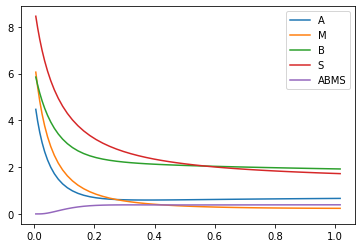

In [13]:
optim.plot_observable(0)


**After 750 optimization iterations**


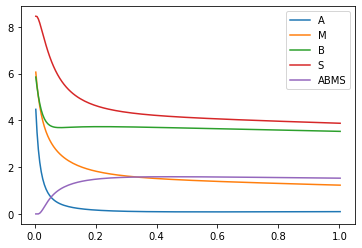

In [14]:
optim.plot_observable(-1)


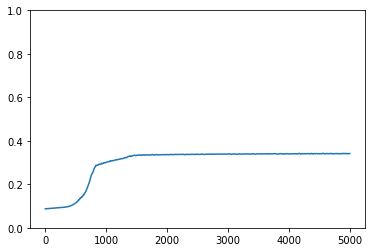

In [15]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

No handles with labels found to put in legend.


Using CPU
Using CPU


No handles with labels found to put in legend.


Using CPU


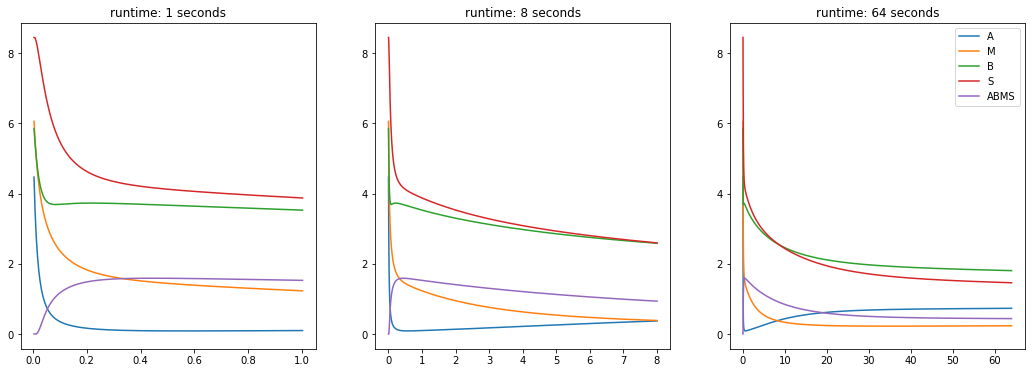

In [18]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(ax=ax[i])
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
plt.show()

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 